# Capstone Proposal by Parthenopi Stergiou

## Project Title: Urban Particulate Matter (PM) pollution time series forecast

## 1) The Problem

Pollution is a major problem especially in China particularly in city clusters, as a result of the rapidly developing economy, expanding anthropogenic activities and urbanization.
Large-scale regional haze pollution characterized by high concentrations of PM2.5 (particulate matter with aerodynamic diameters ≤ 2.5 𝜇m) has frequently occurred, and the levels of PM2.5 continue to frequently exceed the national ambient air quality standards of China.
PM2.5 are to become a performance measure for air pollution mitigation strategies. 

In addition to the dense, grey skies, pollution also brings real health problems. PM2.5 particles, which can be found in the air on smoggy days, are small enough to penetrate deep into the bloodstream through the lungs and have been known to cause serious health issues.

the problem of smog and reduced visibility (see picture below) due to high PM2.5 ambient concentrations is more acute in Winter (esp January-February) due to the intense use of central heating usually powered by coal in Winter.  A major pollution episode was occured in January 2013. Often weather/climate elements are principally responsible for such heavy pollution episodes and have an impact on the PM2.5 concentration.

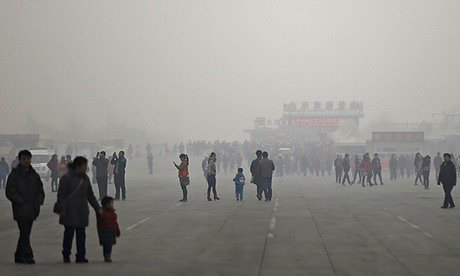

In [7]:
from IPython.display import Image
Image('img/smog-beijing-olympic-park.jpg')

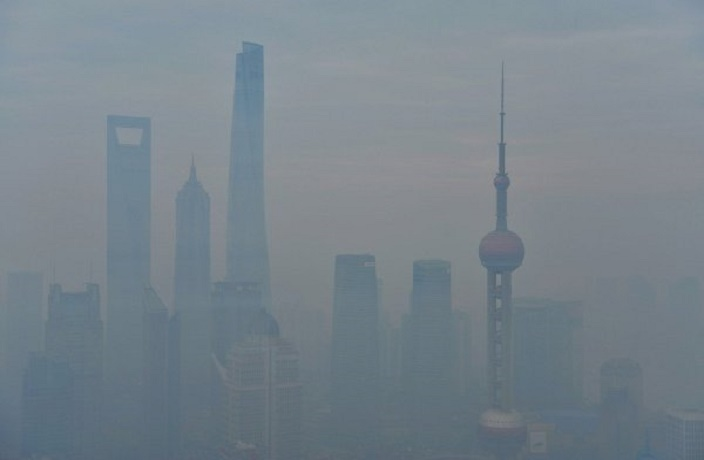

In [2]:
Image('img/Pudong-smog.jpg')

The observed PM2.5 concentration is known to be impacted by emission of pollutants, meteorological conditions, and their interaction. An increased emission accompanied by favorable weather condition for diffusion of pollutants can result in lower PM2.5 readings than a lowered emission regime with unfavorable conditions. 

Moreover, PM2.5 is not only a primary product of emissions (Black carbon) but secondarily formed PM2.5 particles typically are derived from the formation of either ammonium sulfate or ammonium nitrate, through the chemical reaction of NH3 (ammonia) and SO2 or NH3 and NOx, in the presence of water in both cases. In
addition, secondary particles are developed via the chemical reaction of O3 and organic gases (organic carbon) in the atmosphere. So the mechanism iof PM2.5 formation is complicated.

My goal in this capsproject is to forecast the PM2.5 concentration in a the city of Wanshouxigong based on time series multivariable data published by the "Bejing Multi-Site Air-Quality Data Data Set" in UCI ML Repository. Link: https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data 
Such forecasts would enable the evaluation of standards for environmental quality such as the concentration of pollutants.

## 2) The data

### (a) Clear overview of your data

This data set (hourly readings) considers 6 main air pollutants and 6 relevant meteorological variables at multiple sites in Beijing. I restricted my analysisin the city of Wanshouxigong.

The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.

**Attribute Information:**

- No: row number 
- year: year of data in this row 
- month: month of data in this row 
- day: day of data in this row 
- hour: hour of data in this row 
- PM2.5: PM2.5 concentration (ug/m^3) 
- PM10: PM10 concentration (ug/m^3) 
- SO2: SO2 concentration (ug/m^3) 
- NO2: NO2 concentration (ug/m^3) 
- CO: CO concentration (ug/m^3) 
- O3: O3 concentration (ug/m^3) 
- TEMP: temperature (degree Celsius) 
- PRES: pressure (hPa) 
- DEWP: dew point temperature (degree Celsius) 
- RAIN: precipitation (mm) 
- wd: wind direction 
- WSPM: wind speed (m/s) 
- station: name of the air-quality monitoring site

_Note:_ Due to the fact that the relative humidity depends on Temperature the dew poin (DEWP) is used instead and it is considered more appropriate to express the moisture condition of vapor.

All precipitation quantities are expressed in millimetres (mm) of liquid water equivalent for the preceeding time interval (or in inches). One millimetre of rain corresponds to 1 litre per square metre of water on the surface, or approximately 10 millimetres of snow.

### (b) Plan to manage and process the data

- correct the typos, missing values, handle outliers
- feature distributions
- features relations between each other
- feature relations versus the target variable (PM2.5 concentration)
- the cyclical/seasonal variations/trend
- the temporal dependencies or autocorrelations (lag as a feature) if not related no prediction
- stationarity (the distribution of the data oscillates around a point and does not explode over time)

## 3) Exploratory data analysis (EDA)

### Data cleaning and manipulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import datetime as dt # referemce to the module
from datetime import datetime  # reference to the class

from pandas import Grouper
from pandas.plotting import lag_plot, autocorrelation_plot

from pandas.tseries.offsets import *
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pandas.plotting import register_matplotlib_converters

import pylab 
import scipy.stats as stats
import statsmodels.api as sm

I load the data

In [2]:
df = pd.read_csv(os.path.join('data', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv'), parse_dates = True)

In [6]:
df.shape

(35064, 18)

I will have a look at the top entries of my data as well as the last ones.

In [3]:
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong

In [4]:
df.tail()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
35059  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
35060  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
35061  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
35062  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
35063  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong

I will create a new column Date and Time to combine the information of "year, month, day and hour columns" in one field.

In [5]:
dates = df['year'].map(str) +'-'+ df['month'].map(str) + '-' + df['day'].map(str) + ' ' + df['hour'].map(str) + ':00'

In [8]:
df['Date and Time'] = pd.to_datetime(dates)

In [9]:
import datetime
d = datetime.datetime.strptime("01/27/2012","%m/%d/%Y").strftime('%m/%d/%Y')
print(d)

01/27/2012


In [10]:
df['Date and Time'].head()

0   2013-03-01 00:00:00
1   2013-03-01 01:00:00
2   2013-03-01 02:00:00
3   2013-03-01 03:00:00
4   2013-03-01 04:00:00
Name: Date and Time, dtype: datetime64[ns]

I will check the data types of the data 

I check for columns with mixed data types

there are 79 missing values of wind direction wd

In [11]:
df.columns.shape

(19,)

I will now make a copy of the dataframe and add the Weekday names as well as the season as new features.

In [12]:
df2 = df.copy()

In [13]:
df2['Day'] = df['Date and Time'].dt.day_name()

In [14]:
df2.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station       Date and Time     Day  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong 2013-03-01 00:00:00  Friday  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong 2013-03-01 01:00:00  Friday  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong 2013-03-01 02:00:00  Friday  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong 2013-03-01 03:00:00  Friday  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong 2013-03-01 04:00:00  Friday

### adding seasonal features

I will define a column for the season

In [15]:
def get_season(month, day):
    if month in (1, 2, 3): season = 'winter'
    elif month in (4, 5, 6): season = 'spring'
    elif month in (7, 8, 9): season = 'summer'
    else: season = 'autumn'

    if (month == 3) and (day > 19): season = 'spring'
    elif (month == 6) and (day > 20): season = 'summer'
    elif (month == 9) and (day > 21): season = 'autumn'
    elif (month == 12) and (day > 20): season = 'winter'
    
    return season

In [16]:
# list comprehensioon to add the season
df2['Season'] = [ get_season(x, y) for (x,y) in zip( df2['month'], df2['day']) ] 

In [17]:
df2.Season.unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

In [18]:
df2.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  ...  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  ...   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  ...  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  ...  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN  ...  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  ...  -0.9   

     PRES  DEWP  RAIN   wd WSPM        station       Date and Time     Day  \
0  1021.9 -19.0   0.0  WNW  2.0  Wanshouxigong 2013-03-01 00:00:00  Friday   
1  1022.4 -19.3   0.0  WNW  4.4  Wanshouxigong 2013-03-01 01:00:00  Friday   
2  1022.6 -19.7   0.0  WNW  4.7  Wanshouxigong 2013-03-01 02:00:00  Friday   
3  1023.5 -20.9   0.0   NW  2.6  Wanshouxigong 2013-03-01 03:00:00  Friday   
4  1024.1 -21.7   0.0  WNW  2.5  Wanshouxigong 2013-03-01 04:00:00  Friday   

   Season  
0  winter  
1  winter  
2  winter  
3  winter  
4  winter  

[5 rows x 21 columns]

In [19]:
df.shape

(35064, 19)

In [20]:
df = df2[['Date and Time', 'Day', 'Season', 'year', 'month', 'day', 'hour',  'SO2', 'NO2','CO','O3', 'TEMP',
          'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'PM10', 'PM2.5']]

In [21]:
df.head()

Date and Time     Day  Season  year  month  day  hour  SO2   NO2  \
0 2013-03-01 00:00:00  Friday  winter  2013      3    1     0  6.0  17.0   
1 2013-03-01 01:00:00  Friday  winter  2013      3    1     1  7.0  14.0   
2 2013-03-01 02:00:00  Friday  winter  2013      3    1     2  NaN  16.0   
3 2013-03-01 03:00:00  Friday  winter  2013      3    1     3  3.0  16.0   
4 2013-03-01 04:00:00  Friday  winter  2013      3    1     4  3.0   NaN   

      CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  PM10  \
0  200.0  62.0   0.3  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong   9.0   
1  200.0  66.0  -0.1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  11.0   
2  200.0  59.0  -0.6  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong   8.0   
3    NaN   NaN  -0.7  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong   8.0   
4  300.0  36.0  -0.9  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong   8.0   

   PM2.5  
0    9.0  
1   11.0  
2    8.0  
3    8.0  
4    8.0

In [22]:
df.columns = ['Date and Time', 'Weekday', 'Season', 'Year', 'Month', 'Day', 'Hour', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'PM10', 'PM2.5']

In [23]:
df.head()

Date and Time Weekday  Season  Year  Month  Day  Hour  SO2   NO2  \
0 2013-03-01 00:00:00  Friday  winter  2013      3    1     0  6.0  17.0   
1 2013-03-01 01:00:00  Friday  winter  2013      3    1     1  7.0  14.0   
2 2013-03-01 02:00:00  Friday  winter  2013      3    1     2  NaN  16.0   
3 2013-03-01 03:00:00  Friday  winter  2013      3    1     3  3.0  16.0   
4 2013-03-01 04:00:00  Friday  winter  2013      3    1     4  3.0   NaN   

      CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  PM10  \
0  200.0  62.0   0.3  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong   9.0   
1  200.0  66.0  -0.1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  11.0   
2  200.0  59.0  -0.6  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong   8.0   
3    NaN   NaN  -0.7  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong   8.0   
4  300.0  36.0  -0.9  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong   8.0   

   PM2.5  
0    9.0  
1   11.0  
2    8.0  
3    8.0  
4    8.0

In [24]:
df.shape

(35064, 20)

In [25]:
pd.options.display.max_columns

20

### checking whether there are missing entries, missing dates.

I define 'Range' column just to check whether there are missing hours. It looks that that is not the case, since the columns 'Date and Time' and 'Range' are identical. the columns 'year', 'month', 'day', 'hour' can be deleted later. Their information is in the column 'Date and Time'.

In [26]:
df['Range'] = pd.period_range('2013-03-01 00:00:00', periods = 35064, freq = 'H')

In [27]:
df['Range'].head()

0    2013-03-01 00:00
1    2013-03-01 01:00
2    2013-03-01 02:00
3    2013-03-01 03:00
4    2013-03-01 04:00
Name: Range, dtype: period[H]

In [28]:
import datetime as dt # referemce to the module
from datetime import datetime  # reference to the class

I convert the column 'Date and Time' to a period object in order to be able to compare the two columns: 'Range' and  'Date and Time'.

In [29]:
df['Date'] = df['Date and Time']

In [30]:
df['Date'] = df['Date'].dt.to_period('h')

I check the creation of the new column 'Range'

There are no missing hour entries, since the columns 'Date and Time' and 'Range' are identical.

In [31]:
df['Date'].equals(df['Range'])

True

I used the column a 'Date' as a copy of 'Date and Time' to check if there are any missing dates. Now I can delete this extra column.

In [32]:
df.drop(columns = 'Date', axis =1, inplace = True)

In [33]:
df.set_index('Date and Time', drop = True, inplace = True)

In [34]:
df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='Date and Time', length=35064, freq=None)

I set the category datatype for the categorical features (none of them is ordinal, all are nominal)

In [35]:
for i in range(df.shape[1]):
    print(i,set(map(type, df.iloc[:,i])), '--------->' , df.columns[i])

0 {<class 'str'>} ---------> Weekday
1 {<class 'str'>} ---------> Season
2 {<class 'int'>} ---------> Year
3 {<class 'int'>} ---------> Month
4 {<class 'int'>} ---------> Day
5 {<class 'int'>} ---------> Hour
6 {<class 'float'>} ---------> SO2
7 {<class 'float'>} ---------> NO2
8 {<class 'float'>} ---------> CO
9 {<class 'float'>} ---------> O3
10 {<class 'float'>} ---------> TEMP
11 {<class 'float'>} ---------> PRES
12 {<class 'float'>} ---------> DEWP
13 {<class 'float'>} ---------> RAIN
14 {<class 'float'>, <class 'str'>} ---------> wd
15 {<class 'float'>} ---------> WSPM
16 {<class 'str'>} ---------> station
17 {<class 'float'>} ---------> PM10
18 {<class 'float'>} ---------> PM2.5
19 {<class 'pandas._libs.tslibs.period.Period'>} ---------> Range


In [36]:
cols = [ 'wd', 'Season', 'Day', 'station']
for col in cols:
     df[col] = df[col].astype('category')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 20 columns):
Weekday    35064 non-null object
Season     35064 non-null category
Year       35064 non-null int64
Month      35064 non-null int64
Day        35064 non-null category
Hour       35064 non-null int64
SO2        34395 non-null float64
NO2        34310 non-null float64
CO         33767 non-null float64
O3         33986 non-null float64
TEMP       35045 non-null float64
PRES       35045 non-null float64
DEWP       35045 non-null float64
RAIN       35045 non-null float64
wd         34985 non-null category
WSPM       35051 non-null float64
station    35064 non-null category
PM10       34580 non-null float64
PM2.5      34368 non-null float64
Range      35064 non-null period[H]
dtypes: category(4), float64(11), int64(3), object(1), period[H](1)
memory usage: 4.7+ MB


In [38]:
data = df

In [39]:
data_num = data._get_numeric_data()

In [40]:
data_num.head(3)

Year  Month  Hour  SO2   NO2     CO    O3  TEMP    PRES  \
Date and Time                                                                  
2013-03-01 00:00:00  2013      3     0  6.0  17.0  200.0  62.0   0.3  1021.9   
2013-03-01 01:00:00  2013      3     1  7.0  14.0  200.0  66.0  -0.1  1022.4   
2013-03-01 02:00:00  2013      3     2  NaN  16.0  200.0  59.0  -0.6  1022.6   

                     DEWP  RAIN  WSPM  PM10  PM2.5  
Date and Time                                       
2013-03-01 00:00:00 -19.0   0.0   2.0   9.0    9.0  
2013-03-01 01:00:00 -19.3   0.0   4.4  11.0   11.0  
2013-03-01 02:00:00 -19.7   0.0   4.7   8.0    8.0

In [41]:
data_num.columns

Index(['Year', 'Month', 'Hour', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES',
       'DEWP', 'RAIN', 'WSPM', 'PM10', 'PM2.5'],
      dtype='object')

### a first look on missing values in the dataset

I check for missing values

In [42]:
data.isnull().sum()

Weekday       0
Season        0
Year          0
Month         0
Day           0
Hour          0
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
PM10        484
PM2.5       696
Range         0
dtype: int64

Since I cannot remove the missing values because that will create discontinuity in the time serie, I will impute them. The most appropriate strategy to impute the values will be decided after the EDA.

In [43]:
data_numeric = data[['CO', 'O3', 'NO2', 'SO2', 'wd', 'PM2.5', 'PM10', 'TEMP', 'RAIN', 'DEWP']]._get_numeric_data()

By visual inspection of the missing values, I observe that in most cases when a missing value occurs usually neighboring values are also missing which may indicate that a measurement was missing.

I check the categorical variable wind direction.

In [44]:
df['wd'].unique()

[WNW, NW, NE, NNE, ENE, ..., SSW, SE, S, SSE, NaN]
Length: 17
Categories (16, object): [WNW, NW, NE, NNE, ..., SSW, SE, S, SSE]

In [45]:
df['wd'].isnull().sum()

79

### (a) Preliminary EDA

I will start with some basic visualizations to explore the data. First off, I will plot the target variable over time.

/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


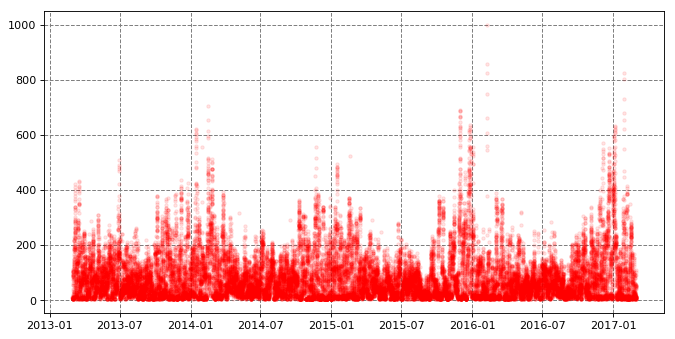

In [46]:
#plt.figure(figsize = (20,5))
#plt.close()
data.index = pd.to_datetime(data.index)
plt.figure(figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data['PM2.5'], 'r.', alpha = 0.1)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.9)

In [47]:
cols = [ 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES','DEWP', 'RAIN', 'WSPM', 'PM10', 'PM2.5']

In [48]:
columns = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'PM10', 'PM2.5']

As a second step, I will make plots of all pollutants and weather/climate conditions versus time.

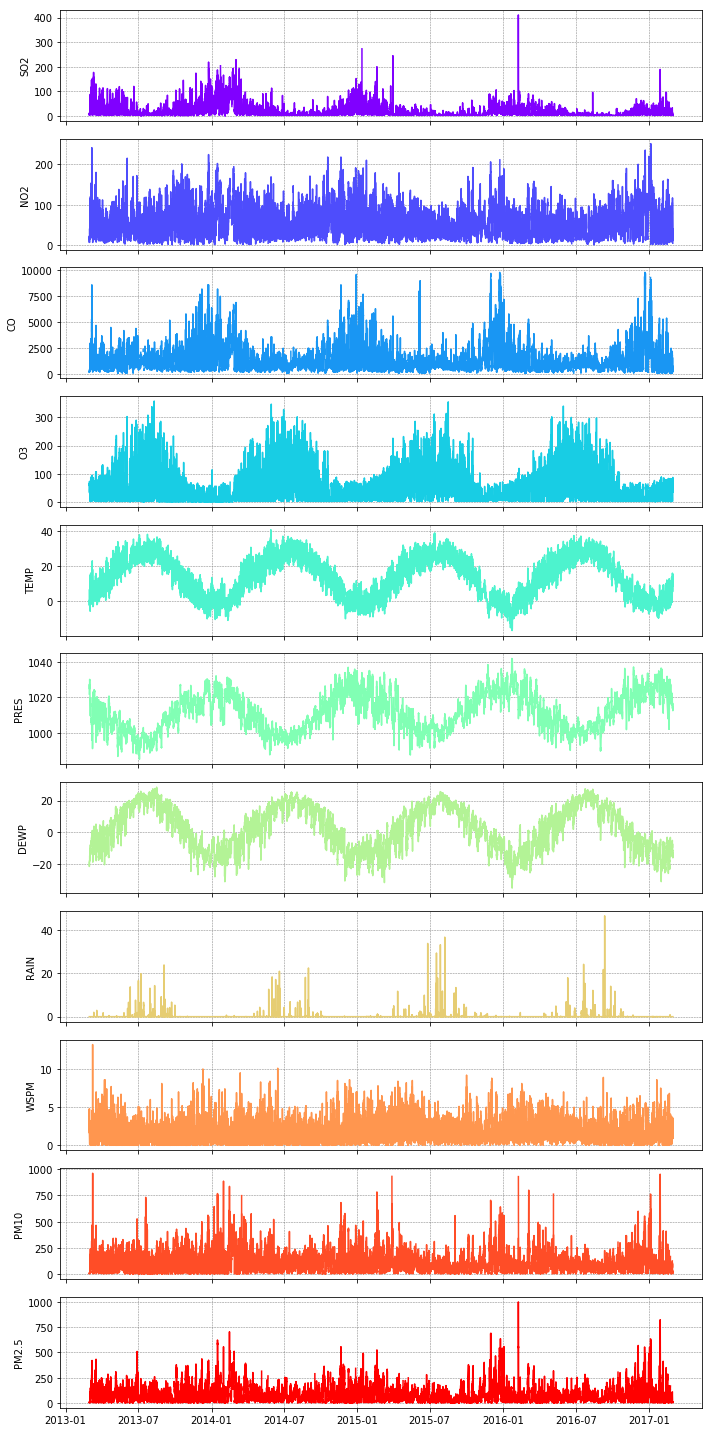

In [49]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(cols))))

fig, axes = plt.subplots(nrows = 11, ncols = 1, figsize = (10, 20), sharex = True )
for col, ax in zip(cols, axes.ravel()):

    ax.plot(data[col], color = next(colors))
    #ax.set(title = '{}'.format(col))
    #ax.set(xlabel = 'Time')
    ax.set(ylabel = col)
    ax.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.tight_layout()

I plot the target variable PM2.5 concentration for each year.

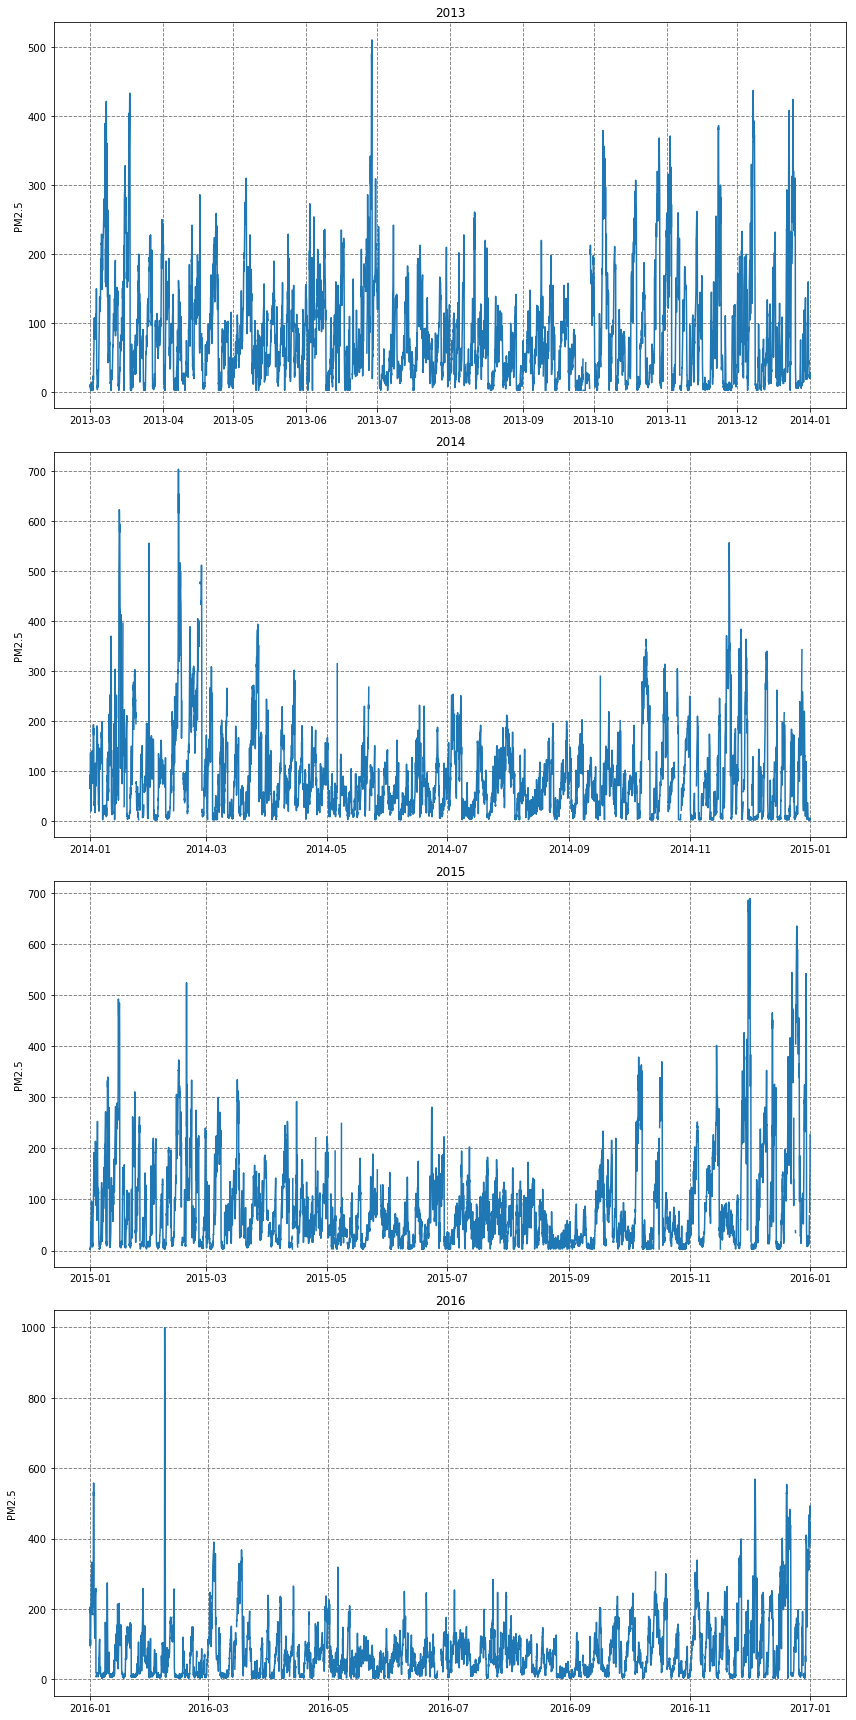

In [50]:
years = [2013, 2014, 2015, 2016]

fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (12, 24))
for year, ax in zip(years, axes.ravel()):
    ax.plot((data[data['Year'] == year]['PM2.5']))
    ax.set(title = '{}'.format(year))
    ax.set(ylabel = 'PM2.5')
    ax.grid(color = 'grey', linestyle = '--', linewidth = 0.9)
    plt.tight_layout()

I observe thath the PM2.5 is higher on Winter months and lower in summer months for all 4 years. This can be also seen by observing the descriptive statistics (max and mean values). So we have seasonality in the data.

I resample on a daily basis in order to see the signal more clearly (less points) and I plot each year measurements with a different color in order to compare.

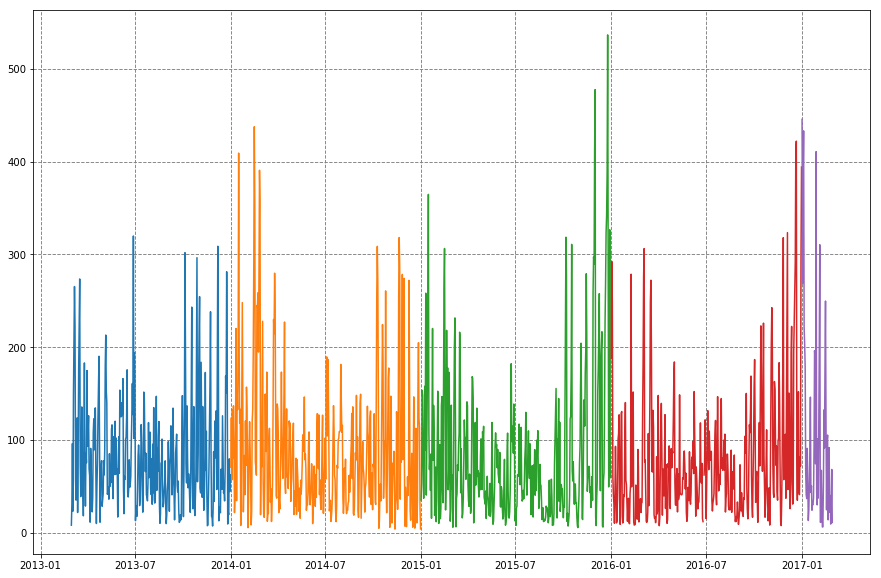

In [51]:
fig = plt.figure(figsize = (15,10))
df_2013 = data[data['Year'] == 2013][['Month','PM2.5']].resample('d').mean()
df_2014 = data[data['Year'] == 2014][['Month','PM2.5']].resample('d').mean()
df_2015 = data[data['Year'] == 2015][['Month','PM2.5']].resample('d').mean()
df_2016 = data[data['Year'] == 2016][['Month','PM2.5']].resample('d').mean()
df_2017 = data[data['Year'] == 2017][['Month','PM2.5']].resample('d').mean()
plt.plot(df_2013['PM2.5'])
plt.plot(df_2014['PM2.5'])
plt.plot(df_2015['PM2.5'])
plt.plot(df_2016['PM2.5'])
plt.plot(df_2017['PM2.5'])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.9)
plt.show()

Now I will plot two years one on top of the other.

In [52]:
df_2014.reset_index(inplace = True)
df_2014['mDay'] = df_2014['Date and Time'].dt.day
df_2014['Month'] = df_2014['Date and Time'].dt.month_name()
for i in range(df_2014.shape[1]):
    print(i,set(map(type, df_2014.iloc[:,i])), '--------->' , df_2014.columns[i])
#df_2014.drop(['Date and Time'], axis = 1, inplace = True)
#df_2014['Month-Day'] = df_md_2014.apply(lambda x: str(x['Month'])+'.'+ str(x['Day']), axis = 1)
df_2014['Month-Day'] = df_2014.apply(lambda x: str(x['Month'])+'-'+ str(x['mDay']), axis = 1)
df_2014.drop(['Date and Time', 'Month', 'mDay'], axis = 1, inplace = True)
df_2014.head()

0 {<class 'pandas._libs.tslibs.timestamps.Timestamp'>} ---------> Date and Time
1 {<class 'str'>} ---------> Month
2 {<class 'float'>} ---------> PM2.5
3 {<class 'int'>} ---------> mDay


PM2.5  Month-Day
0   70.541667  January-1
1  123.875000  January-2
2   56.875000  January-3
3  132.041667  January-4
4   80.250000  January-5

In [53]:
df_2015.reset_index(inplace = True)
df_2015['mDay'] = df_2015['Date and Time'].dt.day
df_2015['Month'] = df_2015['Date and Time'].dt.month_name()
for i in range(df_2015.shape[1]):
    print(i,set(map(type, df_2015.iloc[:,i])), '--------->' , df_2015.columns[i])
#df_2014.drop(['Date and Time'], axis = 1, inplace = True)
#df_2014['Month-Day'] = df_md_2014.apply(lambda x: str(x['Month'])+'.'+ str(x['Day']), axis = 1)
df_2015['Month-Day'] = df_2015.apply(lambda x: str(x['Month'])+'-'+ str(x['mDay']), axis = 1)
df_2015.drop(['Date and Time', 'Month', 'mDay'], axis = 1, inplace = True)
df_2015.head()

0 {<class 'pandas._libs.tslibs.timestamps.Timestamp'>} ---------> Date and Time
1 {<class 'str'>} ---------> Month
2 {<class 'float'>} ---------> PM2.5
3 {<class 'int'>} ---------> mDay


PM2.5  Month-Day
0   35.208333  January-1
1   52.291667  January-2
2  153.500000  January-3
3  148.208333  January-4
4   74.590909  January-5

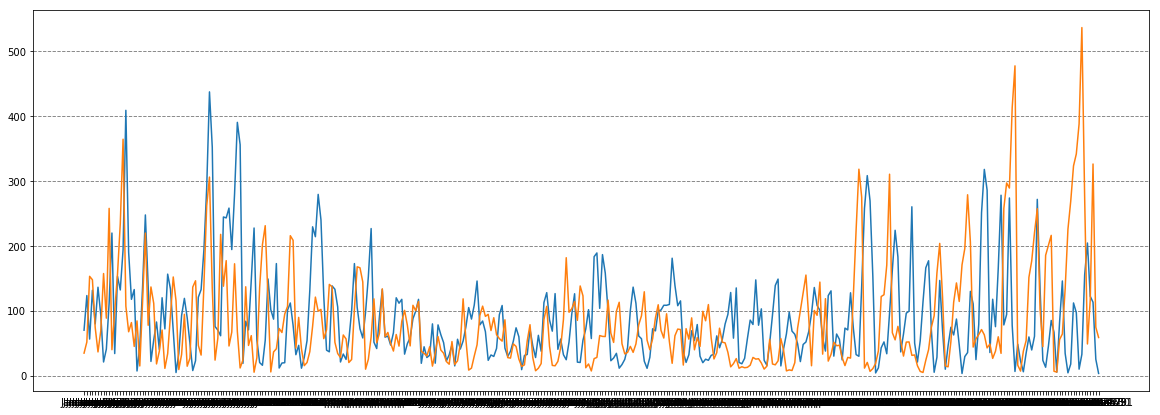

In [54]:
fig = plt.figure(figsize = (20,7))
plt.plot(df_2014['Month-Day'], df_2014['PM2.5'])
plt.plot(df_2015['Month-Day'], df_2015['PM2.5'])
plt.grid(axis = 'y', color = 'grey', linestyle = '--', linewidth = 0.9)
plt.show()

There is some yearly seasonality. In the winter months the Pm2.5 comcentration is higher

### Summary statistics

I will now explore summary statistics 

In [55]:
data['2014':'2016'][['Month', 'PM2.5']].groupby('Month').describe()

PM2.5                                                        
        count        mean         std  min   25%   50%     75%    max
Month                                                                
1      2195.0   98.255945   97.945420  3.0  17.0  75.0  140.00  623.0
2      1994.0   99.888164  114.698208  3.0  14.0  59.0  149.00  999.0
3      2208.0   93.747736   87.004196  3.0  19.0  68.0  140.00  394.0
4      2114.0   75.822138   54.170478  3.0  35.0  67.0  103.00  302.0
5      2137.0   55.865653   44.444333  3.0  24.0  45.0   75.00  319.0
6      2067.0   60.740687   46.781076  3.0  25.0  50.0   86.00  281.0
7      2207.0   73.988219   51.708515  3.0  34.0  64.0  104.00  284.0
8      2202.0   53.981153   39.591356  3.0  21.0  44.0   80.75  200.0
9      2080.0   61.465048   50.144647  3.0  20.0  47.0   90.00  290.0
10     2176.0   90.434743   87.070252  3.0  24.0  59.0  134.00  379.0
11     2132.0  112.476689  104.141082  3.0  29.0  81.0  174.00  687.0
12     2165.0  132.031963  140.173027  3.0  14.0  86.0  207.00  690.0

PM10 and PM2.5 could be related so I check them in a comparative way.

In [56]:
data.groupby('Month')[['PM2.5', 'PM10']].describe()

PM2.5                                                           PM10  \
        count        mean         std  min   25%   50%    75%    max   count   
Month                                                                          
1      2938.0  106.797073  113.490388  3.0  17.0  76.0  150.0  823.0  2949.0   
2      2639.0   94.740811  109.892681  3.0  13.0  53.0  140.0  999.0  2640.0   
3      2952.0   97.011856   88.154044  3.0  22.0  74.0  144.0  433.0  2955.0   
4      2832.0   76.590395   55.573319  3.0  34.0  67.0  106.0  302.0  2843.0   
5      2880.0   62.554479   48.759016  3.0  28.0  50.0   85.0  319.0  2911.0   
6      2763.0   72.767825   59.961182  3.0  28.0  58.0  102.0  510.0  2803.0   
7      2949.0   72.562564   51.621002  3.0  32.0  61.0  103.0  284.0  2959.0   
8      2944.0   55.353770   41.948627  3.0  22.0  45.0   82.0  261.0  2962.0   
9      2793.0   61.381060   49.374573  3.0  21.0  48.0   90.0  290.0  2844.0   
10     2919.0   92.642001   87.961677  3.0  25.0  61.0  140.0  379.0  2938.0   
11     2851.0  105.400316  100.737647  3.0  21.0  77.0  163.0  687.0  2854.0   
12     2908.0  121.911004  131.804382  3.0  15.0  74.0  188.0  690.0  2922.0   

                                                                
             mean         std  min   25%    50%     75%    max  
Month                                                           
1      130.113767  126.532882  3.0  32.0  104.0  182.00  952.0  
2      113.030303  120.523431  4.0  24.0   71.0  160.25  929.0  
3      143.007783  114.876197  5.0  49.0  122.0  207.00  961.0  
4      116.355962   74.840904  3.0  61.0  111.0  155.00  576.0  
5      107.846135   66.958466  2.0  58.0   99.0  144.00  762.0  
6       91.131823   62.717025  3.0  44.0   81.0  127.00  527.0  
7       86.006083   58.815850  2.0  43.0   78.0  117.00  732.0  
8       76.435348   51.860486  2.0  33.0   69.0  107.00  344.0  
9       88.792651   64.305690  3.0  35.0   80.0  125.00  558.0  
10     116.905378   93.331692  3.0  40.0   93.0  175.00  462.0  
11     130.825123  112.648637  3.0  37.0  102.0  195.75  704.0  
12     145.636003  138.835047  2.0  29.0  103.0  218.75  690.0

I observe some very high values of PM2.5 concentration especially in the winter months of Jan and Feb which is expected. These extreme values could be considered outliers. The concentration of PM10 is not so health risky as the PM2.5 because the particles are bigger and heavier. PM10 values are higher in winter and lower in summer as well.

In [57]:
cols = [1,2,3]

I explore now the values of other pollutants in a comarative way.

In [58]:
data[['SO2', 'NO2','CO','O3', 'Month']].groupby('Month').describe().T

Month               1            2            3            4            5   \
SO2 count  2938.000000  2521.000000  2955.000000  2849.000000  2917.000000   
    mean     35.754357    31.001983    31.490726    15.425545    14.941935   
    std      33.591587    36.308188    30.920621    15.859477    17.392888   
    min       1.000000     1.000000     1.428000     0.571200     2.000000   
    25%      10.000000     6.000000     8.000000     4.000000     2.000000   
    50%      25.000000    17.000000    22.000000    10.000000     9.000000   
    75%      52.000000    44.000000    46.000000    21.000000    20.000000   
    max     273.000000   411.000000   245.000000   114.000000   119.000000   
NO2 count  2924.000000  2546.000000  2954.000000  2850.000000  2910.000000   
    mean     70.217784    55.512176    60.946803    47.155476    45.227397   
    std      42.938718    39.545682    37.860952    28.199107    26.816290   
    min       2.000000     2.000000     2.000000     2.000000     4.000000   
    25%      34.000000    21.000000    29.000000    24.000000    24.000000   
    50%      67.000000    48.000000    60.000000    43.000000    40.000000   
    75%      97.000000    81.000000    86.000000    66.000000    62.000000   
    max     251.000000   194.000000   241.000000   179.000000   169.000000   
CO  count  2881.000000  2547.000000  2922.000000  2817.000000  2870.000000   
    mean   2008.503992  1468.158618  1386.546886   937.995740   895.097909   
    std    1662.298615  1316.068985  1091.872572   606.672483   573.101881   
    min     100.000000   100.000000   100.000000   100.000000   100.000000   
    25%     600.000000   400.000000   500.000000   500.000000   500.000000   
    50%    1600.000000   900.000000  1100.000000   800.000000   800.000000   
    75%    2800.000000  2200.000000  2000.000000  1200.000000  1200.000000   
    max    9300.000000  6700.000000  8599.000000  4500.000000  4200.000000   
O3  count  2928.000000  2538.000000  2932.000000  2841.000000  2911.000000   
    mean     23.194775    37.821907    50.149293    67.758615    89.409131   
    std      22.062798    28.852414    38.318251    49.416909    63.730671   
    min       1.000000     1.000000     2.000000     0.428400     2.000000   
    25%       5.000000     8.000000    11.000000    27.000000    42.000000   
    50%      13.000000    36.000000    50.000000    67.000000    82.000000   
    75%      42.000000    64.000000    80.000000    96.000000   124.000000   
    max     114.000000   119.000000   226.000000   295.000000   347.000000   

Month               6            7            8            9            10  \
SO2 count  2781.000000  2965.000000  2963.000000  2834.000000  2894.000000   
    mean      8.370031     5.331979     4.199956     6.759432     7.890503   
    std      10.053299     5.567699     4.503498     8.356127    12.548494   
    min       1.142400     0.285600     1.000000     1.000000     0.285600   
    25%       2.000000     2.000000     2.000000     2.000000     2.000000   
    50%       4.000000     3.000000     2.000000     3.000000     3.000000   
    75%      10.000000     7.000000     5.000000     8.000000     9.000000   
    max     120.000000    53.000000    96.000000    84.000000   145.000000   
NO2 count  2773.000000  2956.000000  2960.000000  2790.000000  2888.000000   
    mean     43.274149    39.693079    42.614171    52.948871    67.711266   
    std      25.592128    20.782194    23.969522    27.094001    37.889835   
    min       4.000000     2.000000     2.000000     2.000000     2.000000   
    25%      25.000000    25.000000    25.000000    32.000000    41.000000   
    50%      38.000000    36.000000    38.000000    50.000000    64.000000   
    75%      55.000000    52.000000    55.000000    70.905800    90.250000   
    max     215.000000   147.000000   141.000000   185.000000   218.000000   
CO  count  2702.000000  2712.000000  2928.000000  2783.000000  2873.000000   
    mean   1089.93116

I observe some very high values of PM2.5 concentration especially in the winter months of Jan and Feb which is expected. These extreme values could be considered outliers.

checking further for typos and extreme values

In [59]:
data_numeric = data._get_numeric_data()

In [60]:
data_numeric.columns

Index(['Year', 'Month', 'Hour', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES',
       'DEWP', 'RAIN', 'WSPM', 'PM10', 'PM2.5'],
      dtype='object')

In [61]:
data_numeric.describe(percentiles = [0.10, 0.25, 0.50, 0.75, 0.90 ]).T.round(2).iloc[4:,:]

count     mean      std     min    10%     25%     50%     75%  \
NO2    34310.0    55.53    35.81    2.00   15.0    28.0    49.0    77.0   
CO     33767.0  1370.40  1223.14  100.00  300.0   600.0  1000.0  1700.0   
O3     33986.0    56.23    57.08    0.21    2.0     8.0    42.0    82.0   
TEMP   35045.0    13.78    11.39  -16.80   -1.7     3.4    14.8    23.5   
PRES   35045.0  1011.51    10.57  985.10  997.9  1002.8  1011.0  1020.0   
DEWP   35045.0     2.71    13.70  -35.30  -16.4    -8.5     3.3    15.2   
RAIN   35045.0     0.06     0.80    0.00    0.0     0.0     0.0     0.0   
WSPM   35051.0     1.75     1.21    0.00    0.6     0.9     1.4     2.3   
PM10   34580.0   112.22    97.59    2.00   17.0    39.0    91.0   154.0   
PM2.5  34368.0    85.02    85.98    3.00   10.0    23.0    60.0   116.0   

          90%     max  
NO2     105.0   251.0  
CO     2800.0  9800.0  
O3      136.0   358.0  
TEMP     28.4    40.6  
PRES   1026.0  1042.0  
DEWP     20.0    28.5  
RAIN      0.0    46.4  
WSPM      3.4    13.2  
PM10    234.0   961.0  
PM2.5   195.0   999.0

By visual inspection, the negative values for the temperatures TEMP and DEWP do not look wrong. In some cases (SO2, NO2, CO, PM2.5, PM10) the max values are far from the 75% percentile which may indicate outliers.

In [62]:
data.groupby('Year')[['PM2.5']].describe().T

Year                2013         2014         2015         2016         2017
PM2.5 count  7303.000000  8551.000000  8538.000000  8588.000000  1388.000000
      mean     84.028276    89.077090    84.714430    78.542035   107.306916
      std      74.909646    84.261374    91.301623    81.792114   127.499515
      min       3.000000     3.000000     3.000000     3.000000     3.000000
      25%      26.000000    26.000000    21.000000    20.000000    13.000000
      50%      64.000000    67.000000    56.000000    55.000000    60.000000
      75%     119.000000   125.000000   112.000000   106.000000   158.000000
      max     510.000000   704.000000   690.000000   999.000000   823.000000

I explore the min and max difference on a per year basis.

In [63]:
annual_var = data.groupby('Year')['PM2.5'].agg(lambda x: max(x) - min(x)).to_frame()
annual_var.columns = pd.MultiIndex.from_tuples([('PM2.5 concentration', 'max-min')])
annual_var

PM2.5 concentration
                 max-min
Year                    
2013               507.0
2014               701.0
2015               687.0
2016               996.0
2017               820.0

The annual variation in the data slightly fluctuates, increases and decreases with time.

# Trend and Seasonality (cycles) 
#### Houly, Daily, Weekday, Seasonly, Monthly, Annual mean PM2.5 concentration difference

Looking a bit deeper into the fluctuations of the data over time, I will comparing the annual, monthly, hourly, daily, daily per weekdays and seasonal averages.

In [64]:
by_year = data.groupby(data.index.year).mean().iloc[:,3:]

In [65]:
by_month = data.groupby(data.index.month).mean().iloc[:,3:]

In [66]:
by_hour = data.groupby(data.index.hour).mean().iloc[:,3:]

In [67]:
by_time = data.groupby(data.index.time).mean().iloc[:,3:]

In [68]:
by_day = data.groupby(data.index.day).mean().iloc[:,3:]

In [69]:
by_weekday = data.groupby(data.index.weekday).mean().iloc[:,3:]

In [70]:
by_season = data.groupby(data['Season']).mean().iloc[:,3:]

In [71]:
font_dict = {'fontname':'Arial', 'size':'14'}

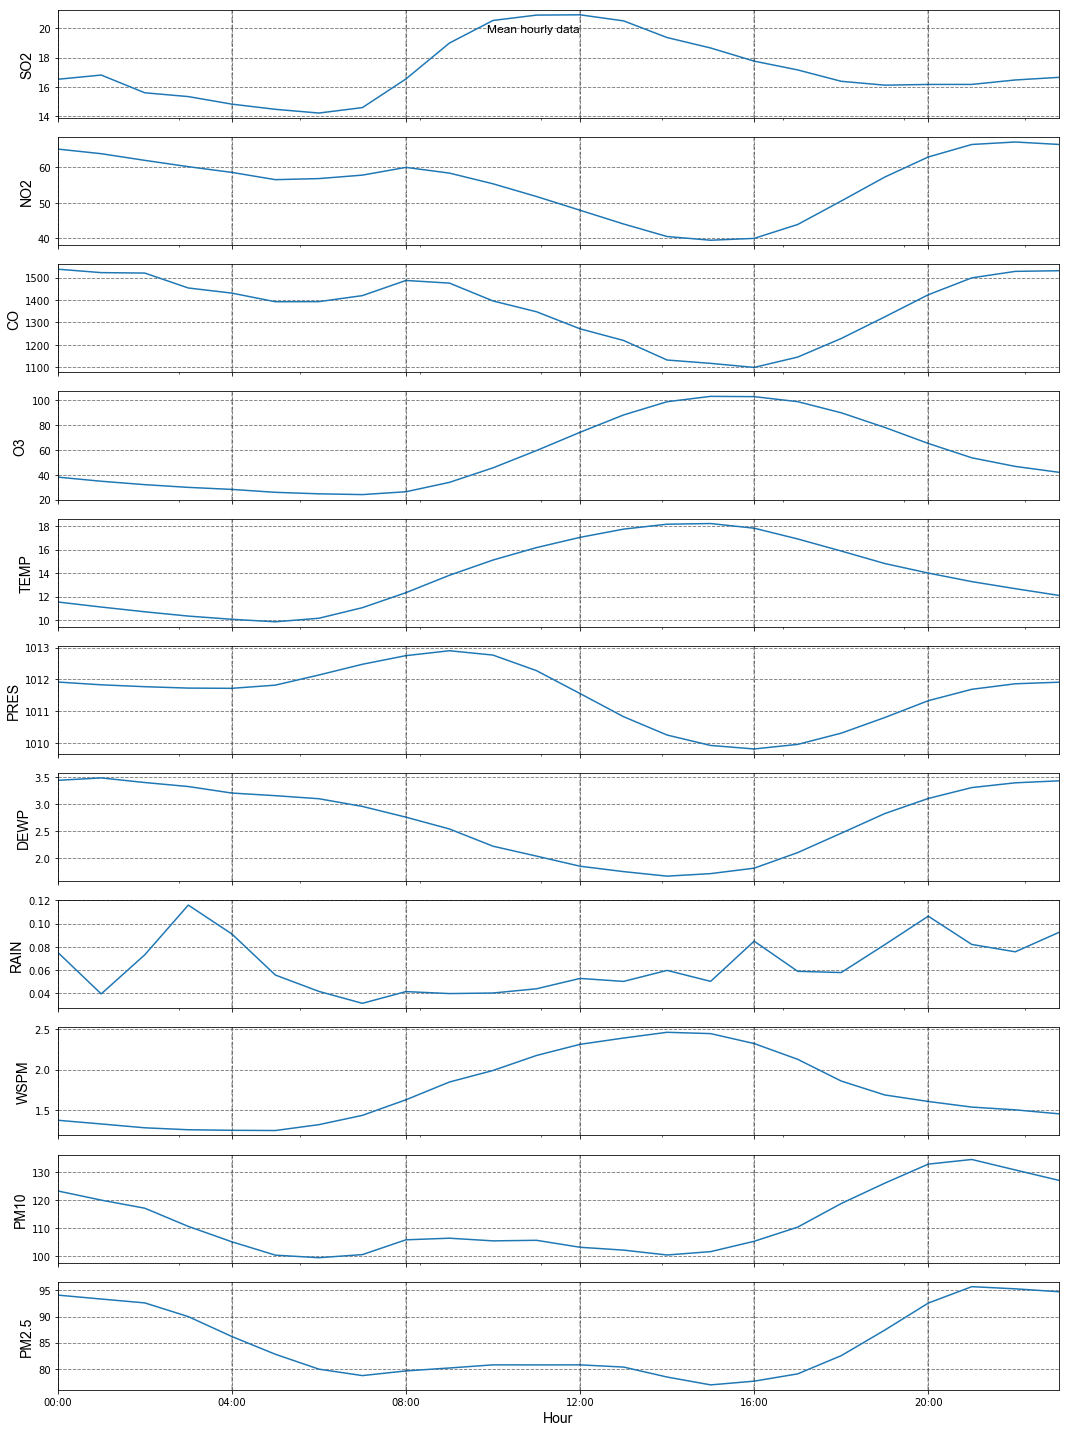

In [72]:
cols = np.arange(0,11)
hourly_ticks = 4*60*60 * np.arange(6)
#fig, axs = plt.subplots(11)
#fig, (ax1, ax2) = plt.subplots(2, sharex=True))
fig = plt.figure(figsize = (15,20))
for col in cols:
    plt.subplot(len(cols),1,col+1) 
    by_time.iloc[:,col].plot(xticks = hourly_ticks, sharex=True)
    plt.ylabel(columns[col], fontdict = font_dict)
    for i in hourly_ticks:
        plt.axvline(i, color = 'k', linestyle = '--', alpha = 0.3)
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.9)
plt.suptitle('Mean hourly data', fontdict = font_dict)
plt.xlabel('Hour', fontdict = font_dict)

#plt.legend(bbox_to_anchor=(1.25, 1.), loc='upper right',  frameon=False)
plt.tight_layout()
plt.show()

I observe a cycle on the hourly data with higher concentrations during the evening hours. The opposite cycle is shown by O3 and TEMP for example, whereas PM10 and PM2.5 follow the same cycle.

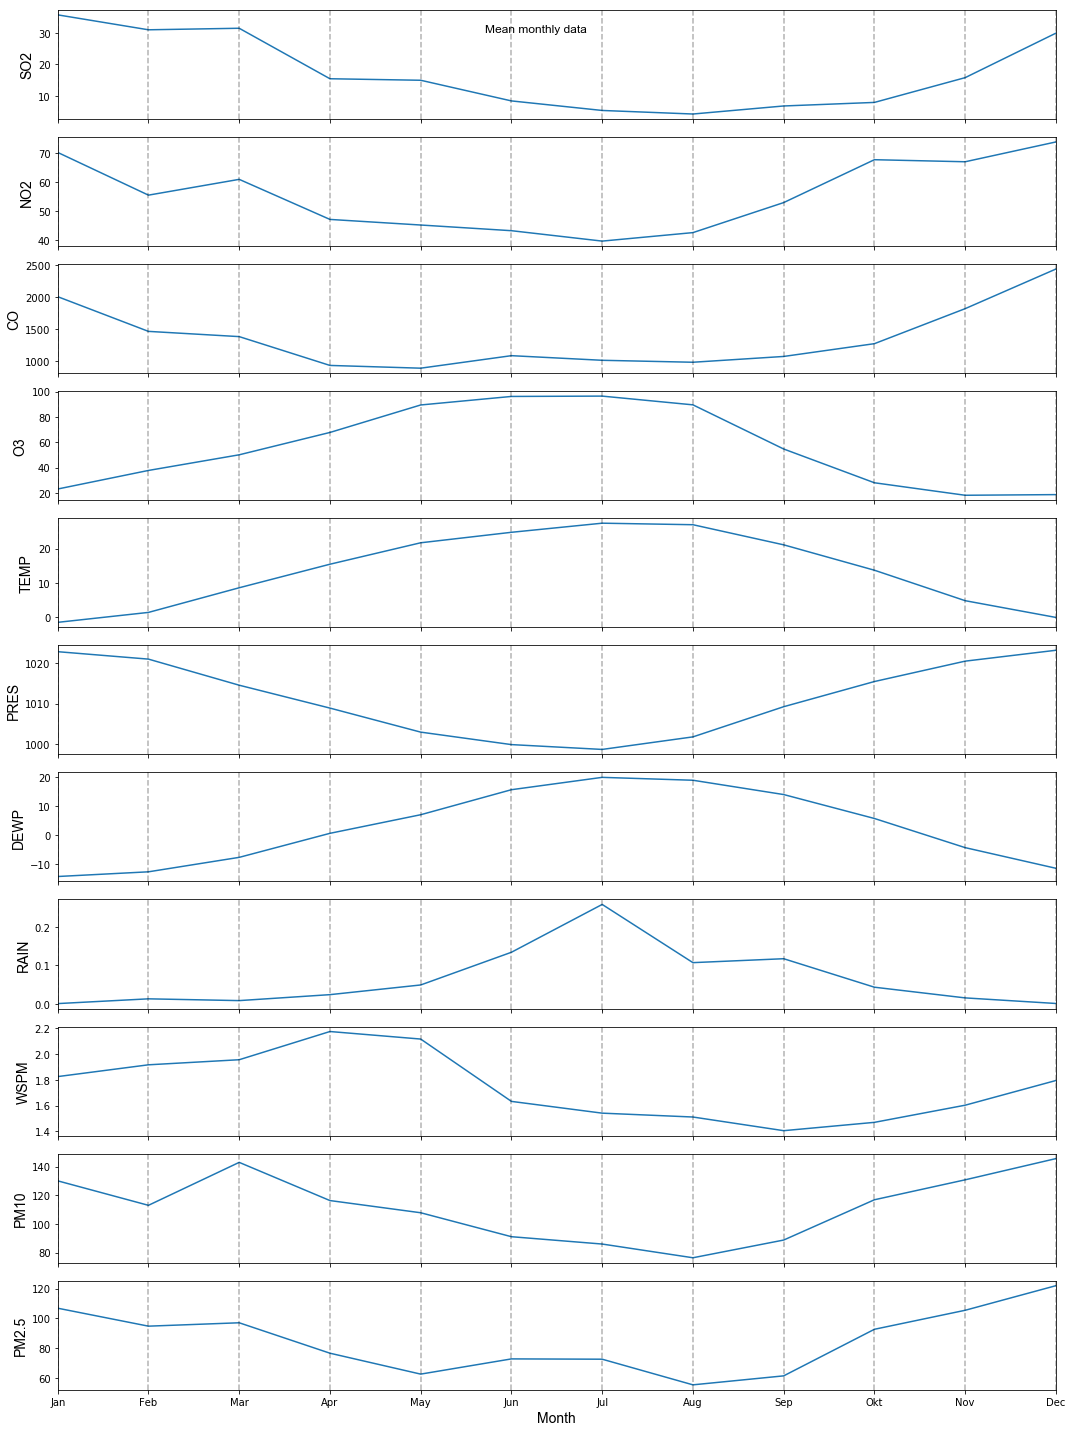

In [73]:
cols = np.arange(0,11)
monthly_ticks =  np.arange(12)
by_month.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec']
#fig, axs = plt.subplots(11)
#fig, (ax1, ax2) = plt.subplots(2, sharex=True))
fig = plt.figure(figsize = (15,20))
for col in cols:
    plt.subplot(len(cols),1,col+1) 
    by_month.iloc[:,col].plot(xticks = monthly_ticks, sharex=True)
    plt.ylabel(columns[col], fontdict = font_dict)
    for i in by_month.index:
        plt.axvline(i, color = 'k', linestyle = '--', alpha = 0.3)
    #plt.grid(color = 'grey', linestyle = '--', linewidth = 0.9)
plt.suptitle('Mean monthly data', fontdict = font_dict)
plt.xlabel('Month', fontdict = font_dict)
#plt.legend(bbox_to_anchor=(1.25, 1.), loc='upper right',  frameon=False)
plt.tight_layout()
plt.show()

We see a cycle in the monthly data with the summer months to have lower PM2.5 and PM10 concentration values compared to the winter months (esp. Nov, Dec, Jan). Same cycle is seen to other features like CO, NO2 and SO2.

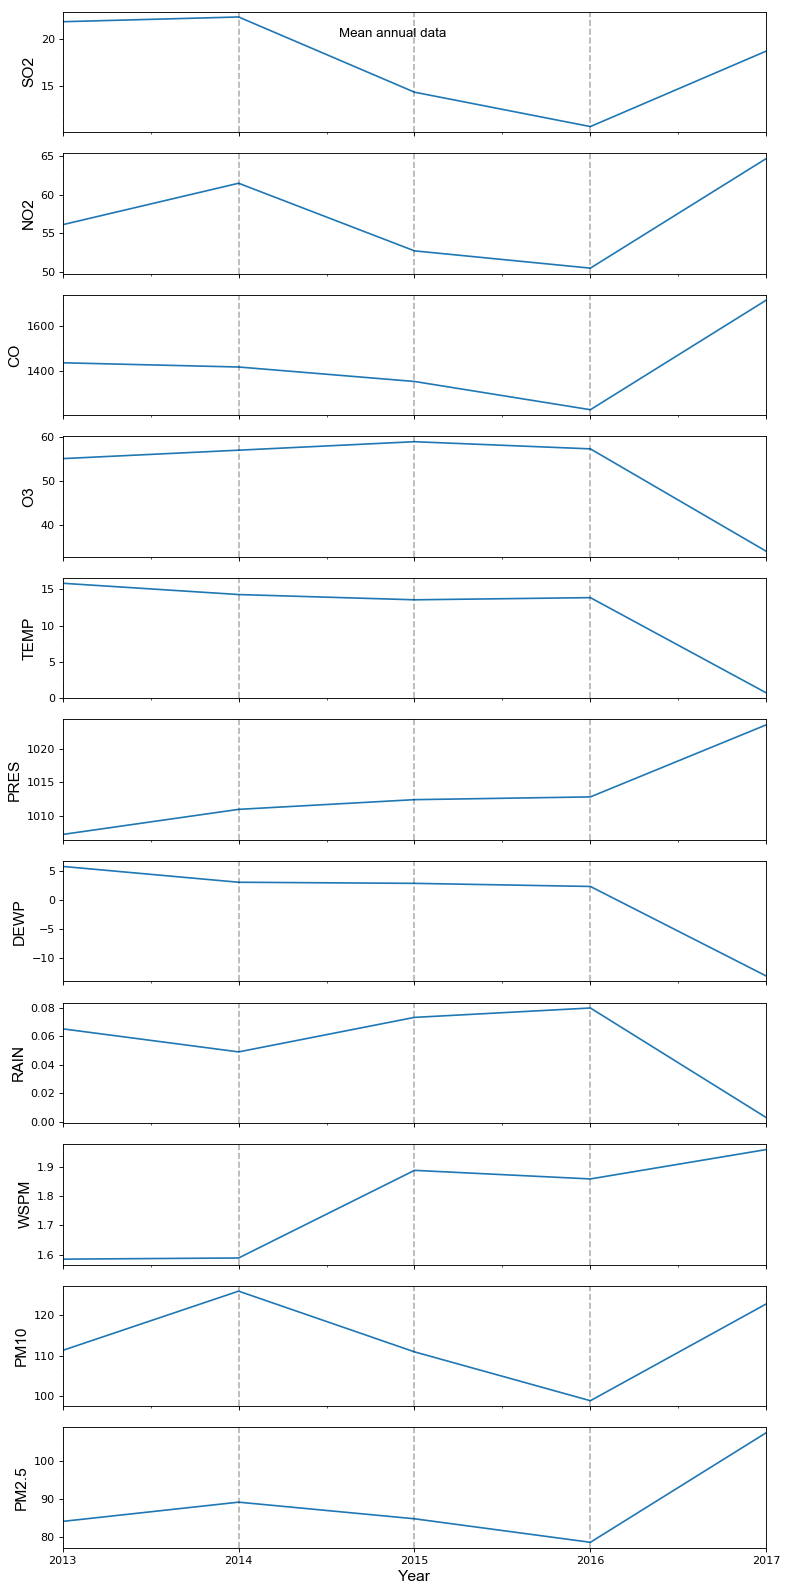

In [74]:
cols = np.arange(0,11)

#fig, axs = plt.subplots(11)
#fig, (ax1, ax2) = plt.subplots(2, sharex=True))
fig = plt.figure(figsize = (10,20), dpi = 80)
# plt.rcParams['axes.facecolor'] = 'grey'
for col in cols:
    plt.subplot(len(cols),1,col+1) 
    #by_year.iloc[:,col].plot(xticks = np.arange(2017), sharex=True)
    by_year.iloc[:,col].plot(xticks = np.arange(2013,2018), sharex=True)
    plt.ylabel(columns[col], fontdict = font_dict)
    for i in range(2013, 2017):
        plt.axvline(i, color = 'k', linestyle = '--', alpha = 0.3)
plt.suptitle('Mean annual data', fontdict = font_dict)
plt.xlabel('Year', fontdict = font_dict)
#plt.legend(bbox_to_anchor=(1.25, 1.), loc='upper right',  frameon=False)
plt.tight_layout()
plt.show()

We can see that the increasing trend till 2014 and then decreasing till 2016 is the temperature trend. So PM2.5 follows the temperature trend. It has to be noted that the increase in 2017 is due to the fact that in 2017 we have data only for the first two months, Jan and Feb which have the highest PM2.5 concentration compared with the rest of the months. Therefore it should not be interpreted as a general tendency to increase in 2017.

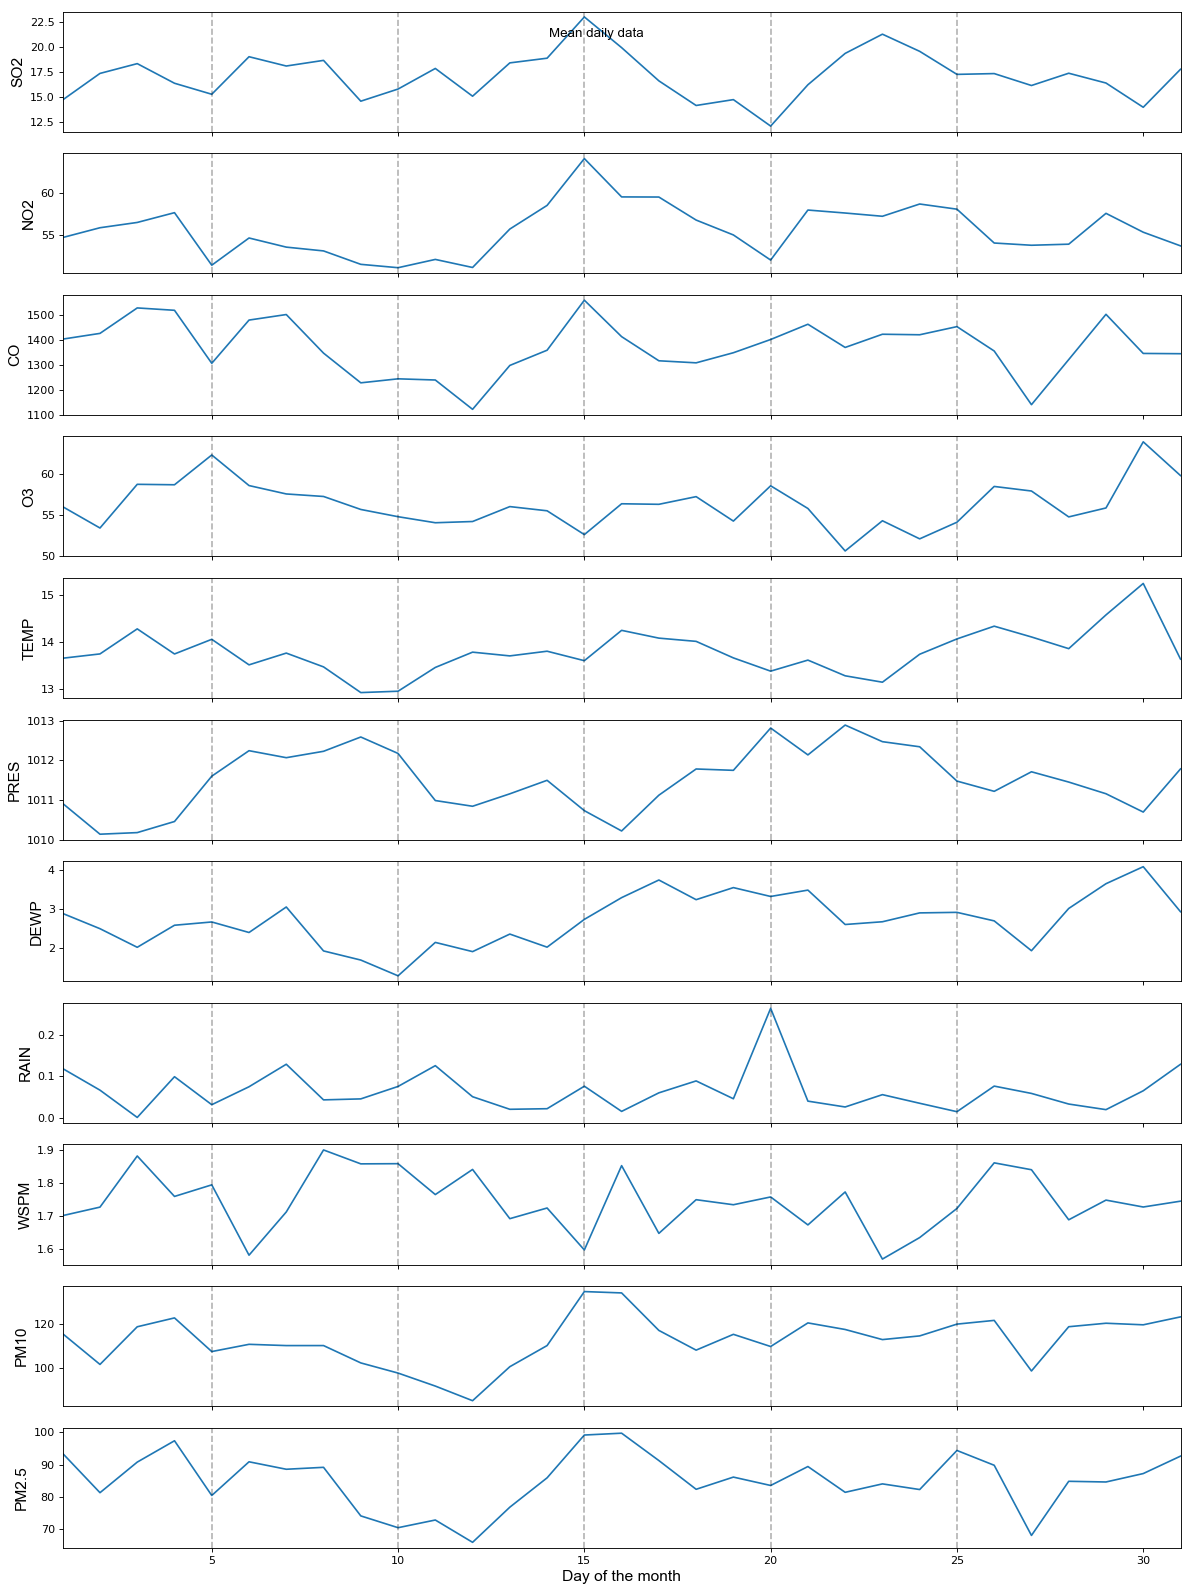

In [75]:
cols = np.arange(0,11)

#fig, axs = plt.subplots(11)
#fig, (ax1, ax2) = plt.subplots(2, sharex=True))
fig = plt.figure(figsize = (15,20), dpi = 80)
for col in cols:
    plt.subplot(len(cols),1,col+1) 
    #by_year.iloc[:,col].plot(xticks = np.arange(2017), sharex=True)
    by_day.iloc[:,col].plot( sharex=True)
    plt.ylabel(columns[col], fontdict = font_dict)
    for i in range(0, 30, 5):
        plt.axvline(i, color = 'k', linestyle = '--', alpha = 0.3)
plt.suptitle('Mean daily data', fontdict = font_dict)
plt.xlabel('Day of the month', fontdict = font_dict)

#plt.legend(bbox_to_anchor=(1.25, 1.), loc='upper right',  frameon=False)
plt.tight_layout()

plt.show()

In this case there are some cycles as well with some peaks during the middle of the month or otherwise stated every two weeks. Again PM2.5 and PM10 are aligned.

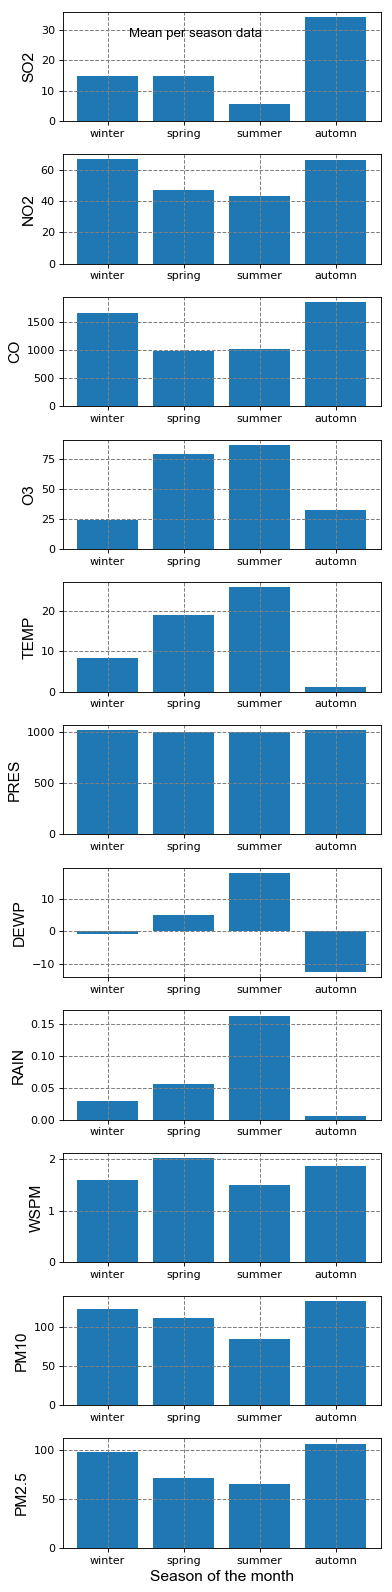

In [76]:
cols = np.arange(0,11)
labels = ['winter', 'spring', 'summer','automn']
xcor = np.arange(4)
#fig, axs = plt.subplots(11)
#fig, (ax1, ax2) = plt.subplots(2, sharex=True))
fig= plt.figure(figsize = (5,20), dpi = 80)
for col in cols:
    plt.subplot(len(cols),1,col+1) 
    #plt.subplot(5,3,col+1) 
    #by_year.iloc[:,col].plot(xticks = np.arange(2017), sharex=True)
    plt.bar(labels, by_season.iloc[:,col])
    plt.ylabel(columns[col], fontdict = font_dict)
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.9)
plt.suptitle('Mean per season data', fontdict = font_dict)
plt.xlabel('Season of the month', fontdict = font_dict)
plt.xticks(xcor,labels)
#plt.legend(bbox_to_anchor=(1.25, 1.), loc='upper right',  frameon=False)
plt.tight_layout()
plt.show()

Automn should exhibit the higher concentrations of PM2.5 as Nov and Dec are two months assigned to automn according to our definitions.

## Heatmaps

I will use unstack to transform the result from long to wide format and then calculate the ratio row by row using apply method:

I check the group size

In [77]:
num_features = [
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'WSPM',
 'PM10',
 'PM2.5'
]

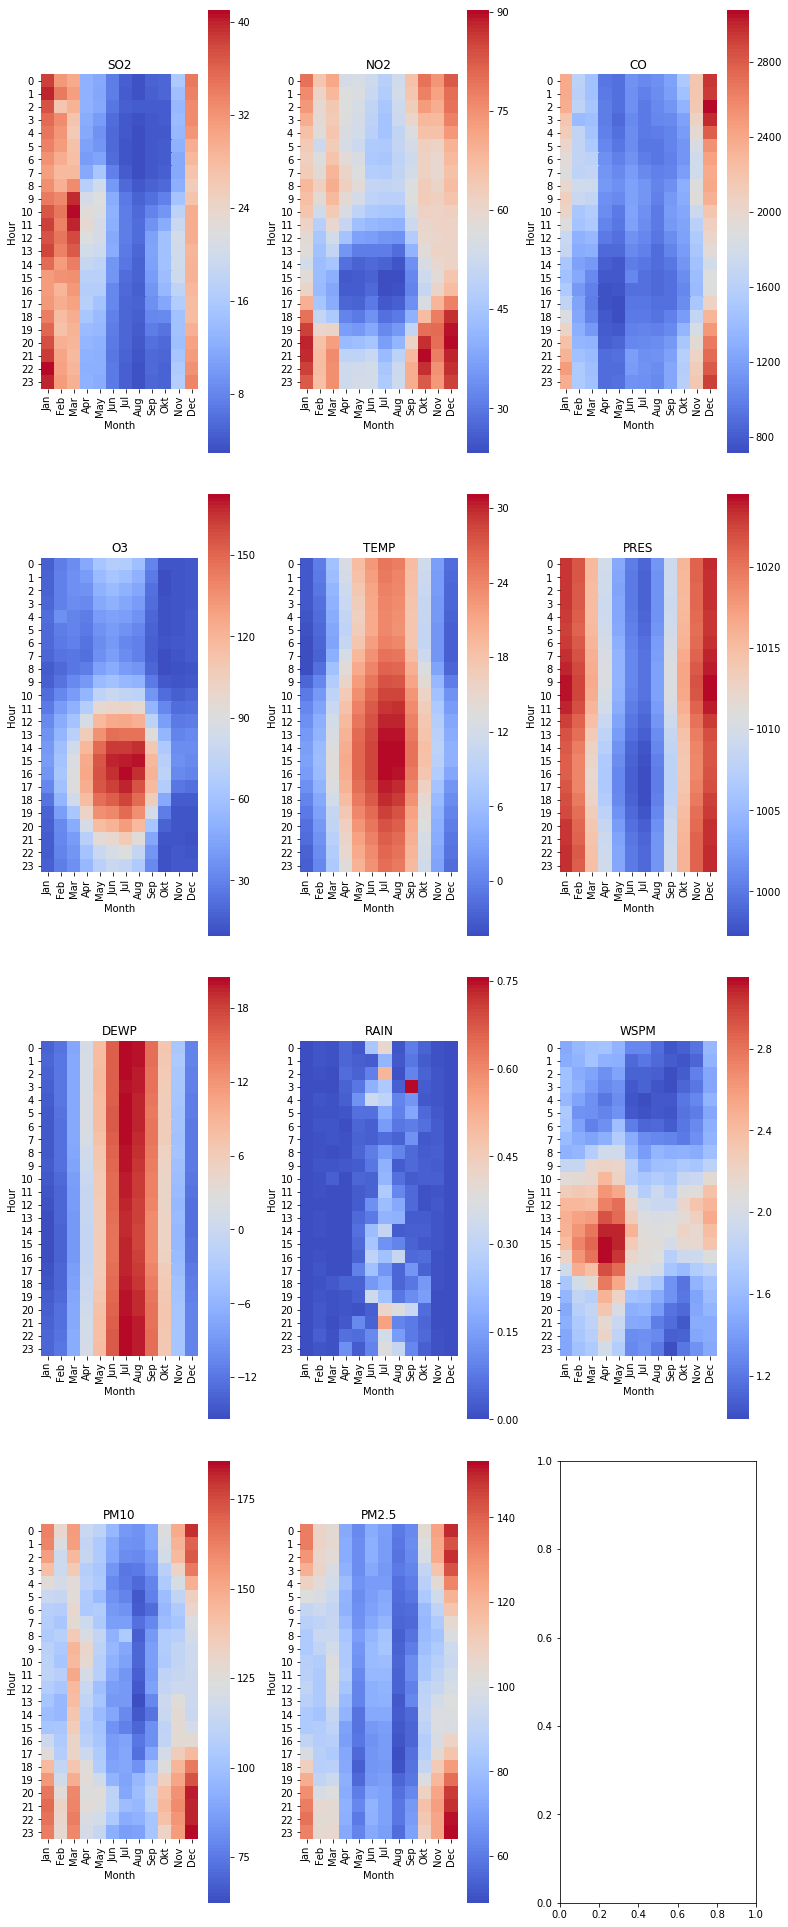

In [78]:
xticklabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec']

fig, axes = plt.subplots(nrows = 4, ncols =3, figsize = (11, 27), sharex = False)

for (feature, ax) in zip(num_features, axes.reshape(-1)[:12]):
    temp_HM = data[[feature, 'Hour', 'Month']]
    temp_HM_g = temp_HM.groupby(['Hour', 'Month']).mean().unstack(level = 1)
    sns.heatmap(temp_HM_g, ax = ax, square = True, annot=False, cmap=sns.color_palette("coolwarm", 128), xticklabels = xticklabels)
    ax.set_title(feature)
    # ax.set(title = '{}'.format(feature))
    ax.set(ylabel = 'Hour')
    ax.set(xlabel = 'Month')
    ax.set_title(feature)  
    #ax[3,2].reshape(-1).set_visible(False)
plt.tight_layout()
plt.show()

We clearly see some patterns with respect to Month and Hour. For example there are some peaks of O3 during the months May - Aug but only for the hours 14:00 - 19:00. The opposite holds for NO2. For other variables like PRES, SO2 and CO the hourly fluctuations are not large, I observe a fluctuation which depends on the month, not the hour of the day.

side note: I did not manage to delete the last figure.

So including all these variables e.g. Hour, Month, Season, Year in the feature matrix is important in order to catch these cycles.

## Boxplots

I will use boxplots to see the averages fluctuations accross time but also how the distributions are spread out.

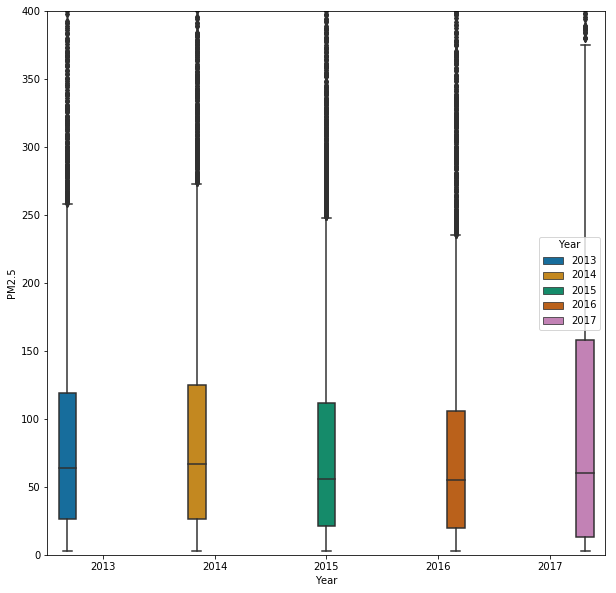

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))
f = sns.boxplot(y=data['PM2.5'], x=data['Year'], 
                 data=data, 
                 palette="colorblind", 
                  hue='Year')
f.set_ylim(bottom=0, top=400);

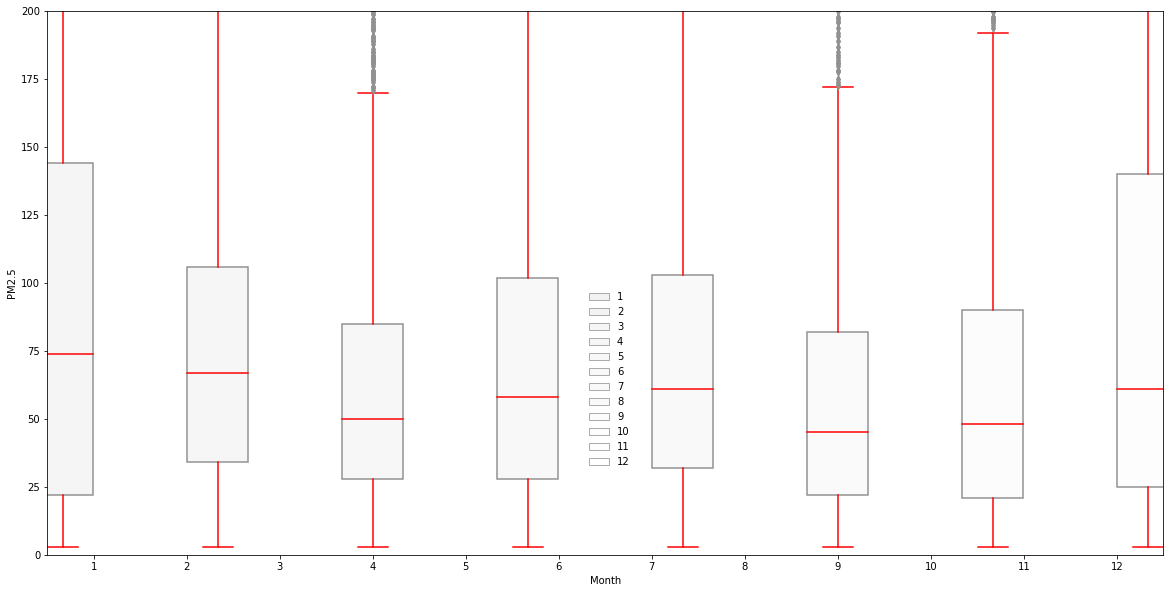

In [80]:
fig, ax = plt.subplots(figsize=(20, 10))
g = sns.boxplot(y=data['PM2.5'], x=data['Month'], 
                 data=data, 
                 color = 'white',
                 hue='Month',
                 width = 8) 
for line in ax.get_lines():
    line.set_color('red')
#g.set_xlim(left=0, right=6)
plt.legend(bbox_to_anchor=(0.53, 0.5), loc='upper right',  frameon=False)
g.set_ylim(bottom=0, top=200);

The mean varies a little with respect to the annual and monthly average values

I observe here that in Automn and Winter we have the larger variation and higher peaks in the PM2.5 concentration values 

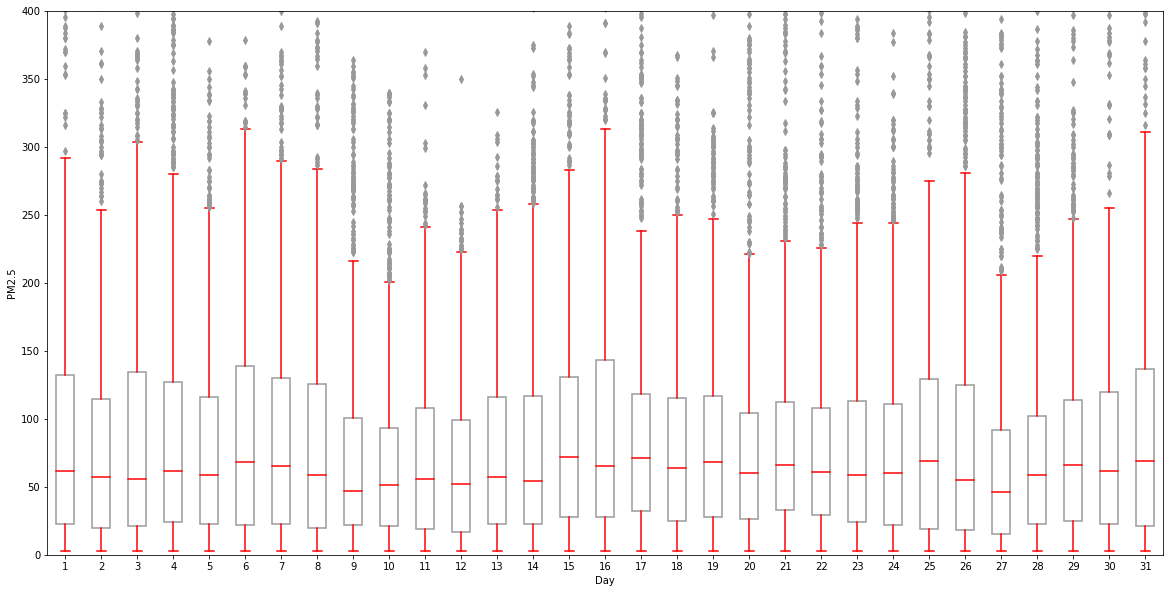

In [81]:
fig, ax = plt.subplots(figsize=(20, 10))
g = sns.boxplot(y=data['PM2.5'], x=data['Day'], 
                 data=data, 
                 color = 'white',
                # hue='Weekday',
                 width = 0.5) 
for line in ax.get_lines():
    line.set_color('red')
#g.set_xlim(left=0, right=6)
#plt.legend(bbox_to_anchor=(0.53, 0.5), loc='upper right',  frameon=False)
g.set_ylim(bottom=0, top=400);

I observe a seasonality component every two weeks but it is not a strong one 

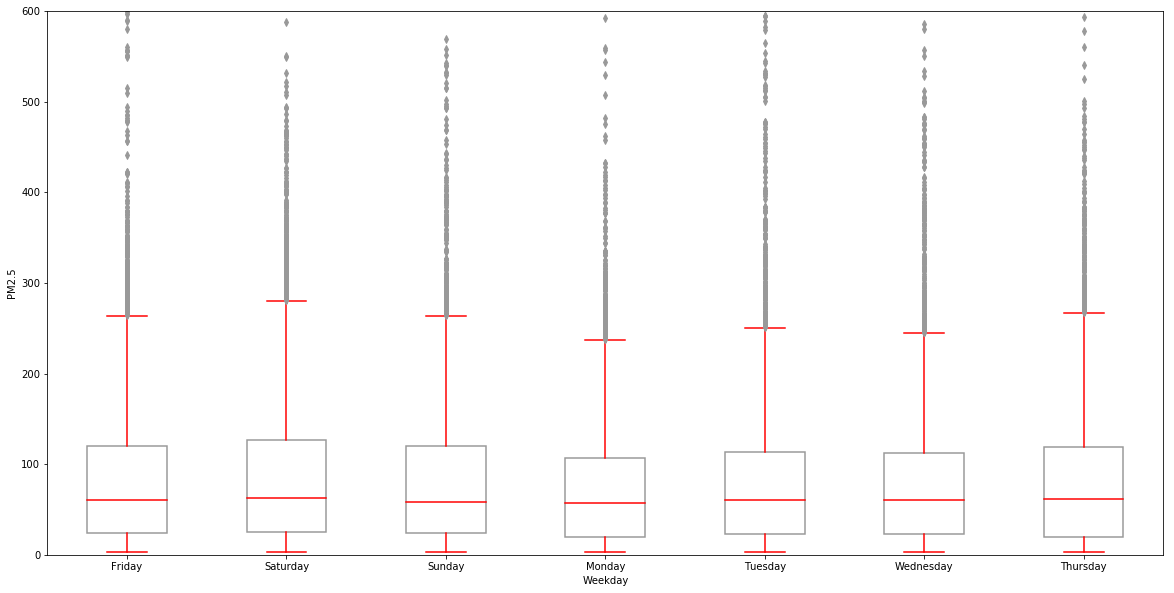

In [82]:
fig, ax = plt.subplots(figsize=(20, 10))
g = sns.boxplot(y=data['PM2.5'], x=data['Weekday'], 
                 data=data, 
                 color = 'white',
                # hue='Weekday',
                 width = 0.5) 
for line in ax.get_lines():
    line.set_color('red')
#g.set_xlim(left=0, right=6)
#plt.legend(bbox_to_anchor=(0.53, 0.5), loc='upper right',  frameon=False)
g.set_ylim(bottom=0, top=600);

The mean does not change with the weekdays.

## Handling Missing values in numerical features

I check for missing values per feature.

In [83]:
data.isnull().sum()

Weekday       0
Season        0
Year          0
Month         0
Day           0
Hour          0
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
PM10        484
PM2.5       696
Range         0
dtype: int64

In [84]:
data_numeric = data[['CO', 'O3', 'NO2', 'SO2', 'wd', 'PM2.5', 'PM10', 'TEMP', 'RAIN', 'DEWP']]._get_numeric_data()

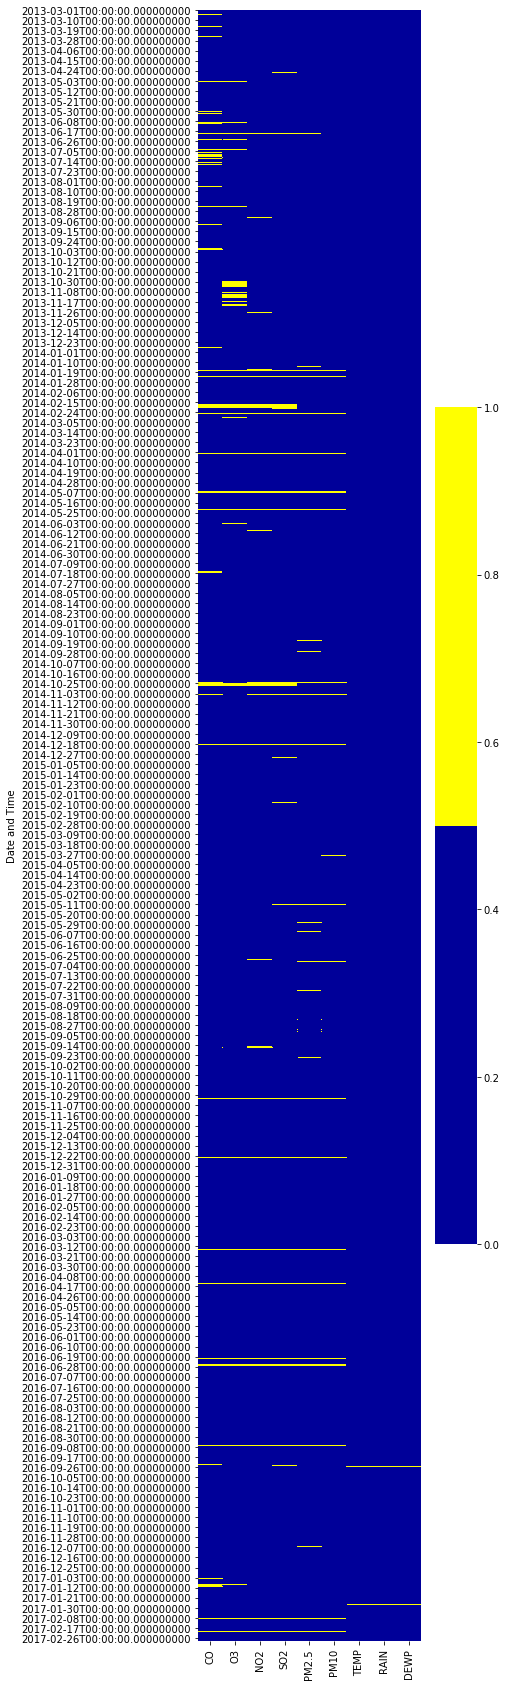

In [85]:
colors = ['#000099', '#ffff00']
# yellow for the missing values, blue for the nonmissing

fig, ax = plt.subplots(figsize =(5,30))
ax = sns.heatmap(data_numeric.isnull(), cmap = sns.color_palette(colors))

By visual inspection of the missing values, I observe that in some cases when a missing value occurs usually neighboring values are also missing which may indicate that a measurement was missing.

I am doing the following lag scatter plots for all the numerical features/target variable with missing values in order to see if there is any autocorrelation with previous values and in order to impute the right missing values based on previous ones. I want to examine for example whether I could use the value of the previous hour or day or previous month or year 

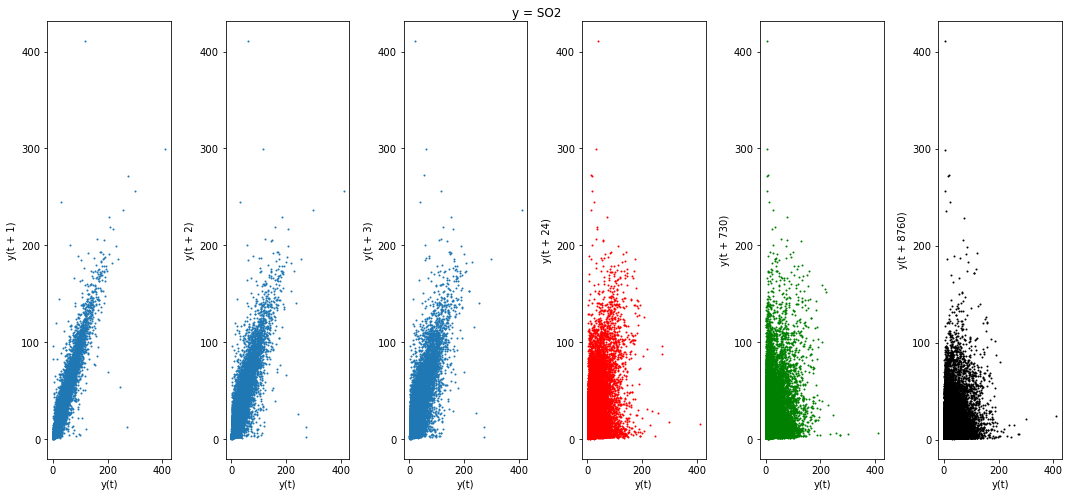

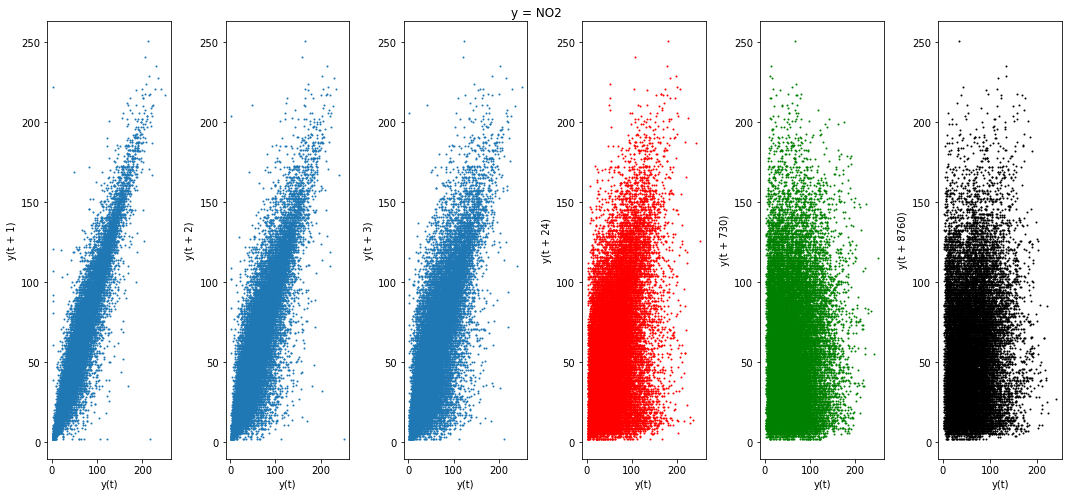

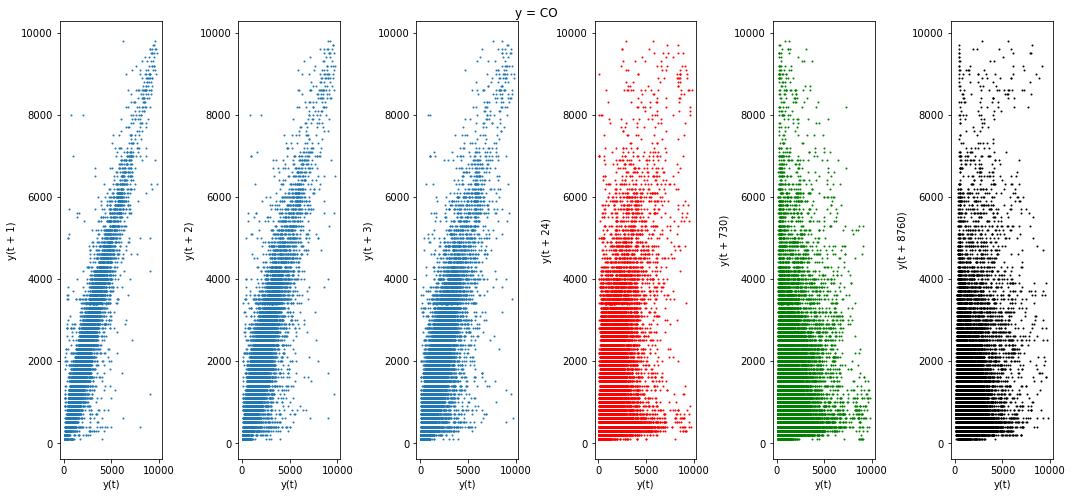

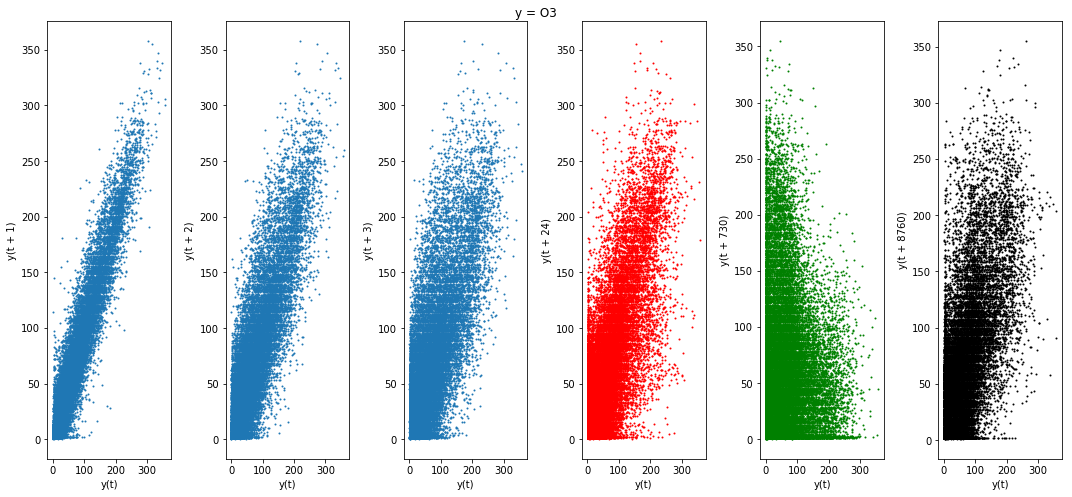

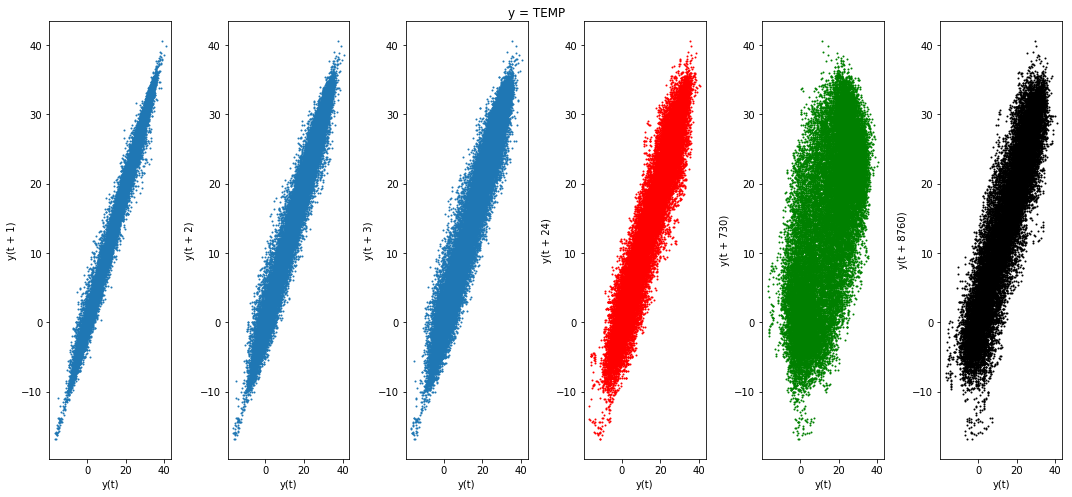

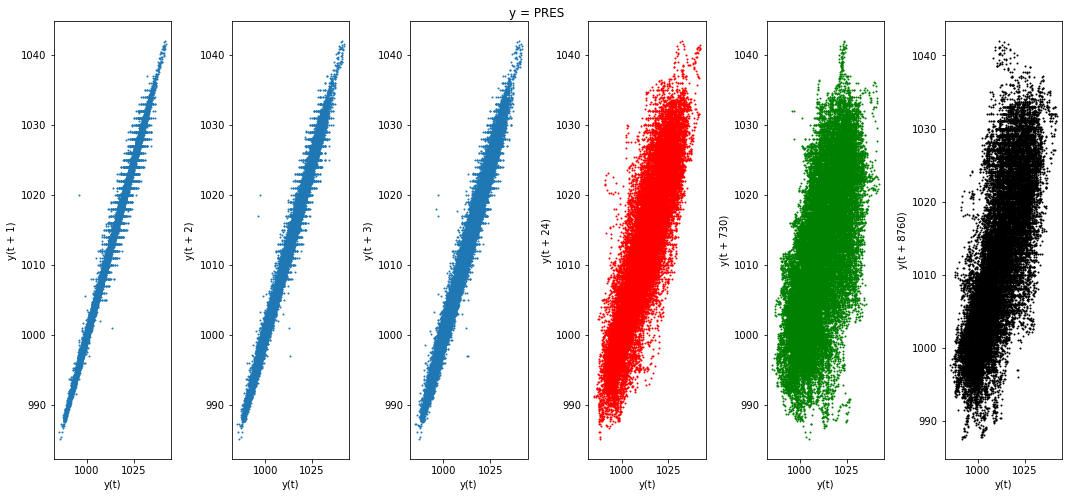

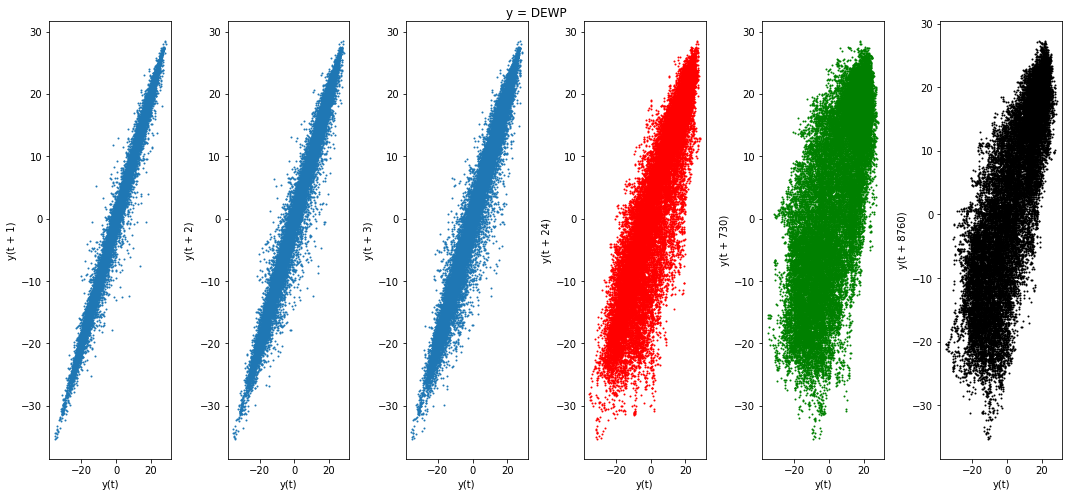

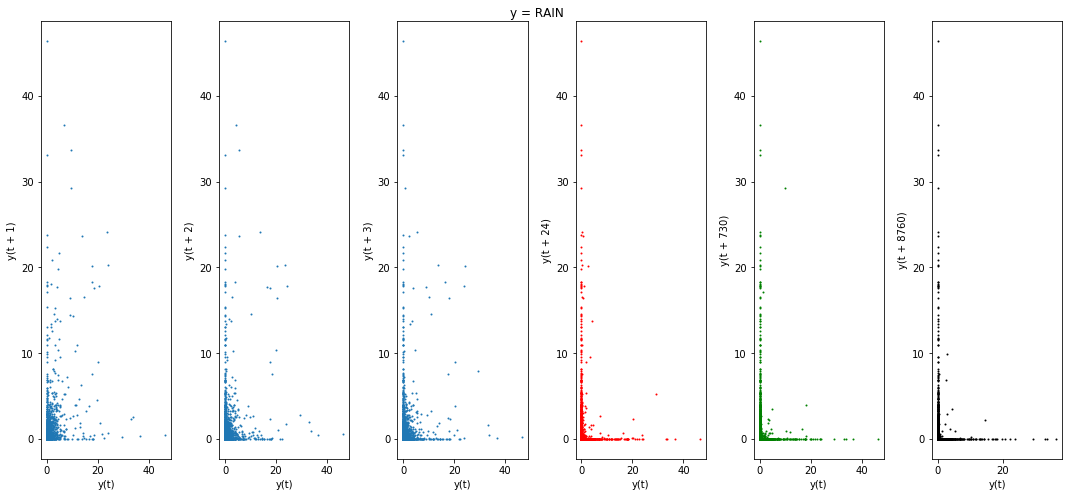

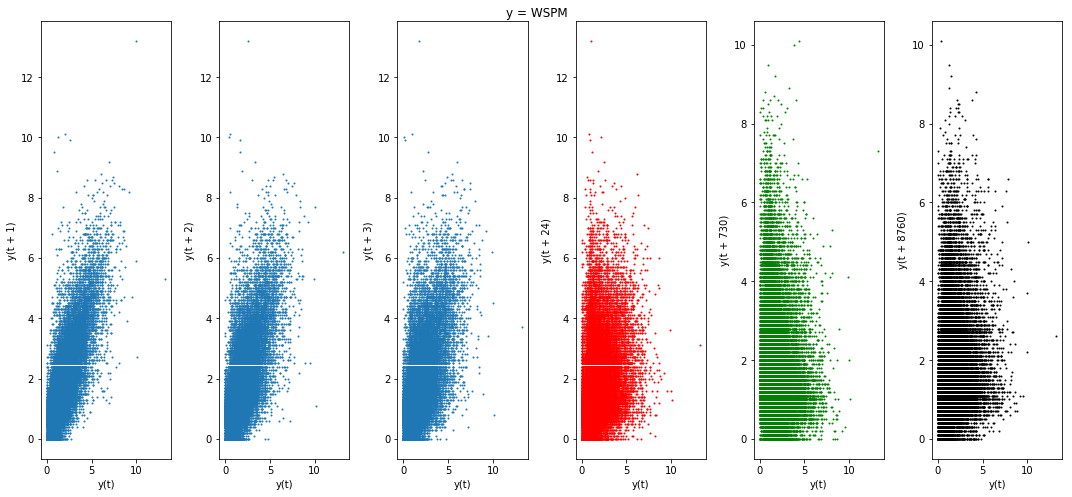

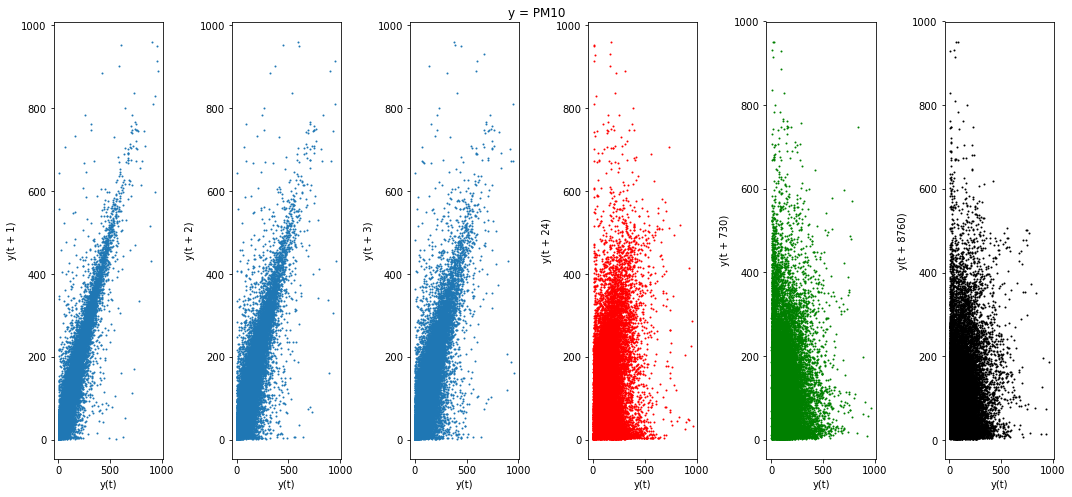

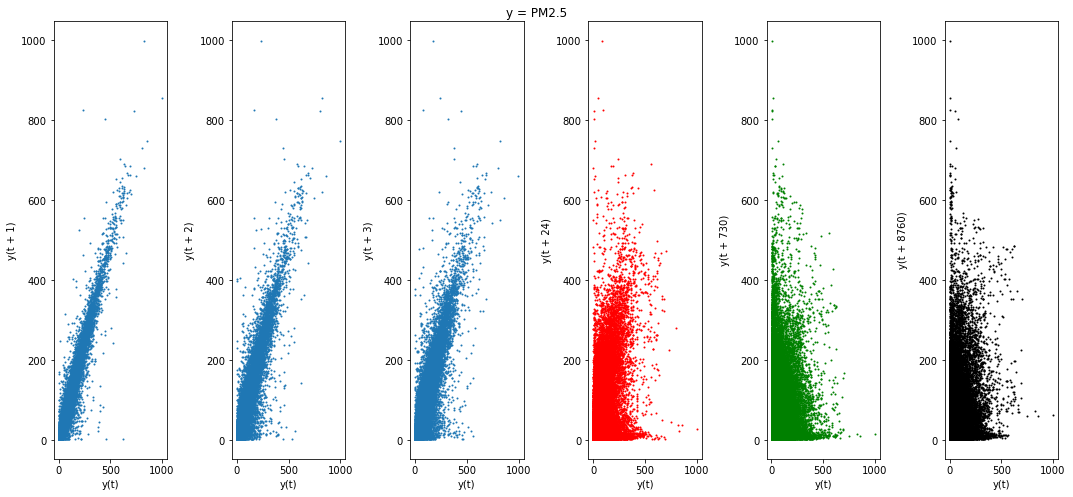

In [86]:
###### fig, axes = plt.subplots(nrows = 10, ncols = 1, figsize = (10, 55) )
#for col, ax in zip(columns, axes.ravel()):

for col in columns:   
    fig, axes = plt.subplots(1,6, figsize = (15,7))
    fig.suptitle('y = {}'.format(col)) # or plt.suptitle('Main title')
    ax.set(ylabel = col)
    lag_plot(data[col], lag = 1, ax = axes[0], s = 1)
    lag_plot(data[col], lag = 2, ax = axes[1], s = 1)
    lag_plot(data[col], lag = 3, ax = axes[2], s = 1)
    lag_plot(data[col], lag = 24, ax = axes[3], s = 1, c = 'red')
    lag_plot(data[col], lag = 730, ax = axes[4], s = 1, c = 'green')
    lag_plot(data[col], lag = 8760, ax = axes[5], s = 1, c = 'black')
    #ax.set(title = '{}'.format(col))
    #ax.set(xlabel = 'Time')
    #ax.set(ylabel = col)
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # default: rect=[0, 0, 1, 1]

In all the cases apart from RAIN variable, there is a linear relationship wrt the first lag(s), meaning that the feature is not going to change from one hour to the other that much.

I will now check the non zeros values of RAIN.

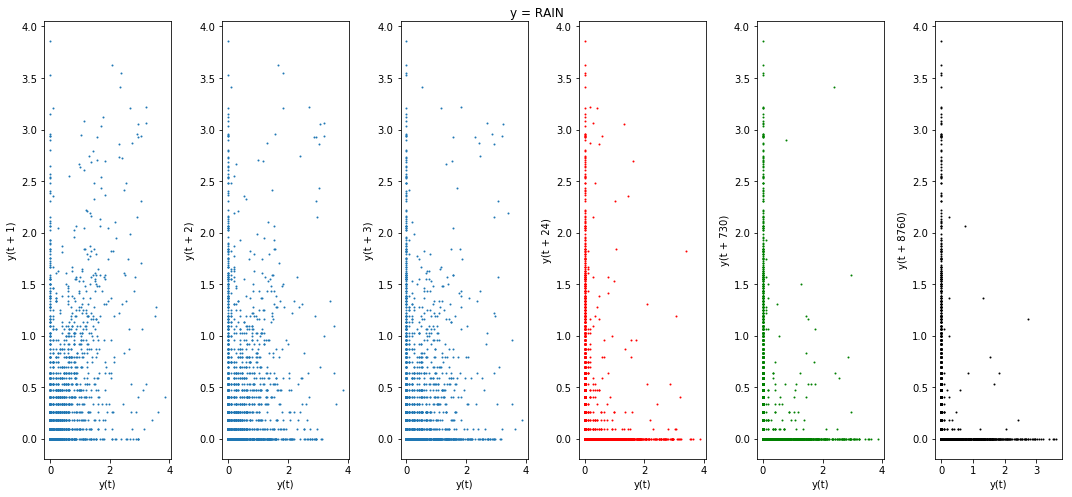

In [87]:
col = 'RAIN'
fig, axes = plt.subplots(1,6, figsize = (15,7))
fig.suptitle('y = RAIN') # or plt.suptitle('Main title')
lag_plot(np.log1p(data[col].dropna()), lag = 1, ax = axes[0], s = 1)
lag_plot(np.log1p(data[col].dropna()), lag = 2, ax = axes[1], s = 1)
lag_plot(np.log1p(data[col].dropna()), lag = 3, ax = axes[2], s = 1)
lag_plot(np.log1p(data[col].dropna()), lag = 24, ax = axes[3], s = 1, c = 'red')
lag_plot(np.log1p(data[col].dropna()), lag = 730, ax = axes[4], s = 1, c = 'green')
lag_plot(np.log1p(data[col].dropna()), lag = 8760, ax = axes[5], s = 1, c = 'black')
    #ax.set(title = '{}'.format(col))
    #ax.set(xlabel = 'Time')
    #ax.set(ylabel = col)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # default: rect=[0, 0, 1, 1]

In [88]:
data.RAIN.unique()

array([ 0. ,  1.4,  1.2,  1.5,  2. ,  0.2,  0.3,  2.9,  0.8,  0.7,  1. ,
        0.1,  0.5,  1.8,  1.7,  0.9,  0.4,  0.6,  3.8,  6.6,  5.2,  2.2,
        2.5,  3. , 13.7,  1.3,  7.6,  1.1,  1.9,  3.3, 10.9, 10.2,  2.7,
       14.6, 16.6,  2.1,  6.7,  4.5, 19.8, 10.4,  1.6,  3.5,  3.7,  3.1,
        2.4,  5. ,  3.4,  5.3,  3.9, 13.1,  6.1, 10.1, 14.3,  9.2, 23.8,
        8.1,  4.2,  2.3,  4.3, 12.6,  4.7, 11.5, 18.3,  8.2,  6. ,  2.8,
       17.1,  9. , 14.4,  5.6, 20.9, 13. ,  6.9,  4.1,  5.9,  4.4,  7.4,
        4. , 18.1,  7.7, 22.4,  nan,  3.6,  4.6, 11.7,  3.2,  2.6,  9.9,
        4.8,  9.6, 33.7, 15.4,  9.5, 29.3,  7.9,  7.2, 17.8, 33.1,  7.3,
       11.8, 36.6, 13.4,  6.3,  5.7,  4.9, 17.9,  7.1, 13.8, 23.7, 24.1,
       20.3, 20.2, 16.4, 17.7, 17.6, 15.3, 12.1,  5.5, 21.7, 46.4, 14. ,
        5.1])

I observe that generally the 1-3 previous hours can be used to impute the missing values for all the variables except the RAIN. My strategy for the imputation of the missing values will be the following:

- For the variable RAIN (precipitation), I will need to build a binary variable in addition to the precipitation value. all missing values will be imputed with the most common and dominant value which is 0 (no rain).

- For the rest of the numerical variables: Missing value will be imputed by the average value of the 3 last hours
- For the nominal cateforical feature wind direction 'wd' the imputation will be done on a seperate notebook using MissForest imputator.

### Missing value imputation

I will impute the missing values of temperature TEMP with the rolling window of the last 3 hours.

In [89]:
# I save a copy of the data
data_old = data.copy()

In [90]:
# Note: this is an inplace operation.
# update(): Modify in place using non-NA values from another DataFrame. Aligns on indices. There is no return value.

data['TEMP'] = data_old['TEMP'].rolling(window = 3, center = True, min_periods = 1).mean()
data['TEMP'].update(data_old['TEMP'])

In [91]:
data_old['TEMP'].isna().sum()

19

In [92]:
data['TEMP'].isna().sum()

9

I observe that not all values were imputed but only 5 out of 9.

In [93]:
data['TEMP'][data['TEMP'].isna()]

Date and Time
2016-09-25 20:00:00   NaN
2016-09-25 21:00:00   NaN
2016-09-25 22:00:00   NaN
2016-09-25 23:00:00   NaN
2017-01-19 04:00:00   NaN
2017-01-19 05:00:00   NaN
2017-01-19 06:00:00   NaN
2017-01-19 07:00:00   NaN
2017-01-27 14:00:00   NaN
Name: TEMP, dtype: float64

There are consecutive hourly missing values in TEMP feature for the dates 25.09.2016 and 19.01.2017 so the rolling window (mean) could not provide a result of width 3 hours. For these cases I will impute the remaining missing values with the value of the previous day (offset of 24 hours).

I have to reset the index in order to allow for a on per row offset

In [94]:
data = data.reset_index()

In [95]:
data['TEMP_imp'] = data.apply(lambda x: data_old.loc[x['Date and Time']-pd.offsets.DateOffset(days = 1)]['TEMP'] if pd.isna(x['TEMP']) else x['TEMP'], axis = 1)

In [96]:
data['TEMP_imp'].isna().sum()

0

In [97]:
data.set_index(data['Date and Time'], drop = True, inplace = True)

In [98]:
data.head(3)

Date and Time Weekday  Season  Year  Month Day  \
Date and Time                                                              
2013-03-01 00:00:00 2013-03-01 00:00:00  Friday  winter  2013      3   1   
2013-03-01 01:00:00 2013-03-01 01:00:00  Friday  winter  2013      3   1   
2013-03-01 02:00:00 2013-03-01 02:00:00  Friday  winter  2013      3   1   

                     Hour  SO2   NO2     CO  ...    PRES  DEWP  RAIN   wd  \
Date and Time                                ...                            
2013-03-01 00:00:00     0  6.0  17.0  200.0  ...  1021.9 -19.0   0.0  WNW   
2013-03-01 01:00:00     1  7.0  14.0  200.0  ...  1022.4 -19.3   0.0  WNW   
2013-03-01 02:00:00     2  NaN  16.0  200.0  ...  1022.6 -19.7   0.0  WNW   

                     WSPM        station  PM10 PM2.5             Range  \
Date and Time                                                            
2013-03-01 00:00:00   2.0  Wanshouxigong   9.0   9.0  2013-03-01 00:00   
2013-03-01 01:00:00   4.4  Wanshouxigong  11.0  11.0  2013-03-01 01:00   
2013-03-01 02:00:00   4.7  Wanshouxigong   8.0   8.0  2013-03-01 02:00   

                     TEMP_imp  
Date and Time                  
2013-03-01 00:00:00       0.3  
2013-03-01 01:00:00      -0.1  
2013-03-01 02:00:00      -0.6  

[3 rows x 22 columns]

In [99]:
data.drop(['Date and Time'], axis = 1, inplace = True)

In [100]:
data.head(3)

Weekday  Season  Year  Month Day  Hour  SO2   NO2     CO  \
Date and Time                                                                  
2013-03-01 00:00:00  Friday  winter  2013      3   1     0  6.0  17.0  200.0   
2013-03-01 01:00:00  Friday  winter  2013      3   1     1  7.0  14.0  200.0   
2013-03-01 02:00:00  Friday  winter  2013      3   1     2  NaN  16.0  200.0   

                       O3  ...    PRES  DEWP  RAIN   wd WSPM        station  \
Date and Time              ...                                                
2013-03-01 00:00:00  62.0  ...  1021.9 -19.0   0.0  WNW  2.0  Wanshouxigong   
2013-03-01 01:00:00  66.0  ...  1022.4 -19.3   0.0  WNW  4.4  Wanshouxigong   
2013-03-01 02:00:00  59.0  ...  1022.6 -19.7   0.0  WNW  4.7  Wanshouxigong   

                     PM10  PM2.5             Range TEMP_imp  
Date and Time                                                
2013-03-01 00:00:00   9.0    9.0  2013-03-01 00:00      0.3  
2013-03-01 01:00:00  11.0   11.0  2013-03-01 01:00     -0.1  
2013-03-01 02:00:00   8.0    8.0  2013-03-01 02:00     -0.6  

[3 rows x 21 columns]

checking if the imputation is done correctly

In [101]:
data['2016-09-25 20:00:00': '2016-09-25 23:00:00'][['TEMP', 'TEMP_imp']]

TEMP  TEMP_imp
Date and Time                      
2016-09-25 20:00:00   NaN      22.9
2016-09-25 21:00:00   NaN      22.3
2016-09-25 22:00:00   NaN      21.5
2016-09-25 23:00:00   NaN      21.3

In [102]:
data['2016-09-24 20:00:00': '2016-09-24 23:00:00'][['TEMP', 'TEMP_imp']]

TEMP  TEMP_imp
Date and Time                      
2016-09-24 20:00:00  22.9      22.9
2016-09-24 21:00:00  22.3      22.3
2016-09-24 22:00:00  21.5      21.5
2016-09-24 23:00:00  21.3      21.3

In [103]:
data['2016-09-23 20:00:00': '2016-09-23 23:00:00'][['TEMP', 'TEMP_imp']]

TEMP  TEMP_imp
Date and Time                        
2016-09-23 20:00:00  23.650    23.650
2016-09-23 21:00:00  22.775    22.775
2016-09-23 22:00:00  22.675    22.675
2016-09-23 23:00:00  22.000    22.000

In [104]:
data['2017-01-19 04:00:00': '2017-01-19 07:00:00'][['TEMP', 'TEMP_imp']]

TEMP  TEMP_imp
Date and Time                      
2017-01-19 04:00:00   NaN    -5.325
2017-01-19 05:00:00   NaN    -4.475
2017-01-19 06:00:00   NaN    -4.700
2017-01-19 07:00:00   NaN    -5.100

In [105]:
data['2017-01-18 04:00:00': '2017-01-18 07:00:00'][['TEMP', 'TEMP_imp']]

TEMP  TEMP_imp
Date and Time                       
2017-01-18 04:00:00 -5.325    -5.325
2017-01-18 05:00:00 -4.475    -4.475
2017-01-18 06:00:00 -4.700    -4.700
2017-01-18 07:00:00 -5.100    -5.100

The remaining missing values for the Temperature were imputed with the value of the previous day. I will update the 'TEMP' values with the last 24 hours imputed ones and finally drop the 'TEMP_imp' column.

In [106]:
data['TEMP'] = data['TEMP_imp']

In [107]:
data['TEMP'].isna().sum()

0

In [108]:
data.drop(columns = ['TEMP_imp'], axis = 1, inplace = True)

Likewise, I will repeat the imputation of 3 mean rolling windows for the rest of the numerical variables apart from RAIN.

In [109]:
data.isna().sum()

Weekday       0
Season        0
Year          0
Month         0
Day           0
Hour          0
SO2         669
NO2         754
CO         1297
O3         1078
TEMP          0
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
PM10        484
PM2.5       696
Range         0
dtype: int64

In [110]:
for col in ['SO2', 'NO2', 'CO','O3', 'PRES', 'DEWP', 'WSPM', 'PM10', 'PM2.5']:
    data[col] = data_old[col].rolling(window = 3, center = True, min_periods = 1).mean()
    data[col].update(data_old[col])

In [111]:
data.isna().sum()

Weekday      0
Season       0
Year         0
Month        0
Day          0
Hour         0
SO2        443
NO2        470
CO         825
O3         685
TEMP         0
PRES         9
DEWP         9
RAIN        19
wd          79
WSPM         6
station      0
PM10       259
PM2.5      346
Range        0
dtype: int64

For the remaining missing values, I will impute them with the value of the last hour (ffill).

In [112]:
data['SO2_imp'] = data['SO2'].fillna(method = 'ffill')

In [113]:
data['SO2_imp'].isna().sum()

0

In [114]:
data['SO2'] = data['SO2_imp']

In [115]:
data.drop(columns ='SO2_imp', axis = 1, inplace = True )

In [116]:
for col in ['NO2', 'CO','O3', 'PRES', 'DEWP', 'WSPM', 'PM10', 'PM2.5']:
    data[col] = data[col].fillna(method = 'ffill')

In [117]:
data.isna().sum()

Weekday     0
Season      0
Year        0
Month       0
Day         0
Hour        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN       19
wd         79
WSPM        0
station     0
PM10        0
PM2.5       0
Range       0
dtype: int64

For the precipitation feature 'RAIN' I will impute the missing values with 0 which is the most frequent value.

In [118]:
data['RAIN'] = data['RAIN'].fillna(0)

In [119]:
data.isna().sum()

Weekday     0
Season      0
Year        0
Month       0
Day         0
Hour        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         79
WSPM        0
station     0
PM10        0
PM2.5       0
Range       0
dtype: int64

## Stationarity
### Augmented Dickey_Fuller statistical test

It is important to have stationary target variable to the LM models because some models cannot handle non-stationarity.

I will use the Augmented Dickey_Fuller statistical test to check whether the target variable is stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure).

 __*Null Hypothesis (H0):*__ Fail to reject (p-value > 0.5), it suggests the time series has a unit root, meaning it is __non-stationary__. It has some time dependent structure.
 
__Alternate Hypothesis (H1):__ The null hypothesis is rejected (p-value < 0.5); it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [120]:
from statsmodels.tsa.stattools import adfuller

In [121]:
pm2p5 = data['PM2.5']

In [122]:
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], 
                      index = ["Test Statistic",
                                "p-value",
                                "# Lags Used",
                                "Number of Observations Used"])
    # Critical values are provided in a dictionary
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
        #dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

    
adf_test(pm2p5)

Results of Dickey-Fuller Test:
Test Statistic                -1.880797e+01
p-value                        2.022550e-30
# Lags Used                    5.000000e+01
Number of Observations Used    3.501300e+04
Critical Value (1%)           -3.430537e+00
Critical Value (5%)           -2.861623e+00
Critical Value (10%)          -2.566814e+00
dtype: float64


The p-value of the ADF test is less than the 5% and 1% significant levels and it suggests that the PM2.5 time series data is stationary (H0 is rejected). In this case there is no need to transform the data, detrend them (e.g. differentiate, log or both) to make it stationaty.

### KPSS statistical test

I will also check stationarity of PM2.5 time serie with KPSS statistical test. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

 __*Null Hypothesis (H0):*__ The process is stationary.

__*Alternate Hypothesis:*__ The series has a unit root (series is not stationary).

In [123]:
from statsmodels.tsa.stattools import kpss

# 'c': stationary around a constant (default)
# 'ct': stationary around a trend line (applicable if we know there is a trend in the data)

def kpss_test(timeseries):
    print(" Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index = ["Test Statistic", "p-value", "Lags Used"])
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value ({})".format(key)] = value
    print(kpss_output)
    
kpss_test(pm2p5)
# or:
# stats, p, lags, critical_values = kpss(pm2p5, nlags = "auto", regression = 'ct')

 Results of KPSS Test:
Test Statistic             0.192242
p-value                    0.100000
Lags Used                106.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Based upon the significance level of 0.05 and the p-value of KPSS test, the null hypothesis cannot be rejected (p>0.05). Hence, the time serie is stationary.

The results of both statistical tests are in alignment. The time serie is stationary.

## Handling Outliers

### Simple moving average

I will detect outliers using the rolling window which is a simple moving average. The simple moving average is the unweighted mean of the previous M data points. The selection of M (sliding window) depends on the amount of smoothing desired since increasing the value of M improves the smoothing at the expense of accuracy.The  length oof the sliding window is fixed (M = constant). I will create upper boundson acceptance values based on the preceding values (center = False).

In [124]:
def detect_outliers_rolling(timeseries, hours=24*30, n_std = 4, center = False):
    rolling_mean = timeseries.rolling(window = hours, center = center).mean()
    rolling_std = timeseries.rolling(window = hours, center = center).std()
    upper_bound = rolling_mean + (n_std * rolling_std)
    
    # identify outliers:
    mask = (timeseries > upper_bound)
    outliers = timeseries[mask]
    
    # Plot bounds and outliers
    plt.figure(figsize = (12,6))
    plt.plot(timeseries, "lightblue", label = "MP2.5")
    plt.plot(rolling_mean, "orange", label = "Rolling mean")
    plt.plot(upper_bound, "r--", label = "Upper bound", alpha = 0.5)
    plt.plot(outliers, "ro", markersize = 5, label = "Outlier candidate")
    plt.legend(loc = "best")
    plt.grid(True)
    plt.title("{} outliers detected using a moving window of size {}".format(len(outliers), hours))
    plt.show()

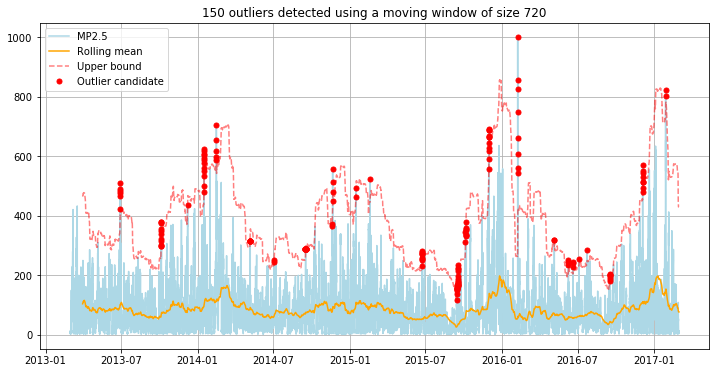

In [125]:
detect_outliers_rolling(data['PM2.5'])

### Exponential Moving Average

I will now do the same but use the exponential moving average. The exponential moving average is a widely used method to filter out noise and identify trends. The weight of each element decreases progressively over time, meaning the exponential moving average gives greater weight to recent data points. This is done under the idea that recent data is more relevant than old data. Compared to the simple moving average, the exponential moving average reacts faster to changes, since is more sensitive to recent movements. The smoothing factor has a value between 0 and 1 and represents the weighting applied to the most recent period.


In [126]:
def detect_outliers_expo(timeseries, span, n_std = 4, adjust = False):
    exponential_mean = timeseries.ewm( span = span, adjust = adjust).mean()
    exponential_std = timeseries.ewm( span = span, adjust = adjust).std()
    upper_bound = exponential_mean + (n_std * exponential_std)
    
    # identify outliers:
    mask = (timeseries > upper_bound)
    outliers = timeseries[mask]
    
    # Plot bounds and outliers
    plt.figure(figsize = (12,6))
    plt.plot(timeseries, "lightblue", label = "MP2.5")
    plt.plot(exponential_mean, "orange", label = "Rolling mean")
    plt.plot(upper_bound, "r--", label = "Upper bound", alpha = 0.3)
    plt.plot(outliers, "ro", markersize = 5, label = "Outlier candidate")
    plt.legend(loc = "best")
    plt.grid(True)
    plt.title("{} outliers detected using a exponential moving window of span {:.0f} days".format(len(outliers), span/24))
    plt.show()

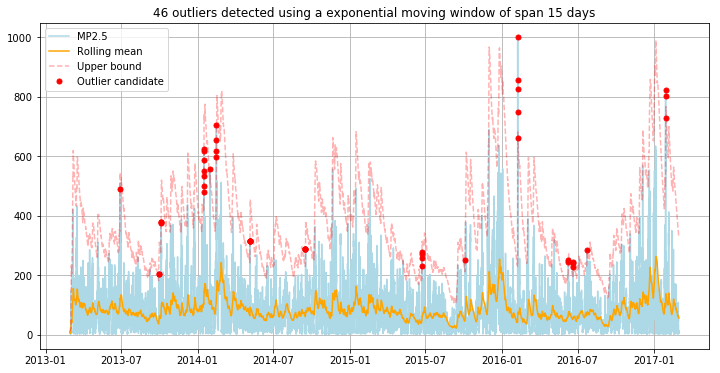

In [127]:
detect_outliers_expo(data['PM2.5'], span = 24*15, n_std = 4, adjust = True)

I will use a span of 15 days which corresponds to a smoothing factor alpha of α = 0.125. I also use adjust = False so that the beginning periods are not treated differetnly (additional decaying adjustment for relative weightings imbalamce). This is simply based on the observation that when I set adjust = True I mark more outliers in the beginning of the timeseries.

the use of standard deviation of 4 is because I want to mark the very extreme outliers as my data distribute many peaks. The outliers will be bounded with the upper boundary determined by the exponential moving average of 15 days span.

In [128]:
# remove outliers using the rolling mean
expo_mean = pm2p5.ewm(span = 24*15, adjust = True).mean()
expo_std = pm2p5.ewm(span = 24*15, adjust = True).std()
upper_bound = expo_mean + (4 * expo_std)
    
# identify outliers:
mask = (pm2p5 > upper_bound)
outliers = pm2p5[mask]

In [129]:
data['upper_bound'] = upper_bound

In [130]:
data['PM2.5_raw'] = data['PM2.5']

In [131]:
data.loc[data['PM2.5'] > data['upper_bound'], 'PM2.5'] = data['upper_bound']

probe checking the clipping of outliers

In [132]:
data['2013-06-28 17:00:00':'2013-06-28 18:00:00'].iloc[:,-6::]

station   PM10       PM2.5             Range  \
Date and Time                                                             
2013-06-28 17:00:00  Wanshouxigong  527.0  471.504234  2013-06-28 17:00   
2013-06-28 18:00:00  Wanshouxigong  481.0  482.000000  2013-06-28 18:00   

                     upper_bound  PM2.5_raw  
Date and Time                                
2013-06-28 17:00:00   471.504234      490.0  
2013-06-28 18:00:00   488.958331      482.0

at this point, data['PM2.5_raw'] has the initial 'PM2.5' data after pracessing them but without removing the outliers whereas the column data['PM2.5'] have the data after removing the outliers by bounding them (upper bound).

## Autocorrelation ACF and Partial correlation PACT - lag features

I will calculate the autocorelation and partial autocorrelation of the target variable upt o 50 lags-. the shaded area represetns the confidence interval 95%. what ever is outside the shaded area is significant important. If there is no such correlation(s) then no predictions can be made.

/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


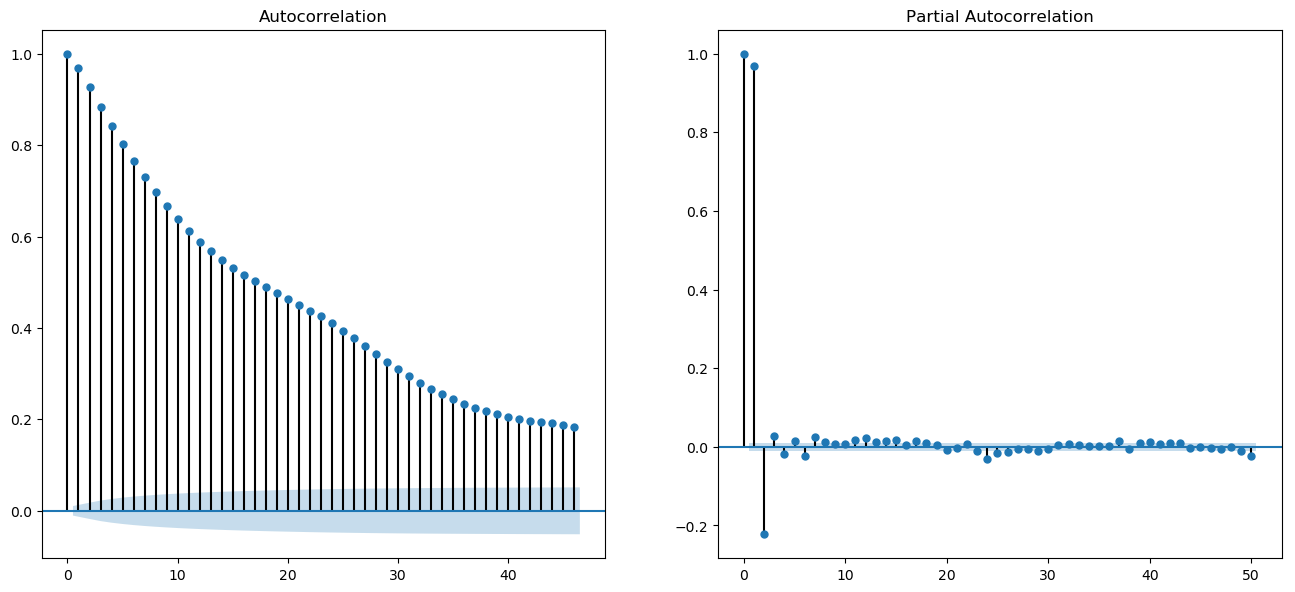

In [133]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
acf_50 = acf(data['PM2.5'], nlags=50)
pacf_50 = pacf(data['PM2.5'], nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,7), dpi= 100)
plot_acf(data['PM2.5'].values, ax=axes[0])
#sm.graphics.tsa.plot_acf(data['PM2.5'], lags=50, alpha=0.05, zero=False)
#sm.graphics.tsa.plot_acf(data['PM2.5'].values.squeeze(), lags=40)
plot_pacf(data['PM2.5'], lags=50, ax=axes[1])
plt.show()

We have seen before that the target variable is autocorrelated. 

I clearly observe that the target is  strongly autocorrelated with all the previous 50 lags. The more we go into the past the more this correlation weakens. the question now is how many lag features do I need to add? To answer this question, I will explore the lag features in more depth in order to see until how many lags the linear correlation is retained.

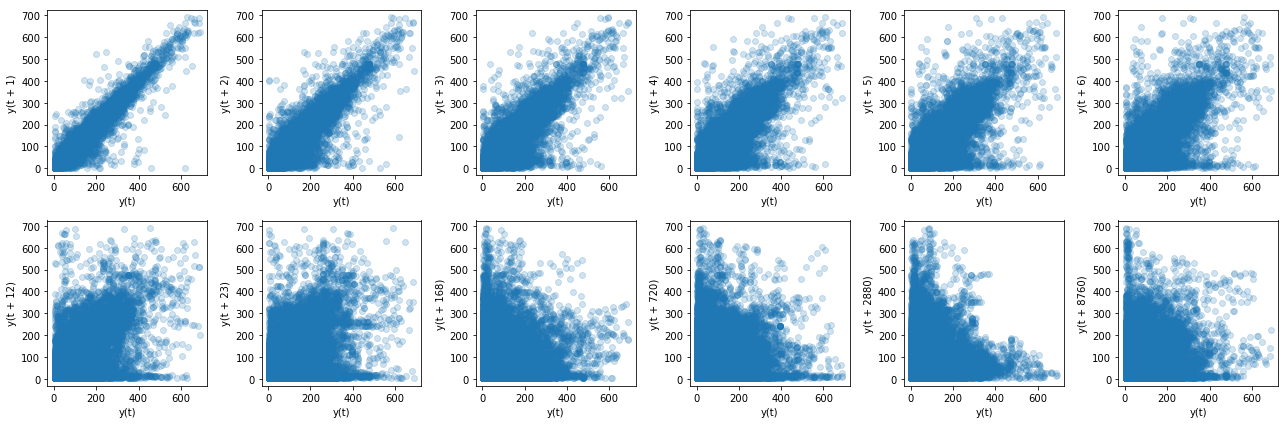

In [134]:
# Lag plot of "PM2.5"

fig, axes = plt.subplots(2,6,figsize=(18,6))
lags = [1, 2, 3, 4, 5, 6, 12, 23, 24*7, 24*30, 24*30*4, 24*365]
for lag,ax in zip(lags,axes.ravel()):
    pd.plotting.lag_plot(data['PM2.5'], lag=lag, ax=ax, alpha=0.2)

plt.tight_layout();

the values of PM2.5 are autocorelated with the values of the previous hour. The more we move further to the past hours the correlation weakens. That means that the PM2.5 concentration is not changeing fast. I makes sense to use the previous 8 hourly value to my features (lag 1, lag 2 until lag 8).

## _numerical feature distributions_

For the histograms I include only the continuous features

In [135]:
continuous_features = ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM',
       'PM10', 'PM2.5']

I check whether I can transform the skewed distributions to normal ones by taking the log

In [136]:
data_numeric.columns

Index(['CO', 'O3', 'NO2', 'SO2', 'PM2.5', 'PM10', 'TEMP', 'RAIN', 'DEWP'], dtype='object')

In the following graphs the histograms are normalized so the values do not match the initial values but we can observe the shape of the distributions.

In addition to the previous plots I will plot the kernel density estimation (with normalized histograms, suitably smoothed) for all the numerical features. The bandwidth (window width) of the kernel changes its shape.

In [137]:
f = pd.melt(data, value_vars = data_numeric)

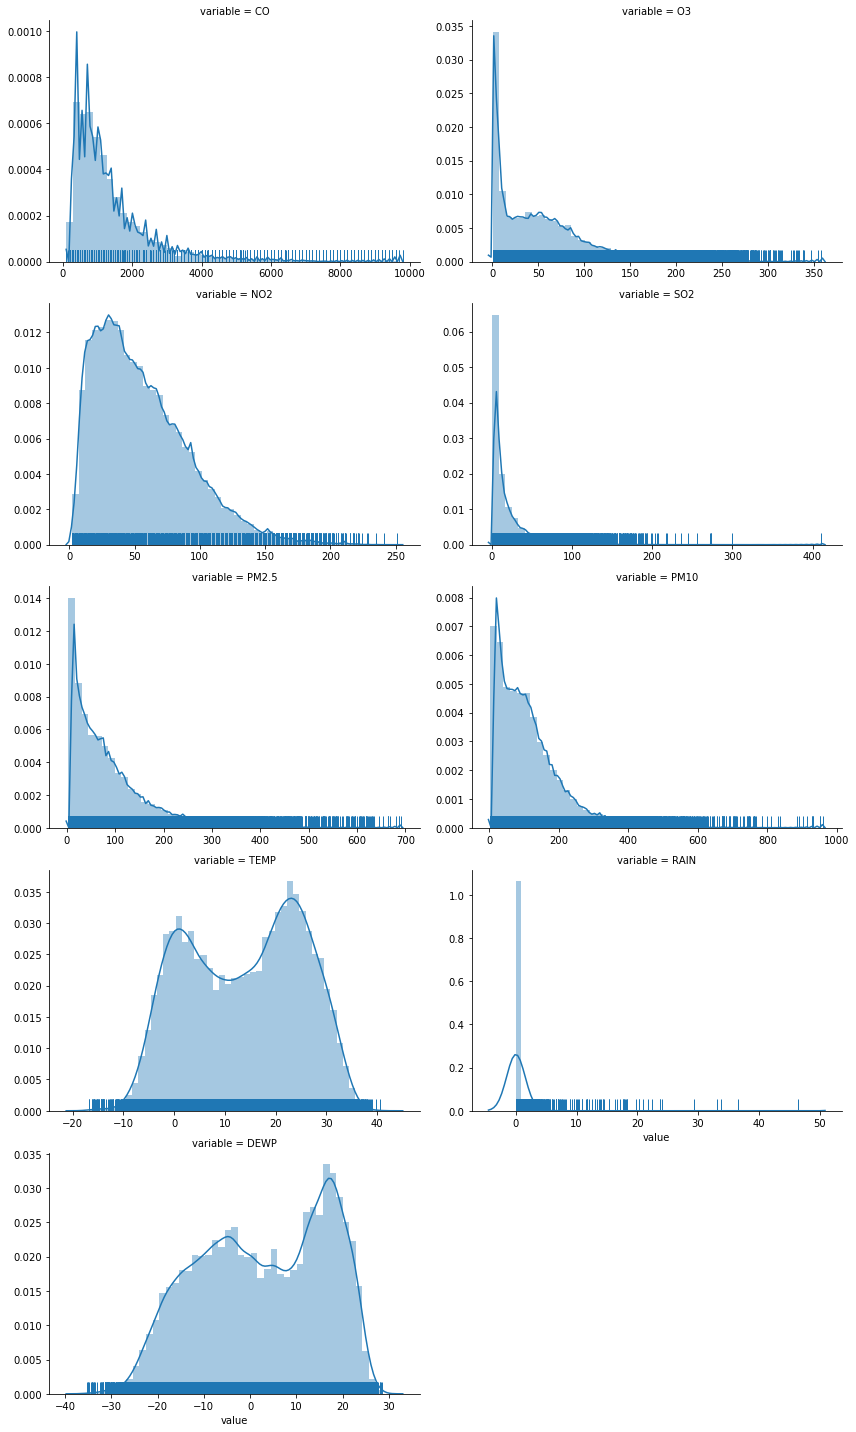

In [138]:
g = sns.FacetGrid(f, col = 'variable', col_wrap = 2, sharex = False, sharey = False, height = 4, aspect = 1.5)
g = g.map(sns.distplot, 'value', hist = True, kde_kws={'bw': 1.5}, rug = True)

Reference: https://towardsdatascience.com/creating-python-functions-for-exploratory-data-analysis-and-data-cleaning-2c462961bd71

From the density functions and the normallized histograms of the above plots I observe that none of the distributions are normal or could be considered normal.


Given that ML algorithms are performing better when the features and target variable are normally distributed, I will investigate possible common data transformations that may result to distributions (after the transformation) close to normal. Within this context, the log1p, boxcox, jeojohnson and quantile transformations are investigated. For the bimodal distributions of TEMP and DPEW the abs-mean transformation is used instead of the log1p due to the negative and zero values. When the boxcox tranformation was not possible (stricht positive values are needed) a respective shift was done in order to fullfil the requirement of strictly positive values.

In [139]:
continuous_features[:-2]

['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']

In [140]:
continuous_features

['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'PM10', 'PM2.5']

In [141]:
rest_features = ['DEWP', 'WSPM', 'TEMP']

In [142]:
bimodal = ['DEWP', 'TEMP']

In [143]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(random_state=0,  output_distribution='normal', n_quantiles=1000)

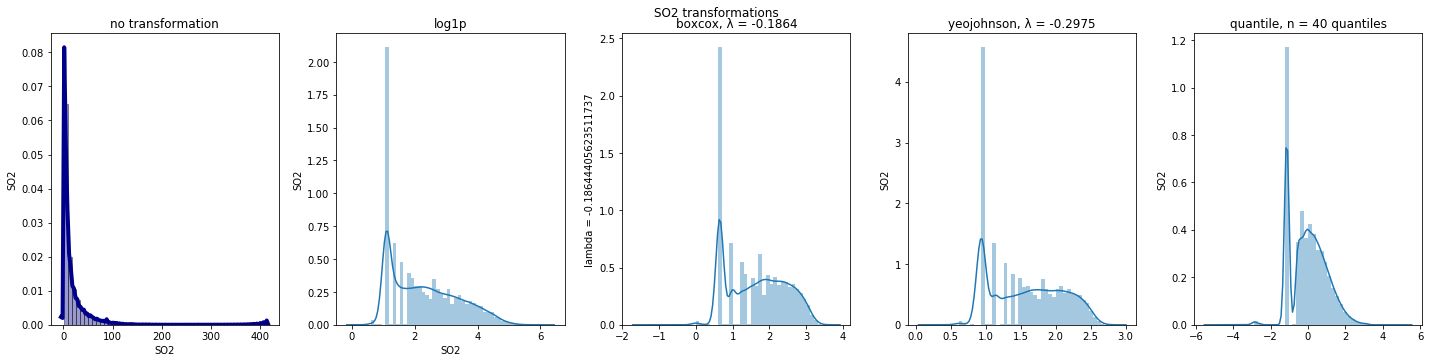

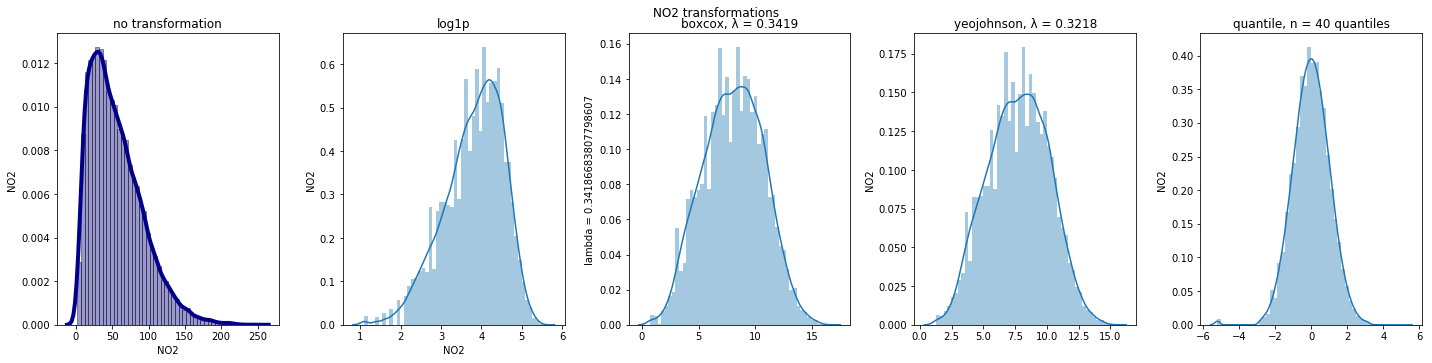

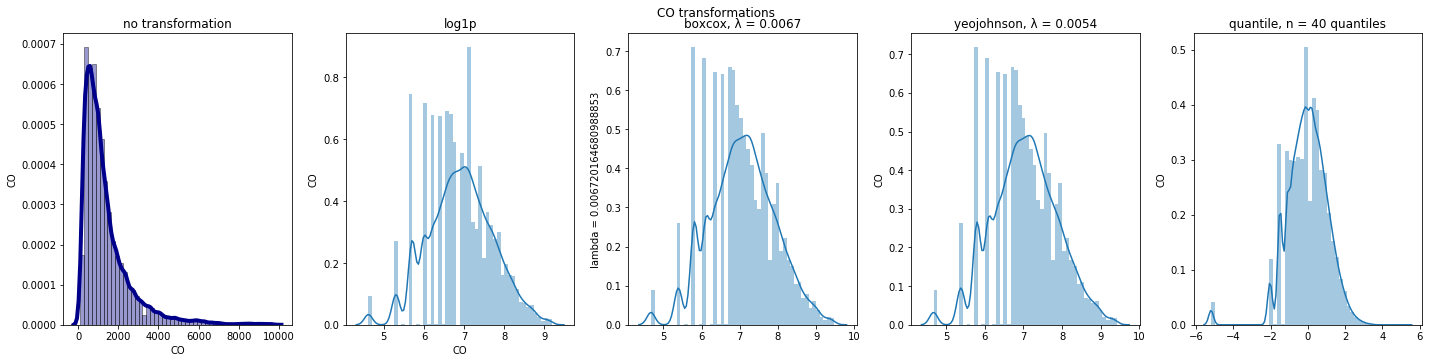

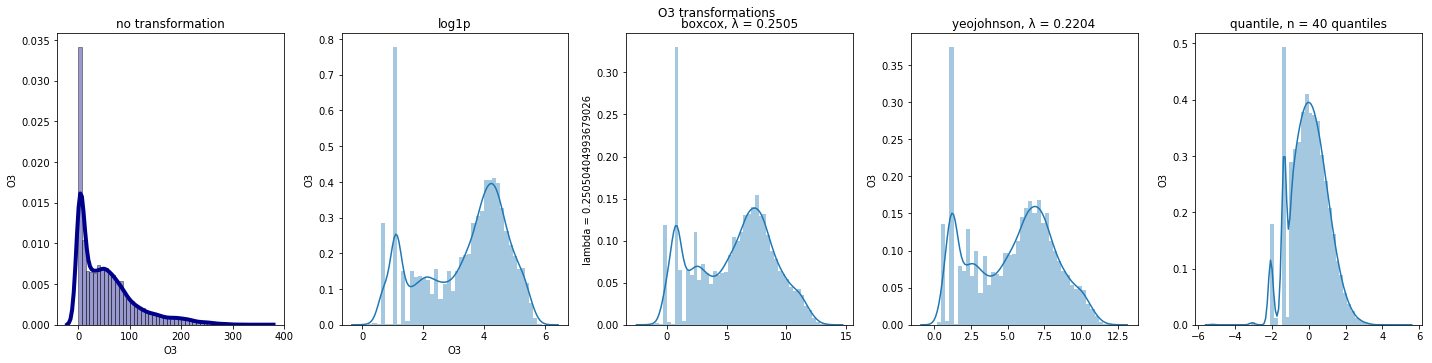

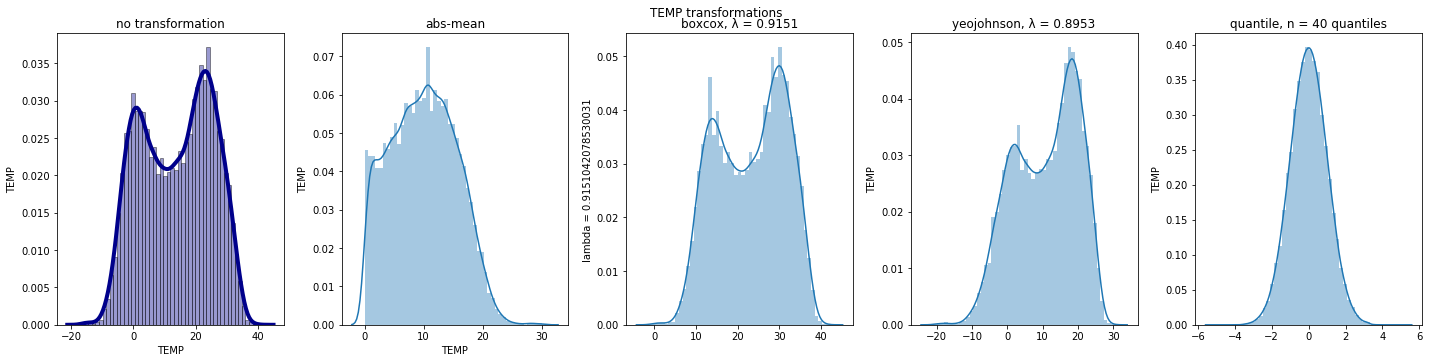

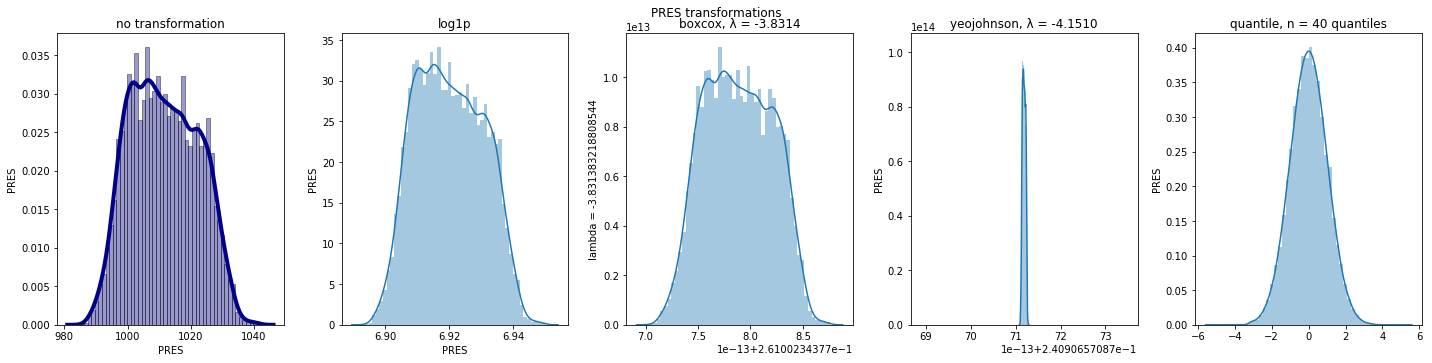

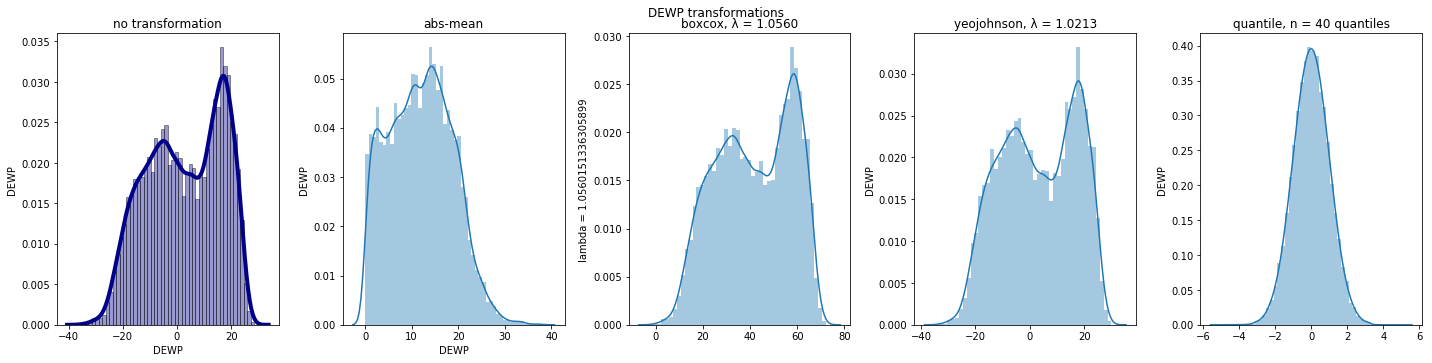

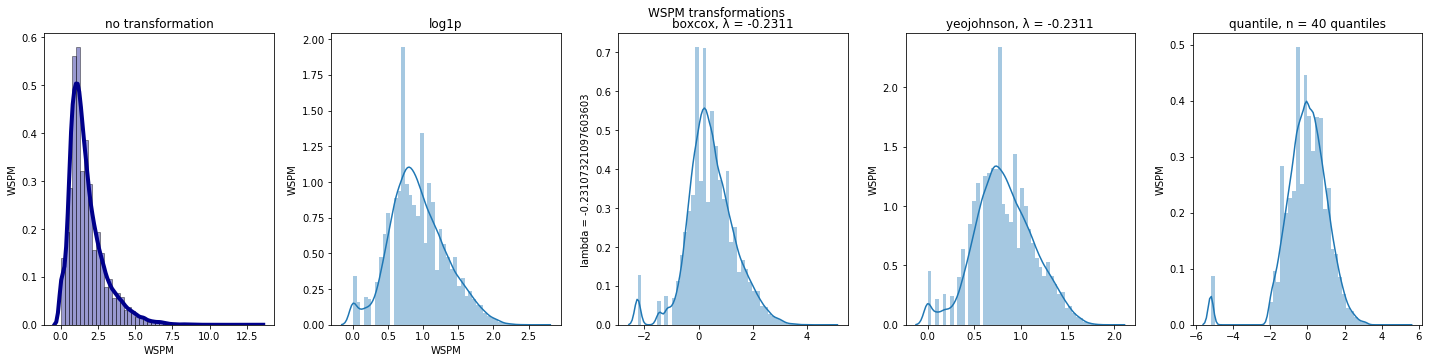

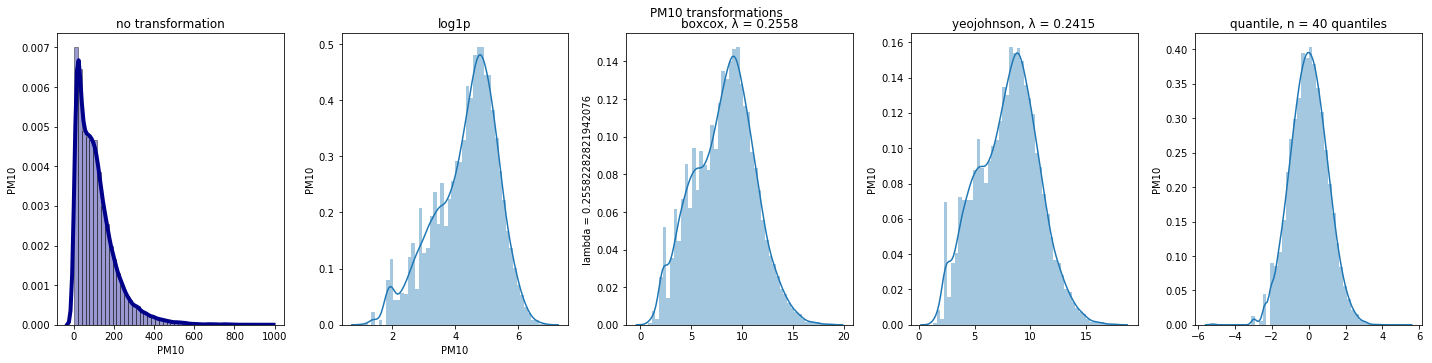

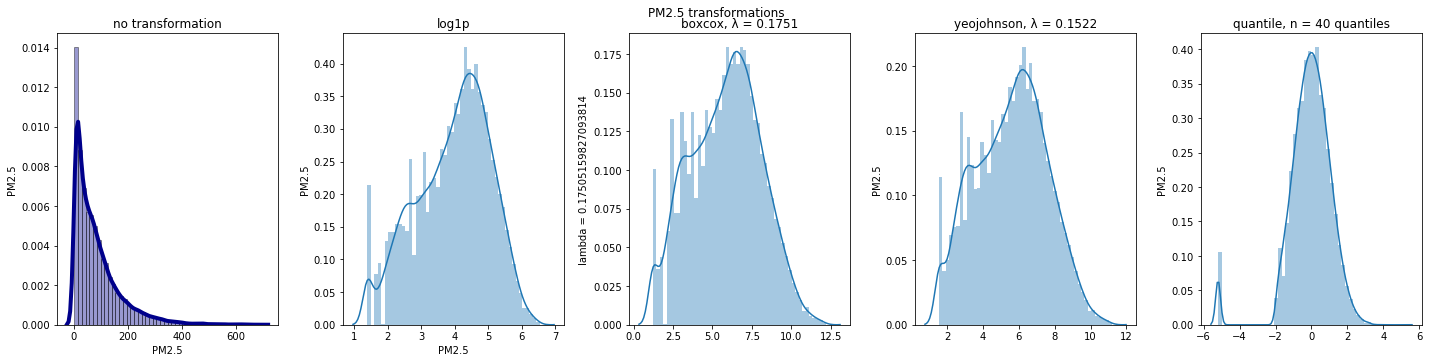

In [144]:
data_bc = data.copy()
# for feature, ax in zip(continuous_features[:-2], axes.ravel()):
# fig, ax = plt.subplots(1,2,figsize=(14, 5),gridspec_kw={'width_ratios': [3, 1]})
# for feature in continuous_features_wo_temp_dewp_wspm:
for feature in continuous_features:

        
    fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20, 5))
    #fig.tight_layout(rect=[0, 0.03, 0.95, 0.93])
    fig.subplots_adjust(top=0.9)
    fig.suptitle("{} transformations".format(feature), y=1)
    sns.distplot(data[feature], hist=True, kde=True, 
             bins=int(50), color = 'darkblue', ax = ax[0],
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax[0].set_title('no transformation')
    ax[0].set_ylabel(feature)
    
    if feature in bimodal:
        sns.distplot(np.abs(data[feature]- np.mean(data[feature])), ax = ax[1])
        ax[1].set_title('abs-mean')
    else:
        sns.distplot(np.log1p(data[feature]), ax = ax[1])
        ax[1].set_title('log1p')
    ax[1].set_ylabel(feature)
    
    if feature in rest_features:
        sns.distplot(stats.boxcox(data[feature]+abs(data[feature].min()) + 0.00001)[0], ax = ax[2])
        ax[2].set_title('boxcox, λ = {:.4f}'.format(stats.boxcox(data[feature]+abs(data[feature].min()) + 1)[1]))
        ax[2].set_ylabel('lambda = {}'.format(stats.boxcox(data[feature]+abs(data[feature].min()) + 1)[1]))
    else:
        sns.distplot(stats.boxcox(data[feature])[0], ax = ax[2])
        ax[2].set_title('boxcox, λ = {:.4f}'.format(stats.boxcox(data[feature])[1]))
        ax[2].set_ylabel('lambda = {}'.format(stats.boxcox(data[feature])[1]))
    
    sns.distplot(stats.yeojohnson(data[feature])[0], ax = ax[3])
    ax[3].set_title('yeojohnson, λ = {:.4f}'.format(stats.yeojohnson(data[feature])[1]))
    ax[3].set_ylabel(feature)
    
    q = pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0])
    sns.distplot(q, ax = ax[4])
    ax[4].set_title('quantile, n = 40 quantiles')
    ax[4].set_ylabel(feature)

    plt.tight_layout()
    plt.show()


From the visualisation it is not always clear whether the log1p or the quantile transformation better approaches the normal distribution. Therefore I will use the QQ plots to examine how close to the normal distribution each transformation results.

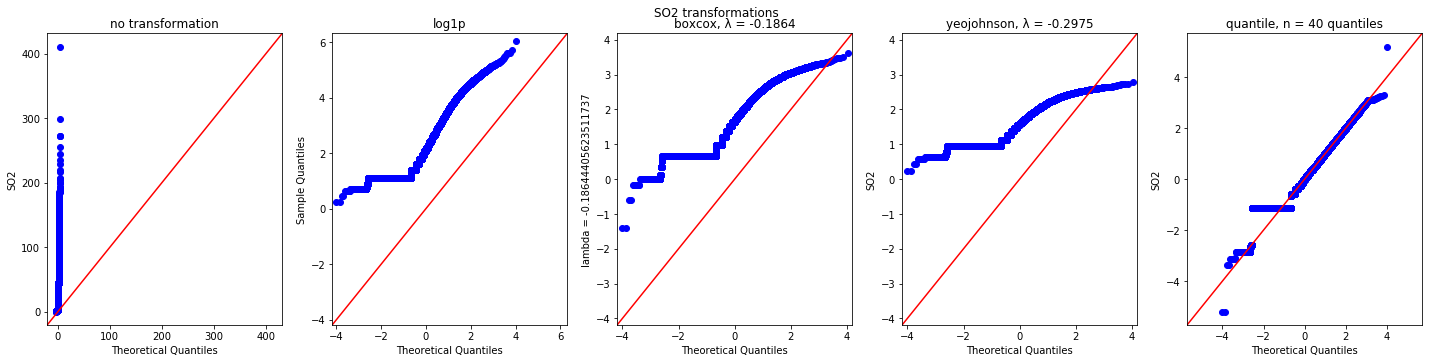

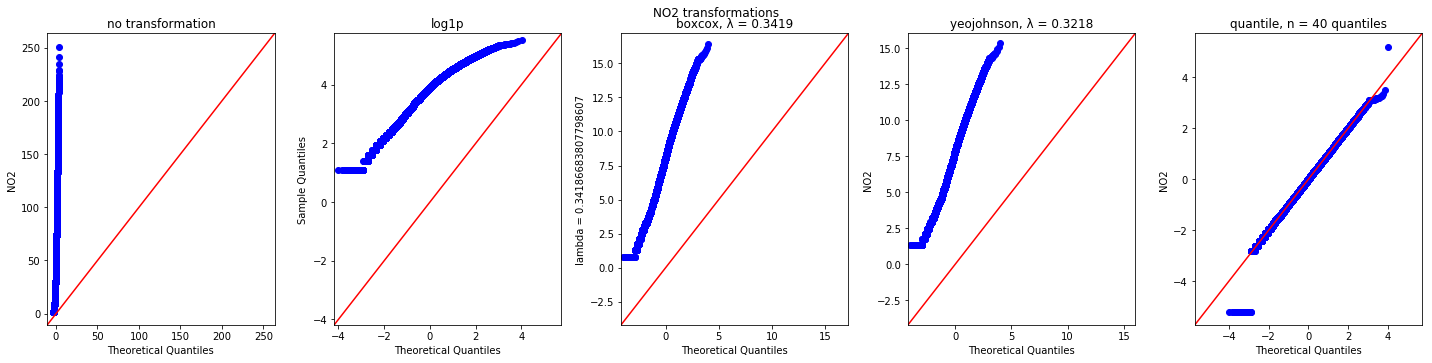

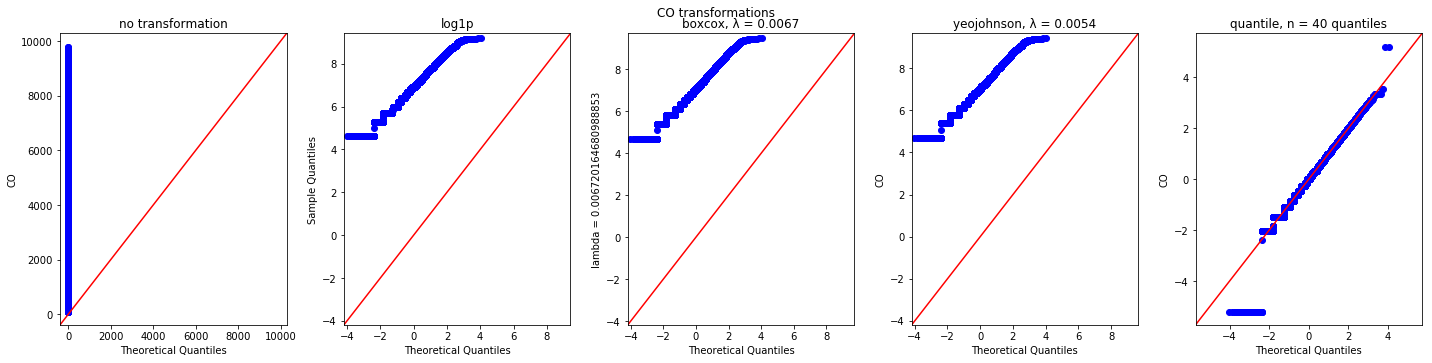

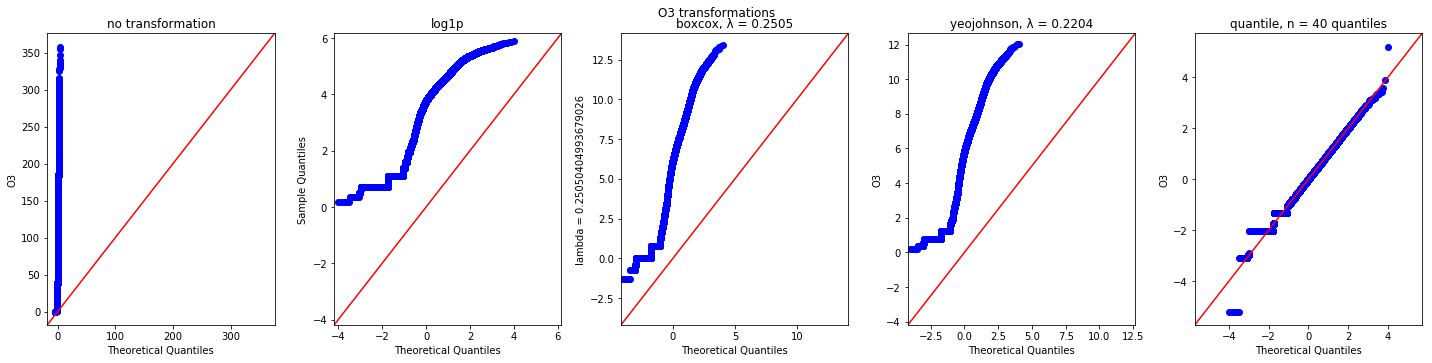

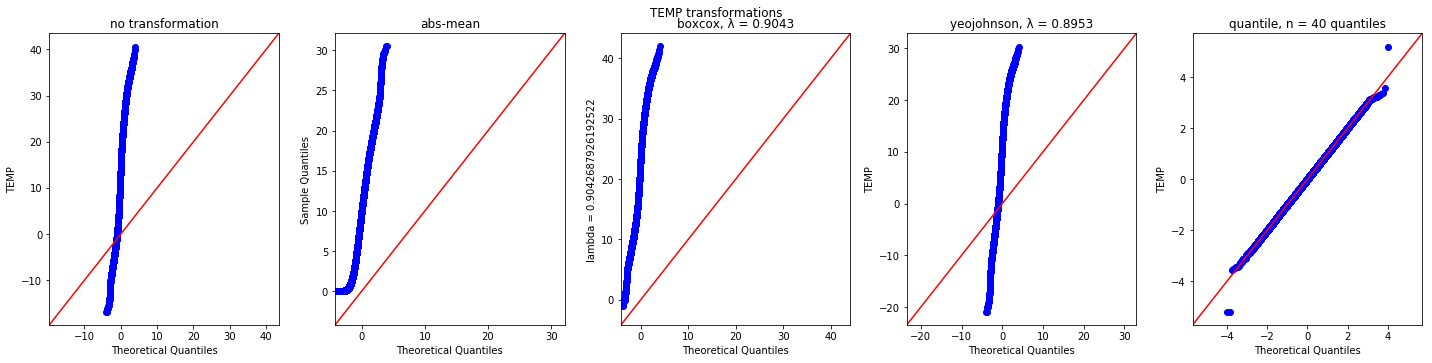

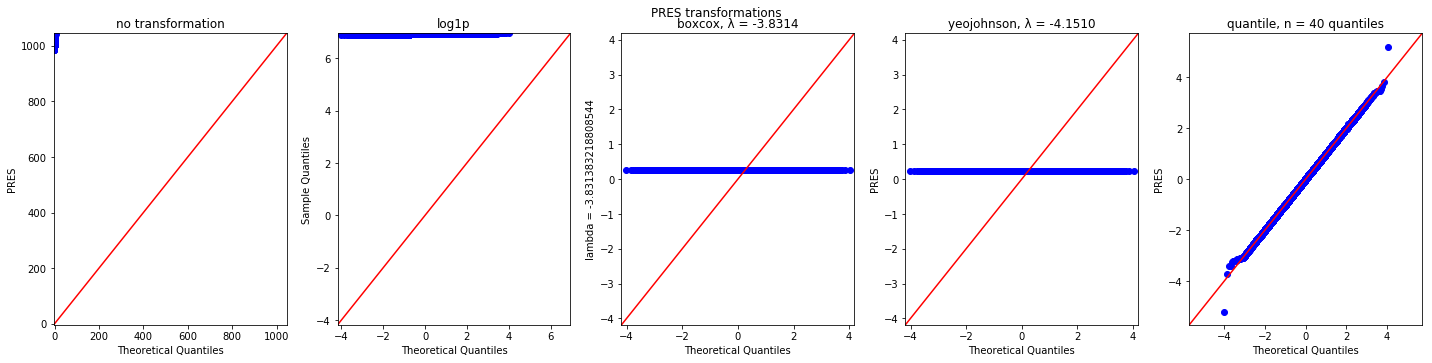

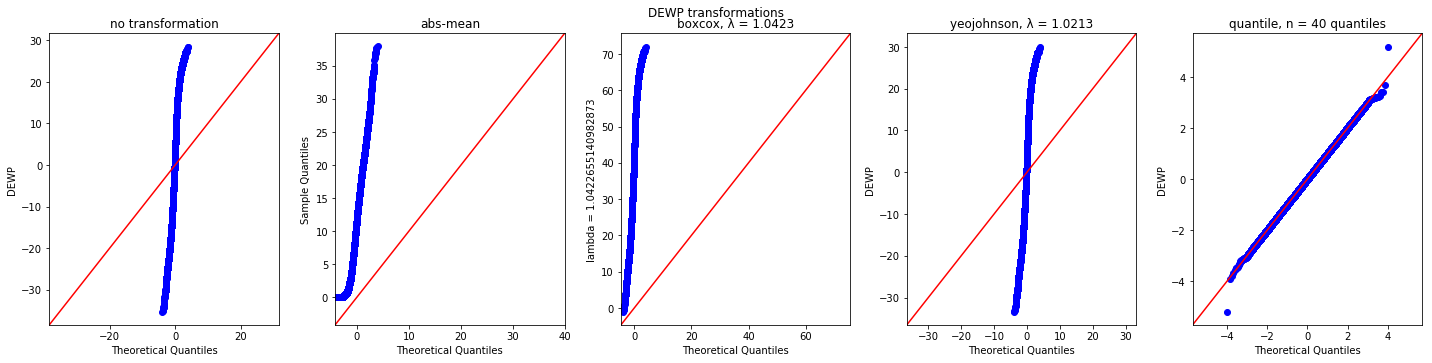

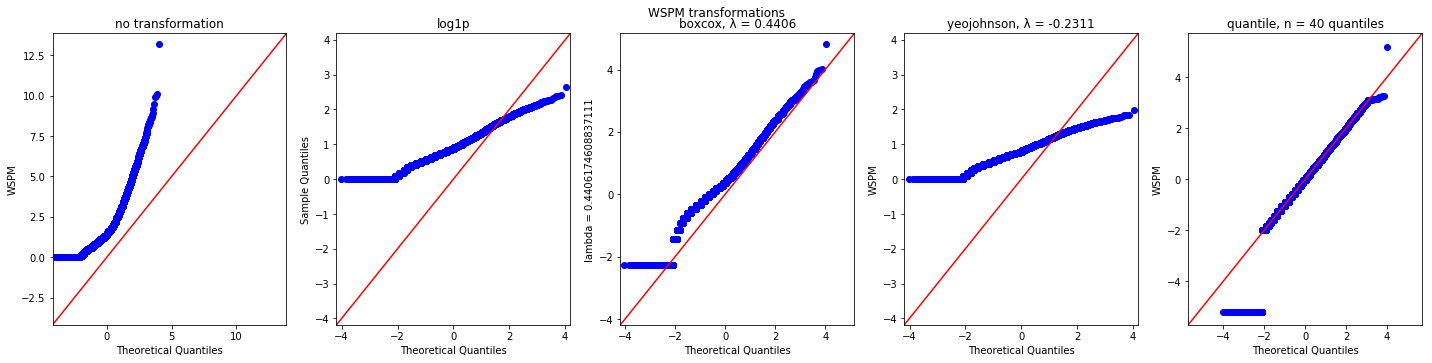

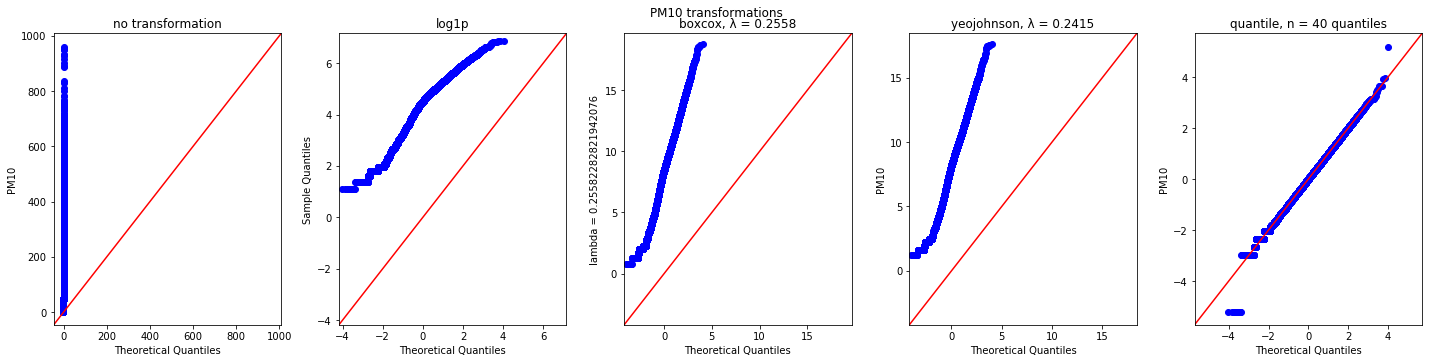

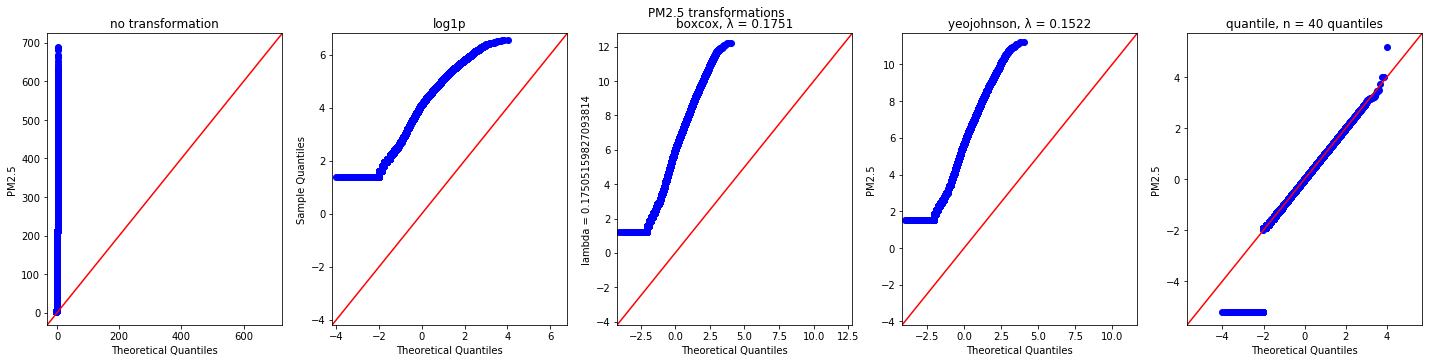

In [145]:
for feature in continuous_features:
    fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20, 5))
    #fig.tight_layout(rect=[0, 0.03, 0.95, 0.93])
    fig.subplots_adjust(top=0.9)
    #axes = axes.ravel()
    #data[feature].plot( kind = 'density', ax = ax)
    #data[feature].hist(bins = 50, ax = ax)
    #plt.suptitle('Data Transformations for {}'.format(feature))
    fig.suptitle("{} transformations".format(feature), y=1)
    #stats.probplot(data[feature], dist="norm", plot=pylab)
    sm.qqplot(data[feature], line = '45', ax = ax[0])
    ax[0].set_title('no transformation')
    ax[0].set_ylabel(feature)
    
    if feature in bimodal:
        sm.qqplot(np.abs(data[feature]- np.mean(data[feature])),line = '45', ax = ax[1])
        ax[1].set_title('abs-mean')
    else:
        sm.qqplot(np.log1p(data[feature]), line = '45', ax = ax[1])
        ax[1].set_title('log1p')

#    sm.qqplot(np.log1p(data[feature]), line = '45', ax = ax[1])
#    ax[1].set_title('log1p')
#    ax[1].set_ylabel(feature)

    if feature in rest_features:
        bc = stats.boxcox(data[feature] + abs(data[feature].min()) + 0.00001)[0]
        sm.qqplot(bc, line = '45', ax = ax[2])
        ax[2].set_title('boxcox, λ = {:.4f}'.format(stats.boxcox(data[feature] + abs(data[feature].min()) + 0.00001)[1]))
        ax[2].set_ylabel('lambda = {}'.format(stats.boxcox(data[feature] + abs(data[feature].min()) + 0.00001)[1]))
    else:
        bc = stats.boxcox(data[feature])[0]
        sm.qqplot(bc, line = '45', ax = ax[2])
        ax[2].set_title('boxcox, λ = {:.4f}'.format(stats.boxcox(data[feature])[1]))
        ax[2].set_ylabel('lambda = {}'.format(stats.boxcox(data[feature])[1]))
    
#    bc = stats.boxcox(data[feature])[0]
#    sm.qqplot(bc, line = '45', ax = ax[2])
#    ax[2].set_title('boxcox, λ = {:.4f}'.format(stats.boxcox(data[feature])[1]))
#    ax[2].set_ylabel('lambda = {}'.format(stats.boxcox(data[feature])[1]))
    
    yj = stats.yeojohnson(data[feature])[0]
    sm.qqplot(yj, line = '45', ax = ax[3])
    ax[3].set_title('yeojohnson, λ = {:.4f}'.format(stats.yeojohnson(data[feature])[1]))
    ax[3].set_ylabel(feature)
    
    q = pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0])
    sm.qqplot(q, line = '45', ax = ax[4])
    ax[4].set_title('quantile, n = 40 quantiles')
    ax[4].set_ylabel(feature)
    
    plt.tight_layout()
    plt.show()

We clearly observe from the QQ-plots above that the Quantile transformation better aproaches the normal distribution. 
My decision is to apply the quantile transformation for the features: ['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'PM10'] as well as the target vector ['PM2.5']. This transformation will be part of the preprocessing in my ML pipelines.

In [146]:
numerical_features = [ 'Weekday', 'Season', 'Year', 'Month', 'Day', 'Hour',
       'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM',
        'PM10',  'it_rained']

In [147]:
data.columns

Index(['Weekday', 'Season', 'Year', 'Month', 'Day', 'Hour', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'PM10',
       'PM2.5', 'Range', 'upper_bound', 'PM2.5_raw'],
      dtype='object')

In [148]:
data.drop(columns = ['upper_bound', 'PM2.5_raw','Range', 'station'], axis = 1, inplace = True)

In [149]:
data.head()

Weekday  Season  Year  Month Day  Hour  SO2   NO2     CO  \
Date and Time                                                                  
2013-03-01 00:00:00  Friday  winter  2013      3   1     0  6.0  17.0  200.0   
2013-03-01 01:00:00  Friday  winter  2013      3   1     1  7.0  14.0  200.0   
2013-03-01 02:00:00  Friday  winter  2013      3   1     2  5.0  16.0  200.0   
2013-03-01 03:00:00  Friday  winter  2013      3   1     3  3.0  16.0  250.0   
2013-03-01 04:00:00  Friday  winter  2013      3   1     4  3.0  12.0  300.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  PM10  PM2.5  
Date and Time                                                                
2013-03-01 00:00:00  62.0   0.3  1021.9 -19.0   0.0  WNW   2.0   9.0    9.0  
2013-03-01 01:00:00  66.0  -0.1  1022.4 -19.3   0.0  WNW   4.4  11.0   11.0  
2013-03-01 02:00:00  59.0  -0.6  1022.6 -19.7   0.0  WNW   4.7   8.0    8.0  
2013-03-01 03:00:00  47.5  -0.7  1023.5 -20.9   0.0   NW   2.6   8.0    8.0  
2013-03-01 04:00:00  36.0  -0.9  1024.1 -21.7   0.0  WNW   2.5   8.0    8.0

Quantile transformation is a non-linear and non-parametric transformation. It does not use the mean or max values but the quantiles for the calculations. Therefore it tends to reduce the impact of (marginal) ourliers (robustness against outliers)
As shown in the above listed QQ-plots the Quantile transformation is shown to be a promising candidate for almost all the continuous numerical features as well as the target vector.
since  the quantile transformation is a non-linear one, it can distort the distances within and across the features. To investigate this effect, I will juxtapose plots with and without the quantile transformation to explore the affect.

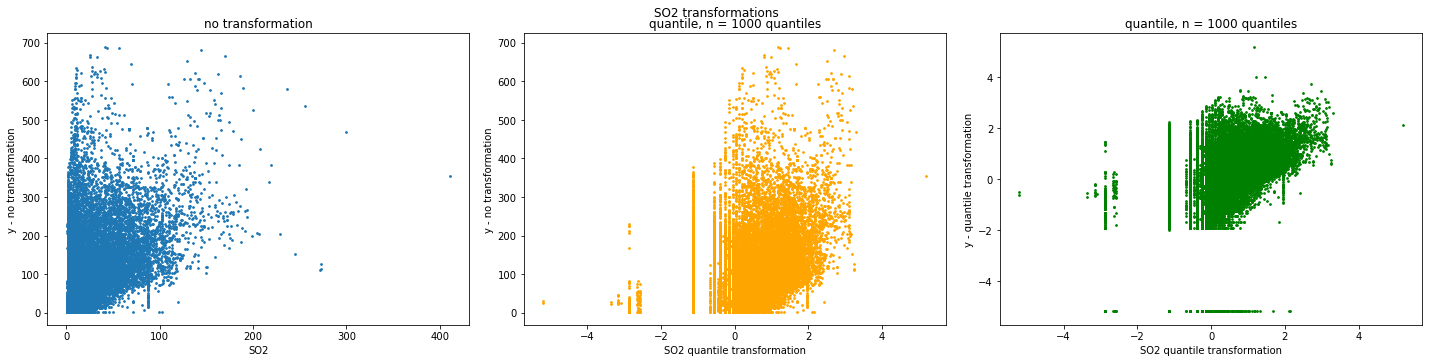

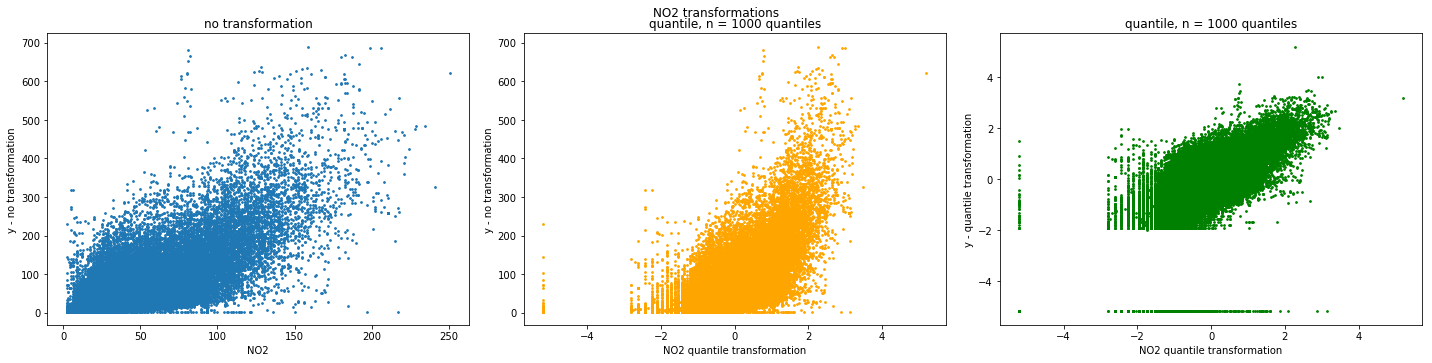

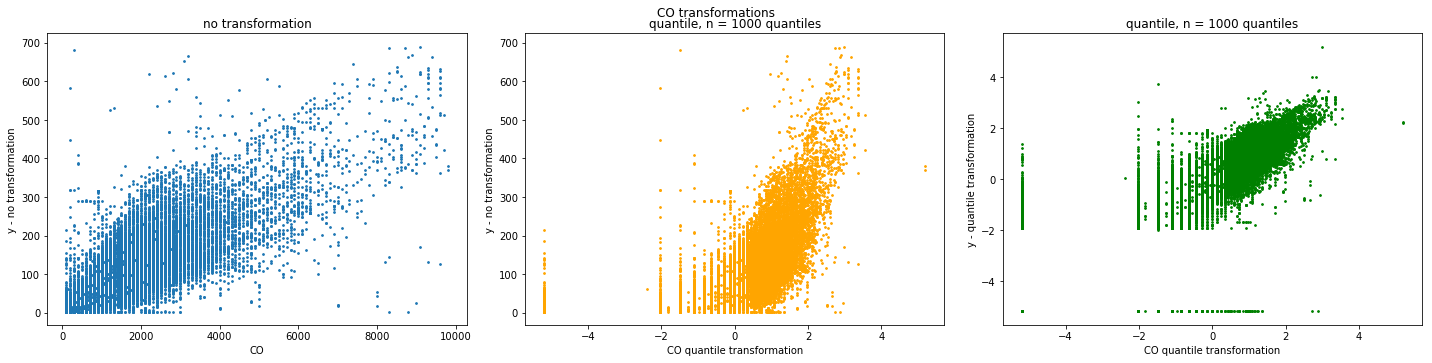

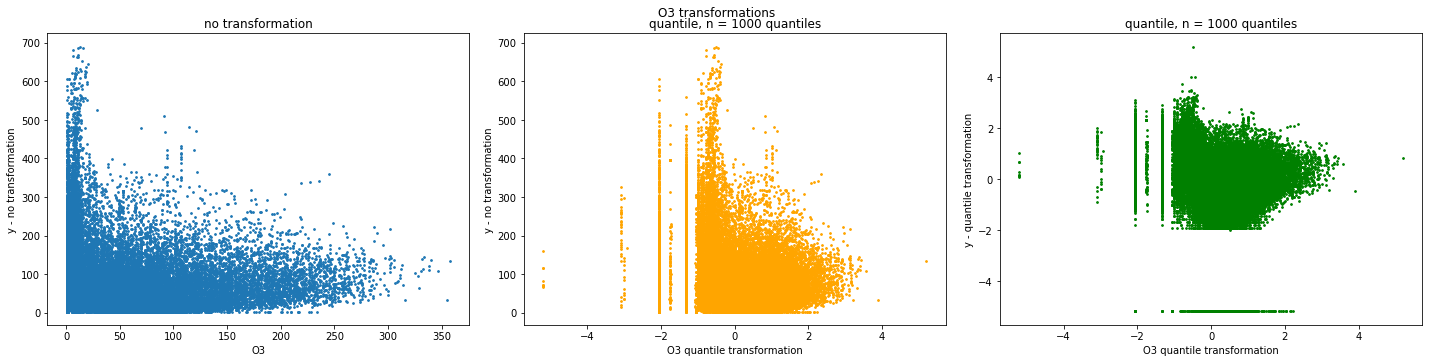

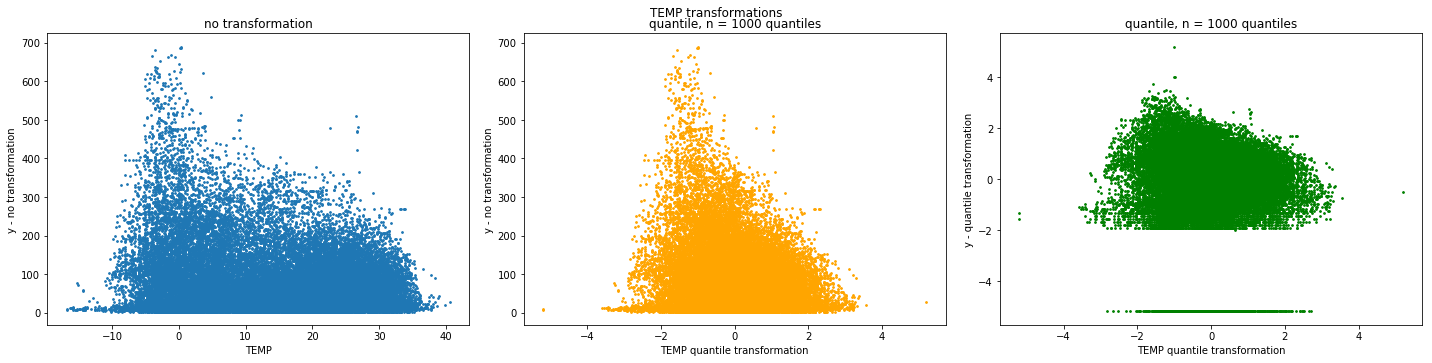

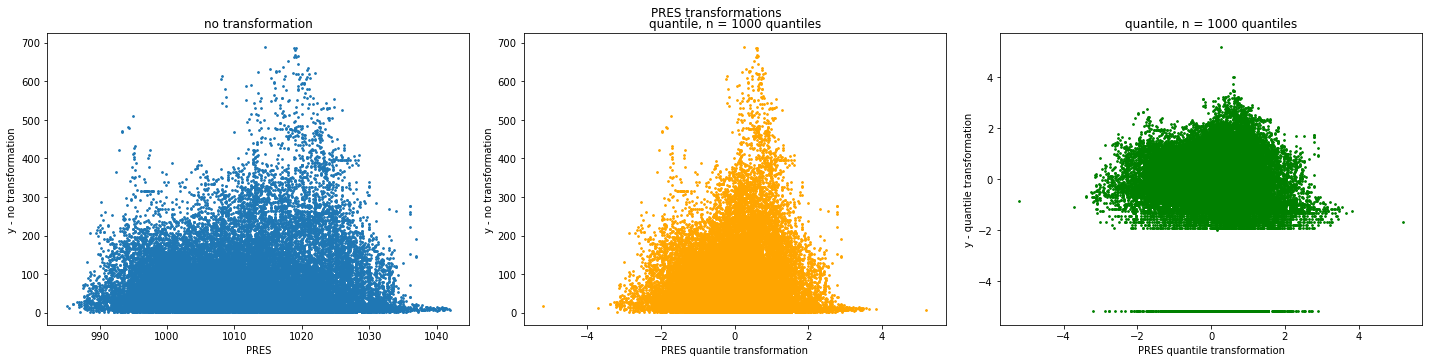

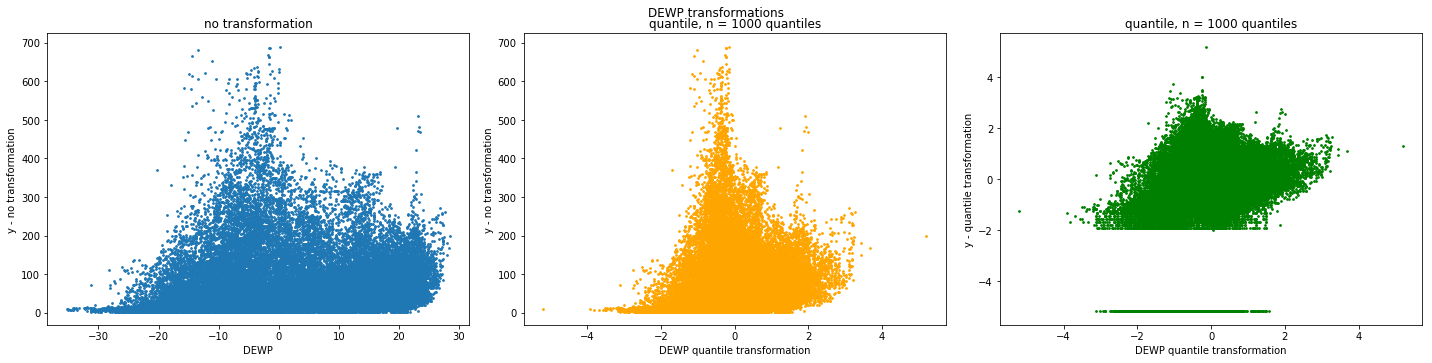

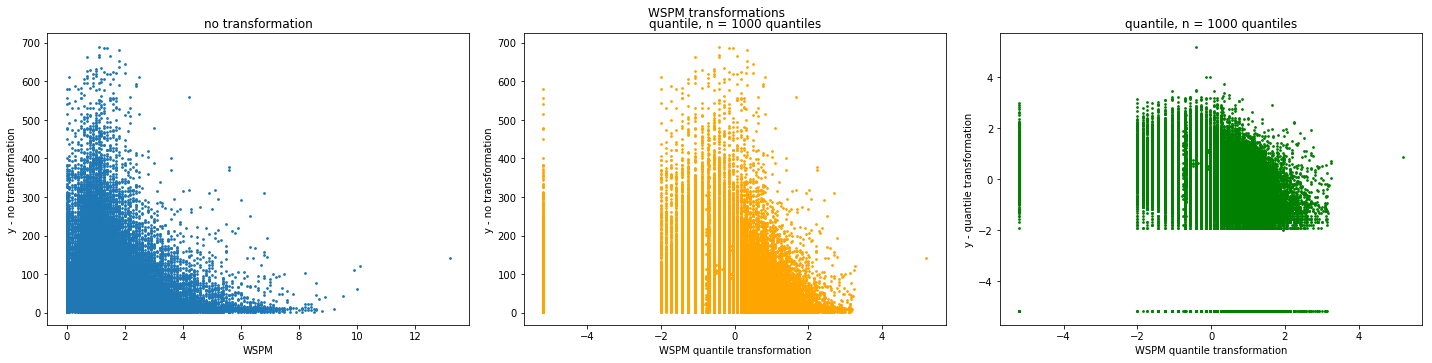

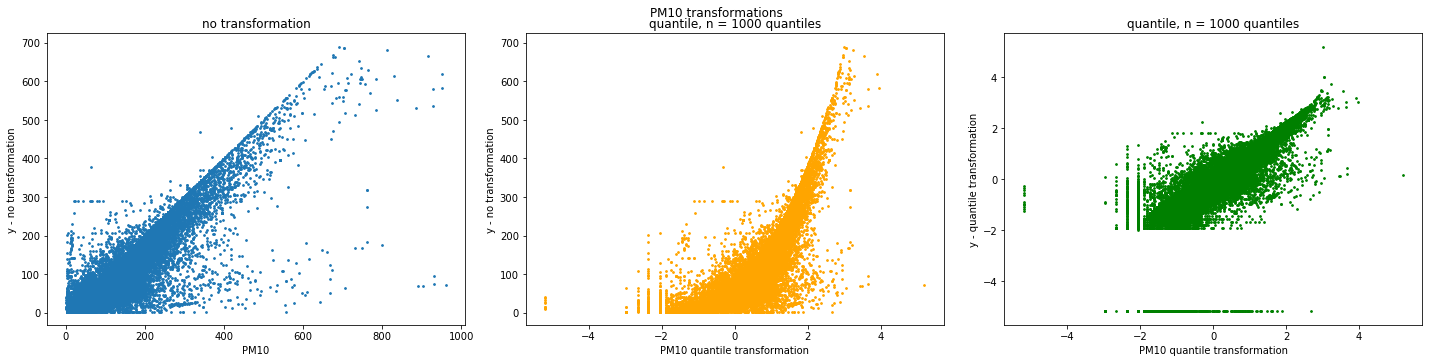

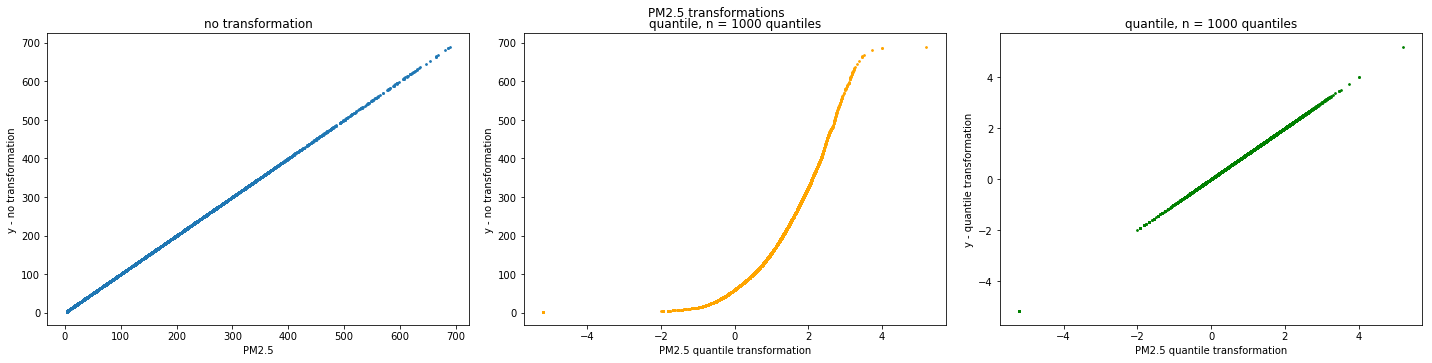

In [150]:
# Quantile transformations
qx = pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0])
qy = pd.Series(qt.fit_transform(np.array(data['PM2.5']).reshape(-1, 1))[:,0])

for feature in continuous_features:
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
    #fig.tight_layout(rect=[0, 0.03, 0.95, 0.93])
    fig.subplots_adjust(top=0.9)
    fig.suptitle("{} transformations".format(feature), y=1)
    ax[0].scatter(data[feature], data['PM2.5'], s = 3)
    ax[0].set_title('no transformation')
    ax[0].set_ylabel('y - no transformation')
    ax[0].set_xlabel(feature)
    
    qx = pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0])
    qy = pd.Series(qt.fit_transform(np.array(data['PM2.5']).reshape(-1, 1))[:,0])
    ax[1].scatter(qx, data['PM2.5'], s = 3, color = 'orange')
    ax[1].set_title('quantile, n = 1000 quantiles')
    ax[1].set_ylabel('y - no transformation')
    ax[1].set_xlabel('{} quantile transformation'.format(feature))
    
    ax[2].scatter(qx, qy, s = 3, color = 'green')
    ax[2].set_title('quantile, n = 1000 quantiles')
    ax[2].set_ylabel('y - quantile transformation')
    ax[2].set_xlabel('{} quantile transformation'.format(feature))
    
    plt.tight_layout()
    plt.show()

I observe that the distributions target variable - feature change but not significantly. From the above stated plots I will choose to apply the quantile transformation to the target vector 'PM2.5' as well as to the following features:
['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'PM10']

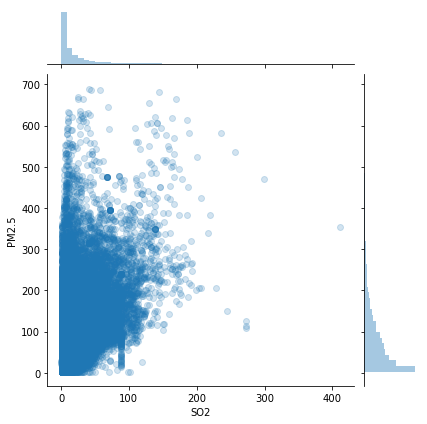

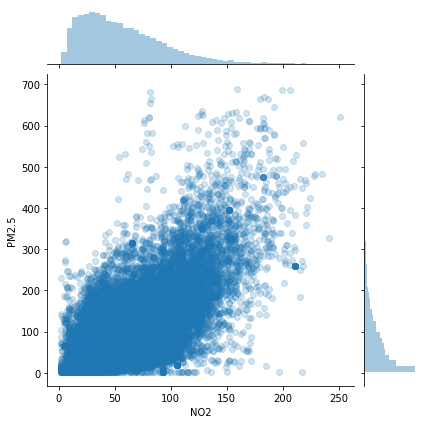

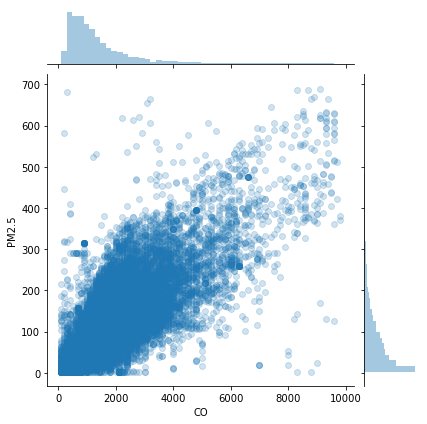

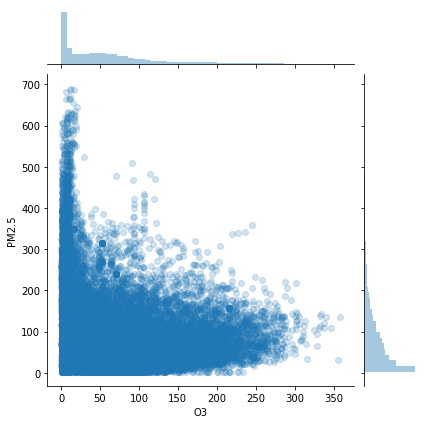

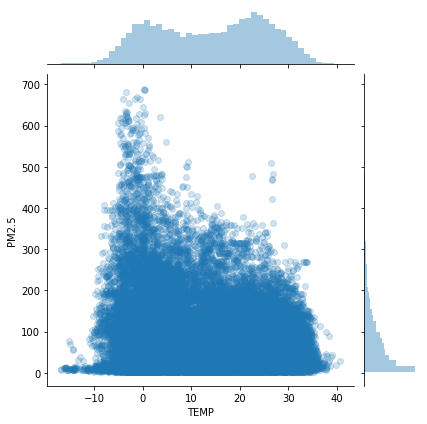

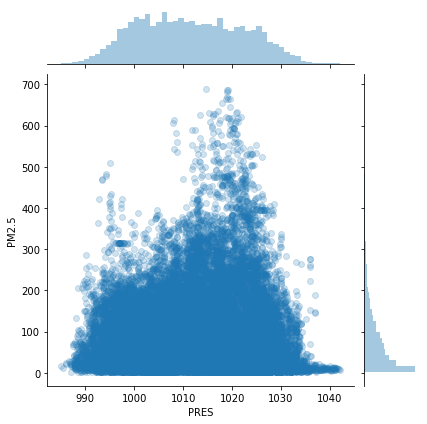

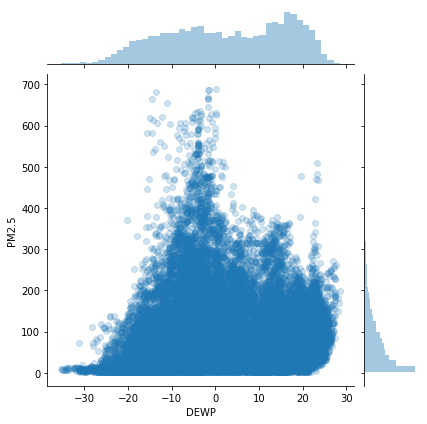

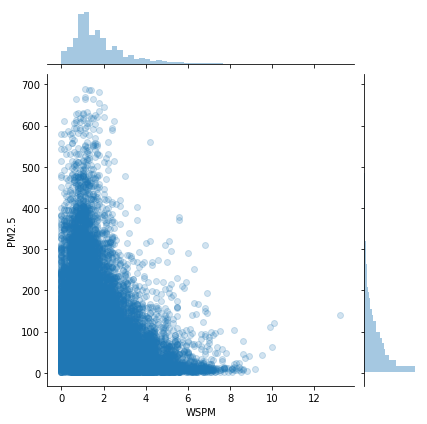

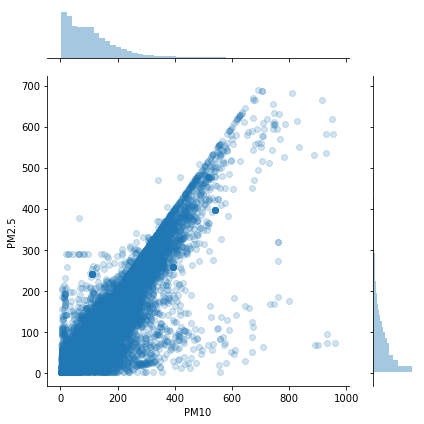

In [151]:
# fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (14, 45))
for (feature, ax) in zip(continuous_features[:-1], axes.ravel()[:10]):
    ax = sns.jointplot((data[feature]), (data['PM2.5']),kind="scatter", alpha = 0.2)
plt.tight_layout()
plt.show()

It looks like PM10, CO and NO2 have a close to linear correlation to PM2.5 which could is very promising.

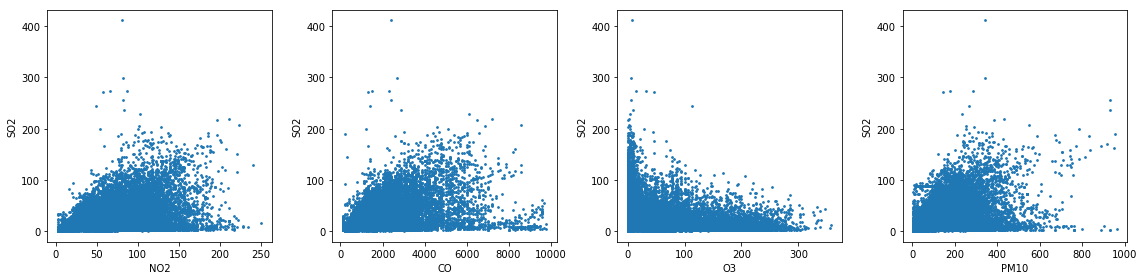

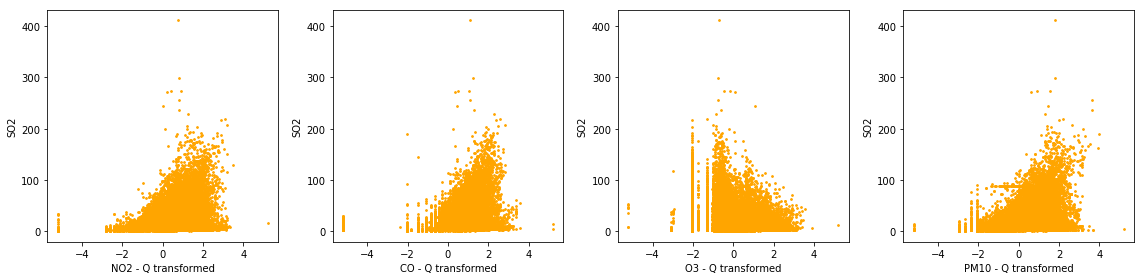

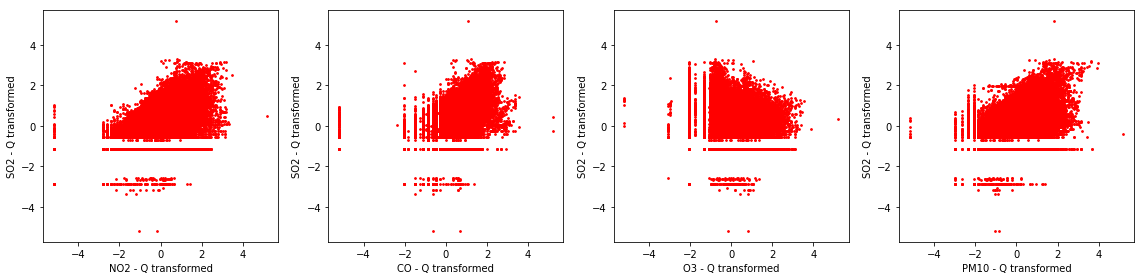

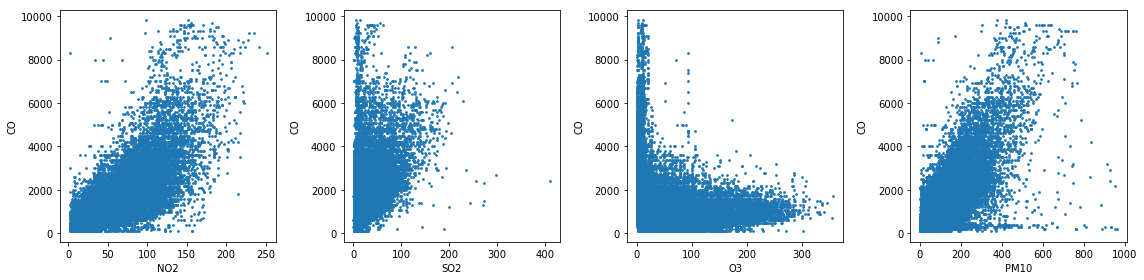

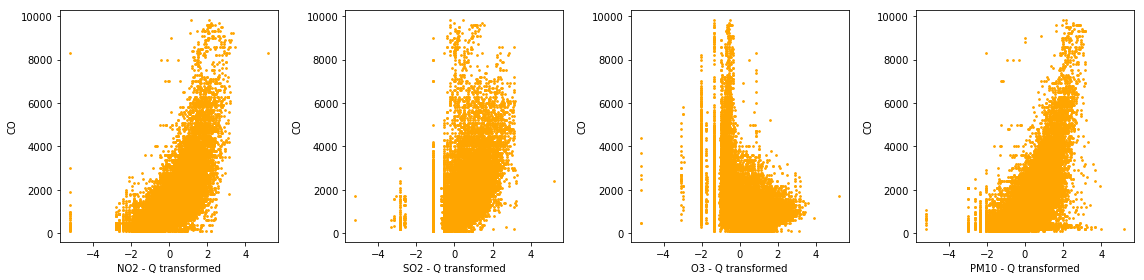

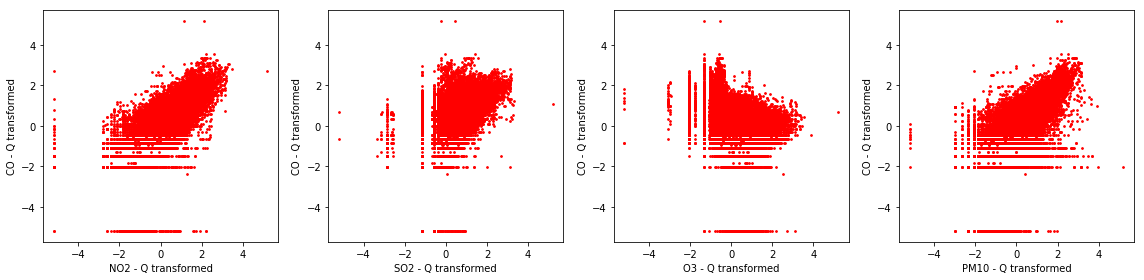

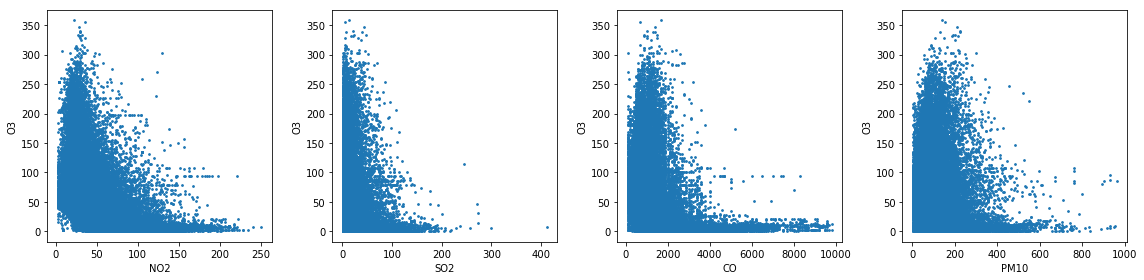

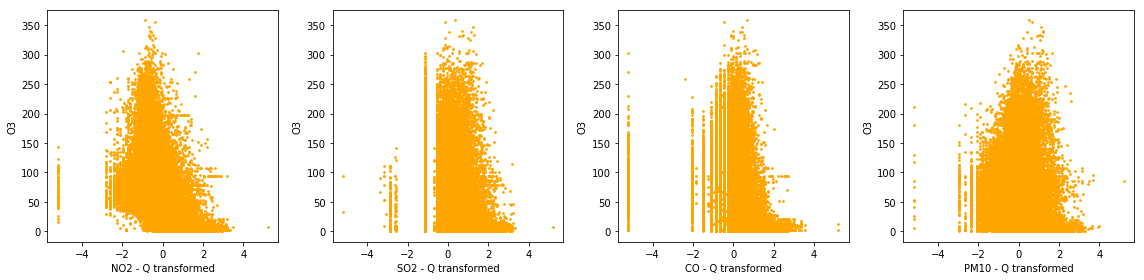

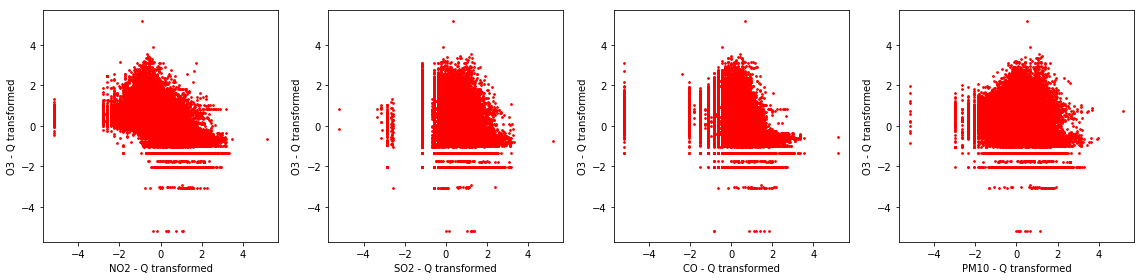

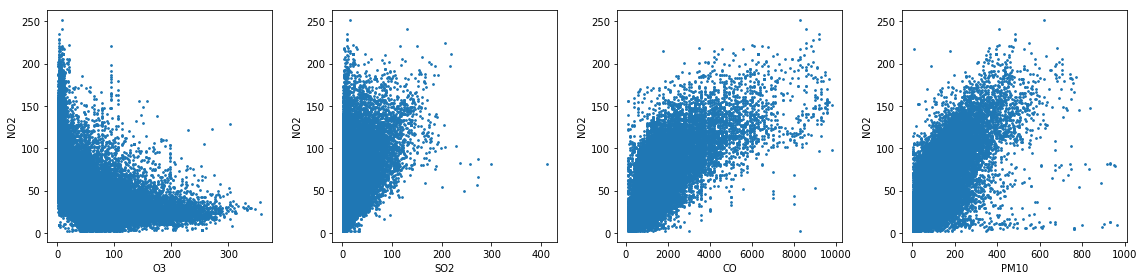

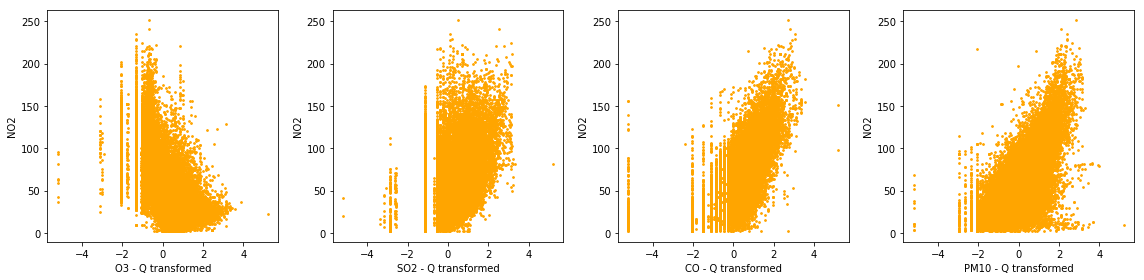

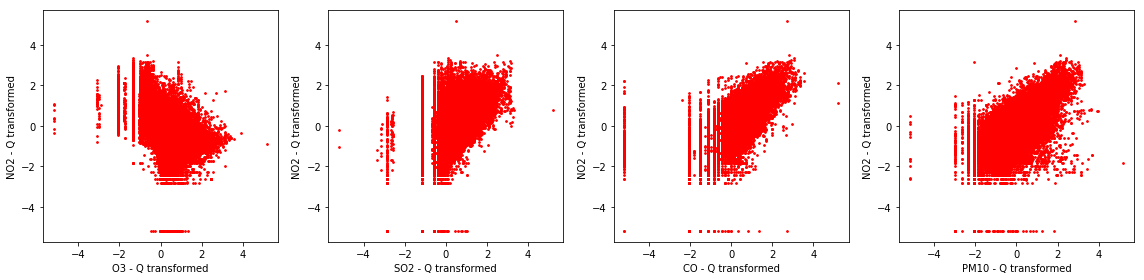

In [152]:
y_feature = 'SO2'
pollutants = ['NO2', 'CO', 'O3', 'PM10']
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):
    ax.scatter(data[feature], data[y_feature], s = 3)
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = y_feature)
    plt.tight_layout()
    
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):    
    ax.scatter(pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0]), data[y_feature], s = 3, color = 'orange')
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = '{} - Q transformed'.format(feature))
    ax.set(ylabel = y_feature)
    plt.tight_layout()
    
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):    
    qf = pd.Series(qt.fit_transform(np.array(data[y_feature]).reshape(-1, 1))[:,0])
    ax.scatter(pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0]), qf, s = 3, color = 'red')
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = '{} - Q transformed'.format(feature))
    ax.set(ylabel = '{} - Q transformed'.format(y_feature))
    plt.tight_layout()
    
y_feature = 'CO'
pollutants = ['NO2', 'SO2', 'O3', 'PM10']
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):
    ax.scatter(data[feature], data[y_feature], s = 3)
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = y_feature)
    plt.tight_layout()
    
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):    
    ax.scatter(pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0]), data[y_feature], s = 3, color = 'orange')
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = '{} - Q transformed'.format(feature))
    ax.set(ylabel = y_feature)
    plt.tight_layout()
    
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):    
    qf = pd.Series(qt.fit_transform(np.array(data[y_feature]).reshape(-1, 1))[:,0])
    ax.scatter(pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0]), qf, s = 3, color = 'red')
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = '{} - Q transformed'.format(feature))
    ax.set(ylabel = '{} - Q transformed'.format(y_feature))
    plt.tight_layout()

y_feature = 'O3'
pollutants = ['NO2', 'SO2', 'CO', 'PM10']
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):
    ax.scatter(data[feature], data[y_feature], s = 3)
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = y_feature)
    plt.tight_layout()
    
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):    
    ax.scatter(pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0]), data[y_feature], s = 3, color = 'orange')
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = '{} - Q transformed'.format(feature))
    ax.set(ylabel = y_feature)
    plt.tight_layout()
    
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):    
    qf = pd.Series(qt.fit_transform(np.array(data[y_feature]).reshape(-1, 1))[:,0])
    ax.scatter(pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0]), qf, s = 3, color = 'red')
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = '{} - Q transformed'.format(feature))
    ax.set(ylabel = '{} - Q transformed'.format(y_feature))
    plt.tight_layout()

y_feature = 'NO2'
pollutants = ['O3', 'SO2', 'CO', 'PM10']
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):
    ax.scatter(data[feature], data[y_feature], s = 3)
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = y_feature)
    plt.tight_layout()
    
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):    
    ax.scatter(pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0]), data[y_feature], s = 3, color = 'orange')
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = '{} - Q transformed'.format(feature))
    ax.set(ylabel = y_feature)
    plt.tight_layout()
    
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
for feature, ax in zip(pollutants, axes.ravel()):    
    qf = pd.Series(qt.fit_transform(np.array(data[y_feature]).reshape(-1, 1))[:,0])
    ax.scatter(pd.Series(qt.fit_transform(np.array(data[feature]).reshape(-1, 1))[:,0]), qf, s = 3, color = 'red')
    #ax.set(title = '{}'.format(feature))
    ax.set(xlabel = '{} - Q transformed'.format(feature))
    ax.set(ylabel = '{} - Q transformed'.format(y_feature))
    plt.tight_layout()

When we compare the blue distributions (relations no transformation) with the yellow (Quantile) and red (Quantile-Quantile) I observe that the differences are not significant so the relations between each features are mainly retained

## Violin plots for categorical data

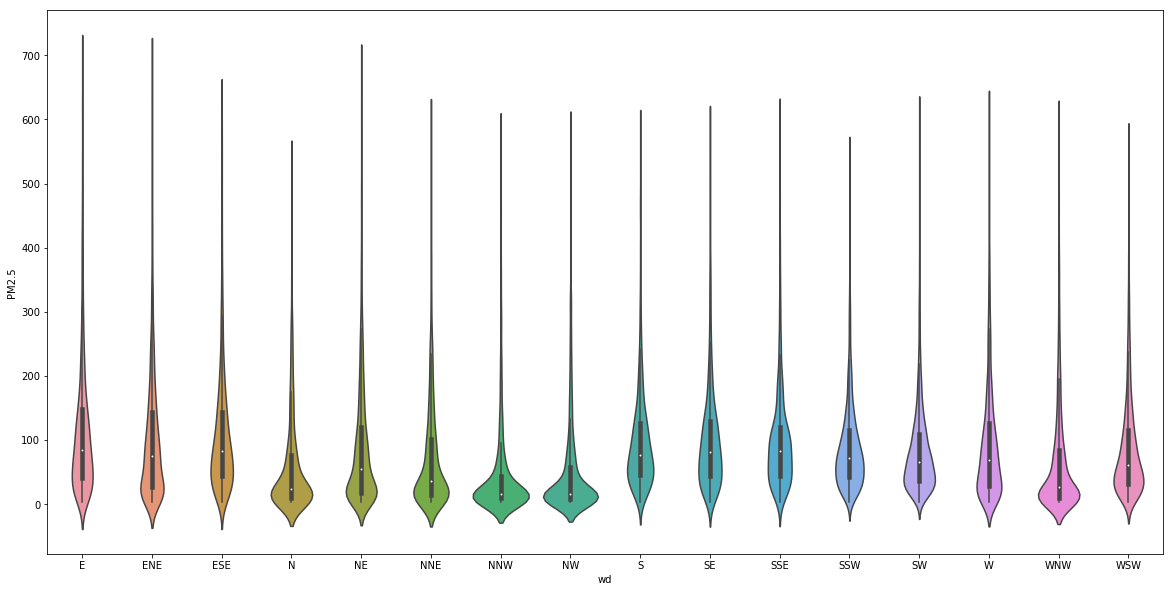

In [153]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x='wd', y="PM2.5", kind="violin", data=data)
   # sns.violinplot(x = "species", y = iris['petal_length'], data = irise = 'pastel', palette = my_palette[0], ax = axes[0])
   # ax.set(title = 'log({})'.format(feature))
#ax.set(xlabel = 'wd')
#ax.set(ylabel = 'PM2.5')


the spread of the various wind directions are different but there is no clear pattern observed.

In [154]:
data.wd.value_counts()

NE     3568
SW     3428
ENE    3080
E      2807
WNW    2565
NW     2552
WSW    2546
W      2464
SSW    2457
ESE    1772
NNE    1564
S      1506
SE     1279
NNW    1187
N      1176
SSE    1034
Name: wd, dtype: int64

In [155]:
data.wd.isna().sum()

79

In [156]:
data[data['wd'].isnull()]

Weekday  Season  Year  Month Day  Hour   SO2    NO2  \
Date and Time                                                                
2013-11-22 04:00:00     Friday  autumn  2013     11  22     4  38.0   86.0   
2014-07-02 08:00:00  Wednesday  summer  2014      7   2     8   2.0   39.0   
2015-02-18 07:00:00  Wednesday  winter  2015      2  18     7  11.0   31.0   
2015-07-17 21:00:00     Friday  summer  2015      7  17    21   2.0   45.0   
2015-10-16 19:00:00     Friday  autumn  2015     10  16    19   7.0  108.0   
2015-10-17 19:00:00   Saturday  autumn  2015     10  17    19   5.0  185.0   
2015-10-30 04:00:00     Friday  autumn  2015     10  30     4   2.0   41.0   
2016-02-07 04:00:00     Sunday  winter  2016      2   7     4  13.0   24.0   
2016-03-06 03:00:00     Sunday  winter  2016      3   6     3  15.0   72.0   
2016-05-12 22:00:00   Thursday  spring  2016      5  12    22   2.0   67.0   
2016-05-15 05:00:00     Sunday  spring  2016      5  15     5   2.0   44.0   
2016-07-23 04:00:00   Saturday  summer  2016      7  23     4   2.0   40.0   
2016-08-27 04:00:00   Saturday  summer  2016      8  27     4   2.0   68.0   
2016-09-02 05:00:00     Friday  summer  2016      9   2     5   2.0   65.0   
2016-09-08 02:00:00   Thursday  summer  2016      9   8     2   2.0   57.0   
2016-09-14 22:00:00  Wednesday  summer  2016      9  14    22   2.0   92.0   
2016-09-21 23:00:00  Wednesday  summer  2016      9  21    23   2.0   85.0   
2016-09-22 20:00:00   Thursday  autumn  2016      9  22    20   2.0   80.0   
2016-09-23 05:00:00     Friday  autumn  2016      9  23     5   2.0   29.0   
2016-09-24 06:00:00   Saturday  autumn  2016      9  24     6   3.0   40.0   
2016-09-25 19:00:00     Sunday  autumn  2016      9  25    19   3.0   77.0   
2016-09-25 20:00:00     Sunday  autumn  2016      9  25    20   3.0   63.0   
2016-09-25 21:00:00     Sunday  autumn  2016      9  25    21   3.0   32.0   
2016-09-25 22:00:00     Sunday  autumn  2016      9  25    22   3.0   28.0   
2016-09-25 23:00:00     Sunday  autumn  2016      9  25    23   3.0   34.0   
2016-09-26 20:00:00     Monday  autumn  2016      9  26    20   2.0   82.0   
2016-09-28 23:00:00  Wednesday  autumn  2016      9  28    23   2.0   97.0   
2016-09-29 00:00:00   Thursday  autumn  2016      9  29     0   2.0  109.0   
2016-09-29 01:00:00   Thursday  autumn  2016      9  29     1   2.0  106.0   
2016-09-29 02:00:00   Thursday  autumn  2016      9  29     2   2.0  102.0   
...                        ...     ...   ...    ...  ..   ...   ...    ...   
2017-01-11 04:00:00  Wednesday  winter  2017      1  11     4  45.0   85.0   
2017-01-11 07:00:00  Wednesday  winter  2017      1  11     7  21.0   80.0   
2017-01-11 08:00:00  Wednesday  winter  2017      1  11     8  19.0   81.0   
2017-01-11 09:00:00  Wednesday  winter  2017      1  11     9  21.0   82.0   
2017-01-12 04:00:00   Thursday  winter  2017      1  12     4  12.0   28.0   
2017-01-13 07:00:00     Friday  winter  2017      1  13     7   4.0   29.0   
2017-01-13 14:00:00     Friday  winter  2017      1  13    14   6.0   17.0   
2017-01-15 19:00:00     Sunday  winter  2017      1  15    19  14.0   72.0   
2017-01-17 23:00:00    Tuesday  winter  2017      1  17    23  28.0   97.0   
2017-01-18 14:00:00  Wednesday  winter  2017      1  18    14   5.0   50.0   
2017-01-19 03:00:00   Thursday  winter  2017      1  19     3  44.0   88.0   
2017-01-19 04:00:00   Thursday  winter  2017      1  19     4  41.0   88.0   
2017-01-19 05:00:00   Thursday  winter  2017      1  19     5  40.0   84.0   
2017-01-19 06:00:00   Thursday  winter  2017      1  19     6  32.0   84.0   
2017-01-19 07:00:00   Thursday  winter  2017      1  19     7  32.0   83.0   
2017-01-23 22:00:00     Monday  winter  2017      1  23    22  23.0   91.0   
2017-01-24 01:00:00    Tuesday  winter  2017      1  24     1  27.0   91.0   
2017-01-25 04:00:00  Wednesday  winter  2017      1  25     4  42.0  110.0   
2017-01-25 19:00:00  Wednesday  winter  2017 

there are 79 missing values in the nominal categorical feature wd (wind direction). I will therefore use the missForest algorithm to impute the missing values because of its simplicity and its robustness to noisy data and multicollinearity, since random-forests have built-in feature selection (evaluating entropy and information gain). it also outperforms KNN imputer. Furthermore no preprocessing steps are required like scaling or normalization. 

In [157]:
data.head()

Weekday  Season  Year  Month Day  Hour  SO2   NO2     CO  \
Date and Time                                                                  
2013-03-01 00:00:00  Friday  winter  2013      3   1     0  6.0  17.0  200.0   
2013-03-01 01:00:00  Friday  winter  2013      3   1     1  7.0  14.0  200.0   
2013-03-01 02:00:00  Friday  winter  2013      3   1     2  5.0  16.0  200.0   
2013-03-01 03:00:00  Friday  winter  2013      3   1     3  3.0  16.0  250.0   
2013-03-01 04:00:00  Friday  winter  2013      3   1     4  3.0  12.0  300.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  PM10  PM2.5  
Date and Time                                                                
2013-03-01 00:00:00  62.0   0.3  1021.9 -19.0   0.0  WNW   2.0   9.0    9.0  
2013-03-01 01:00:00  66.0  -0.1  1022.4 -19.3   0.0  WNW   4.4  11.0   11.0  
2013-03-01 02:00:00  59.0  -0.6  1022.6 -19.7   0.0  WNW   4.7   8.0    8.0  
2013-03-01 03:00:00  47.5  -0.7  1023.5 -20.9   0.0   NW   2.6   8.0    8.0  
2013-03-01 04:00:00  36.0  -0.9  1024.1 -21.7   0.0  WNW   2.5   8.0    8.0

In [158]:
data_raw = data.copy()

I observe that there are misisng values in 2017 which will contain part of my test data. Therefore I have to implement this imputation once I split my data in training and test set. Therefore the missForest imputation for 'wd feature will be part on of the extended EDA (not the preliminary EDA that is done within the scope of the proposal).

## Feature engineering

Based on the above stated EDA, I will perform feature engineering in three ways:
  - I will add the binary feature 'it_rained' for RAIN. It is 1 if it has rained and 0 if there was no rain or values were missing.
  - I will add the 8 lag features
  - add the Moving average as a feature. I will explore which type of moving average (Simple, Cumulative and Exponential averaging with different window widths) is more meaningful to add as a feature.

### binary feature

In [159]:
data['it_rained'] = data.apply(lambda row: bool(row['RAIN'] > 0), axis = 1).astype('int64')

In [160]:
data.loc[data['RAIN'] > 0,:][['RAIN', 'it_rained']].head()

RAIN  it_rained
Date and Time                       
2013-03-12 04:00:00   1.4          1
2013-03-12 05:00:00   1.2          1
2013-03-12 06:00:00   1.5          1
2013-03-12 07:00:00   2.0          1
2013-03-12 08:00:00   0.2          1

### lag features

adding the 8 lag features of the target

In [161]:
# a positive shift is a lag
for i in range(1,9):
    data['Lag-'+ str(i)] = data['PM2.5'].shift(i)
data.head(10)

Weekday  Season  Year  Month Day  Hour   SO2   NO2     CO  \
Date and Time                                                                   
2013-03-01 00:00:00  Friday  winter  2013      3   1     0   6.0  17.0  200.0   
2013-03-01 01:00:00  Friday  winter  2013      3   1     1   7.0  14.0  200.0   
2013-03-01 02:00:00  Friday  winter  2013      3   1     2   5.0  16.0  200.0   
2013-03-01 03:00:00  Friday  winter  2013      3   1     3   3.0  16.0  250.0   
2013-03-01 04:00:00  Friday  winter  2013      3   1     4   3.0  12.0  300.0   
2013-03-01 05:00:00  Friday  winter  2013      3   1     5   4.0   8.0  200.0   
2013-03-01 06:00:00  Friday  winter  2013      3   1     6   6.0  13.0  300.0   
2013-03-01 07:00:00  Friday  winter  2013      3   1     7   8.0  20.0  300.0   
2013-03-01 08:00:00  Friday  winter  2013      3   1     8   9.0  23.0  300.0   
2013-03-01 09:00:00  Friday  winter  2013      3   1     9  10.0  18.0  300.0   

                       O3  ...  PM2.5  it_rained  Lag-1  Lag-2 Lag-3  Lag-4  \
Date and Time              ...                                                
2013-03-01 00:00:00  62.0  ...    9.0          0    NaN    NaN   NaN    NaN   
2013-03-01 01:00:00  66.0  ...   11.0          0    9.0    NaN   NaN    NaN   
2013-03-01 02:00:00  59.0  ...    8.0          0   11.0    9.0   NaN    NaN   
2013-03-01 03:00:00  47.5  ...    8.0          0    8.0   11.0   9.0    NaN   
2013-03-01 04:00:00  36.0  ...    8.0          0    8.0    8.0  11.0    9.0   
2013-03-01 05:00:00  64.0  ...   10.0          0    8.0    8.0   8.0   11.0   
2013-03-01 06:00:00  61.0  ...    8.0          0   10.0    8.0   8.0    8.0   
2013-03-01 07:00:00  54.0  ...    8.0          0    8.0   10.0   8.0    8.0   
2013-03-01 08:00:00  50.0  ...    3.0          0    8.0    8.0  10.0    8.0   
2013-03-01 09:00:00  56.0  ...    3.0          0    3.0    8.0   8.0   10.0   

                     Lag-5  Lag-6  Lag-7  Lag-8  
Date and Time                                    
2013-03-01 00:00:00    NaN    NaN    NaN    NaN  
2013-03-01 01:00:00    NaN    NaN    NaN    NaN  
2013-03-01 02:00:00    NaN    NaN    NaN    NaN  
2013-03-01 03:00:00    NaN    NaN    NaN    NaN  
2013-03-01 04:00:00    NaN    NaN    NaN    NaN  
2013-03-01 05:00:00    9.0    NaN    NaN    NaN  
2013-03-01 06:00:00   11.0    9.0    NaN    NaN  
2013-03-01 07:00:00    8.0   11.0    9.0    NaN  
2013-03-01 08:00:00    8.0    8.0   11.0    9.0  
2013-03-01 09:00:00    8.0    8.0    8.0   11.0  

[10 rows x 27 columns]

In [162]:
all_numerical_features = [
 'Year',
 'Month',
 'Day',
 'Hour',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'WSPM',
 'PM10',
 'it_rained',
 'PM2.5']

In [163]:
d = data.reset_index(drop=True)

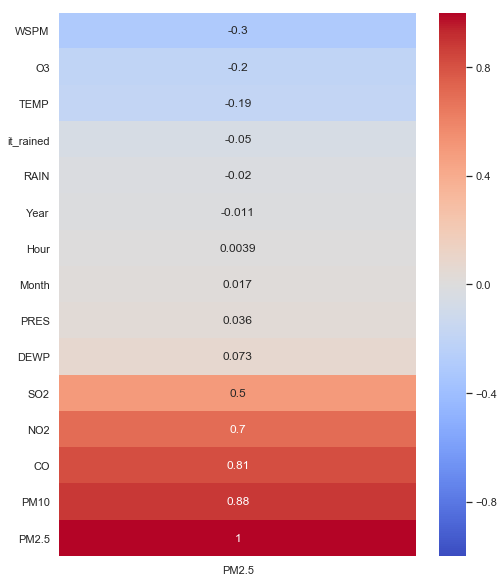

In [164]:
sns.set(font_scale=1)
plt.figure(figsize = (8, 10))
g = sns.heatmap(d[all_numerical_features].corr()[['PM2.5']].sort_values(by = 'PM2.5'),
               annot = True,
               cmap = 'coolwarm',
               vmin = -1,
               vmax = 1,        
               )

### exploring moving averaging methods

add a moving average of x = rolling window.

Moving Average in Python is a convenient tool that helps smooth out our data based on variations. Moving Average in calculates the average of different subsets of a dataset.
if observations that are nearby in time are also likely to be close in value then the average eliminates some of the randomness in the data, leaving a smooth trend-cycle component. We call this an  m-MA, meaning a moving average of order m, where  m is the width of the window for the moving average calculation and it is m=2k+1. That is, the estimate of the trend-cycle at time t is obtained by averaging values of the time series within  
k periods of t. that is, we smooth out data based on variations. In simple moving average methods the averages are not weighted. 

Exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight.

In [165]:
def moving_averages(timeseries, adjust = False):
    
    # simple moving average SMA
    sma_mean = timeseries.rolling(24*30, min_periods=1).mean()
    sma_mean2 = timeseries.rolling(24*15, min_periods=1).mean()
    sma_mean3 = timeseries.rolling(24*20, min_periods=1).mean()
    # cumulative movint average
    cma_mean = timeseries.expanding().mean()
    # exponential moving average
    expma_mean = timeseries.ewm( span = 24*15, adjust = adjust).mean()
    expma_mean2 = timeseries.ewm( span = 24*30, adjust = adjust).mean()
    
    # Plot bounds and outliers
    #plt.figure(figsize = (24,12))
    fig = plt.figure(figsize = (24,12))
    #ax = fig.add_subplot(111)
    plt.plot(timeseries, "lightgrey", label = "MP2.5")
    #plt.plot(expma_mean, "orange", label = "Exponential Moving average")
    plt.plot(sma_mean, "blue", linewidth = 1, label = "Simple Moving average, M=30 days")
    plt.plot(sma_mean2, "green", linewidth = 1, label = "Simple Moving average, M=15 days")
    plt.plot(sma_mean3, "r--", linewidth = 1, label = "Simple Moving average, M=20 days")
    plt.plot(expma_mean, "black", linewidth = 1, label = "Exponential average, M=15 days")
    plt.plot(expma_mean2, "orange", linewidth = 1, label = "Exponential average, M=30 days")
    plt.plot(cma_mean,  "y--", linewidth = 1, label = "Cumulative Moving average")
    plt.legend(loc = "best")
    plt.grid(True)
    plt.ylim(0, 300)
    plt.xlim('2013-09-01 00:00:00', '2014-05-01 00:00:00')
    #plt.title("{} outliers detected using a exponential moving window of span {:.0f} days".format(len(outliers), span/24))

    # plt.savefig('leg_example')
    plt.setp(plt.legend().get_texts(), fontsize='x-large')
    #ax.legend(fontsize='x-large')
    #plt.legend(loc=2, prop={'size': 14})
    plt.show()
    # plt.savefig('leg_example')
    # get the lines and texts inside legend box
    #leg_lines = plt.legend().get_lines()
    #plt.setp(leg_lines, linewidth=4)
    #leg_texts = leg.get_texts()
# bulk-set the properties of all lines and texts

# change the fontsize of the legend, three ways:
    # fig = plt.figure(figsize = (24,12))
    # ax = fig.add_subplot(111)
    # ax.legend(fontsize='x-large')
    # or:
    # plt.figure(figsize = (24,12))
    # plt.legend(loc=2, prop={'size': 14})
    # or:
    # plt.figure(figsize = (24,12))
    # plt.setp(plt.legend().get_texts(), fontsize='x-large')



the parameter span specifies the width of the window.

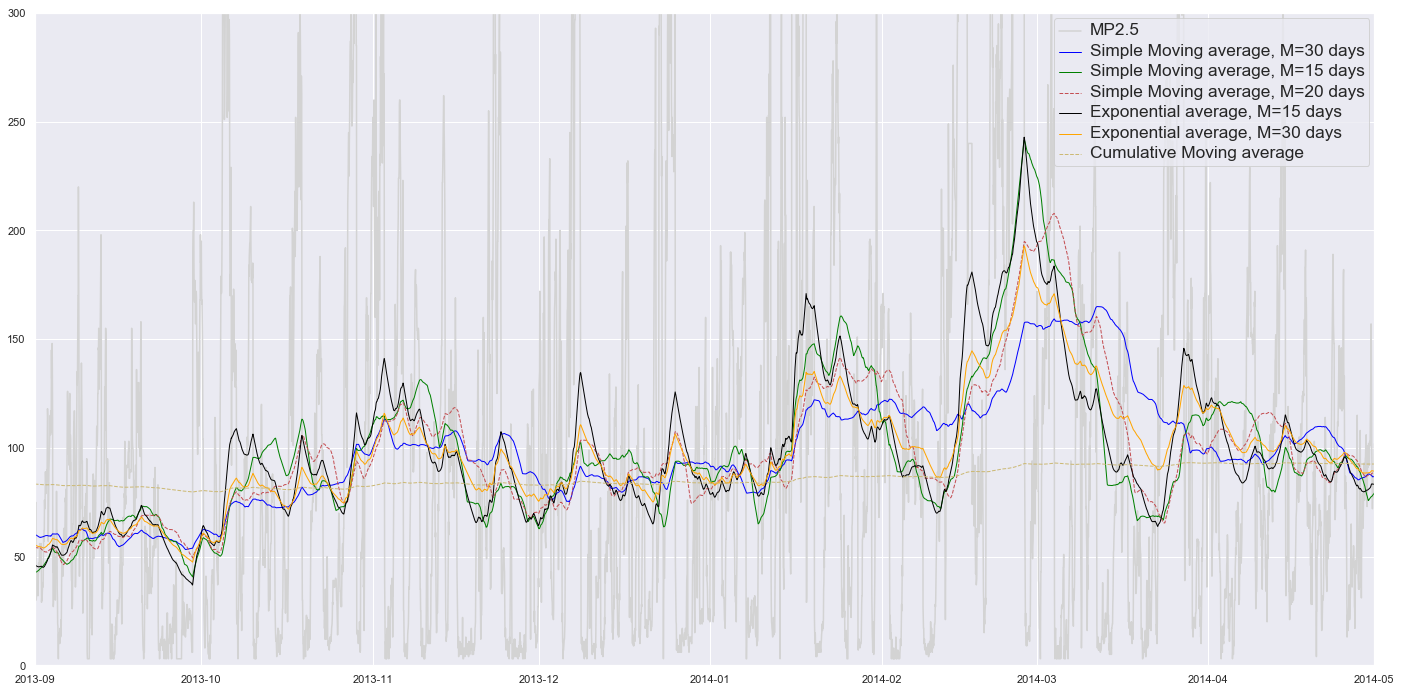

In [166]:
moving_averages(data['PM2.5'], adjust = True)

The above mentioned table is meant to compare different methods of moving averages (Simple, Cumulative and Exponential averaging) and different window widths. I will choose the exponential average method of window width M = 15 days (black curve) for the target vector and add it as a feature.

In [167]:
data['EMA'] = data['PM2.5'].ewm( span = 24*15, adjust = True).mean()

In [168]:
data['EMA'].isna().sum()

0

parameter 'adjust': Divide by decaying adjustment factor in beginning periods to account for imbalance in relative weightings (viewing EWMA as a moving average).

In [169]:
data.head()

Weekday  Season  Year  Month Day  Hour  SO2   NO2     CO  \
Date and Time                                                                  
2013-03-01 00:00:00  Friday  winter  2013      3   1     0  6.0  17.0  200.0   
2013-03-01 01:00:00  Friday  winter  2013      3   1     1  7.0  14.0  200.0   
2013-03-01 02:00:00  Friday  winter  2013      3   1     2  5.0  16.0  200.0   
2013-03-01 03:00:00  Friday  winter  2013      3   1     3  3.0  16.0  250.0   
2013-03-01 04:00:00  Friday  winter  2013      3   1     4  3.0  12.0  300.0   

                       O3  ...  it_rained  Lag-1  Lag-2  Lag-3 Lag-4  Lag-5  \
Date and Time              ...                                                
2013-03-01 00:00:00  62.0  ...          0    NaN    NaN    NaN   NaN    NaN   
2013-03-01 01:00:00  66.0  ...          0    9.0    NaN    NaN   NaN    NaN   
2013-03-01 02:00:00  59.0  ...          0   11.0    9.0    NaN   NaN    NaN   
2013-03-01 03:00:00  47.5  ...          0    8.0   11.0    9.0   NaN    NaN   
2013-03-01 04:00:00  36.0  ...          0    8.0    8.0   11.0   9.0    NaN   

                     Lag-6  Lag-7  Lag-8        EMA  
Date and Time                                        
2013-03-01 00:00:00    NaN    NaN    NaN   9.000000  
2013-03-01 01:00:00    NaN    NaN    NaN  10.002778  
2013-03-01 02:00:00    NaN    NaN    NaN   9.331473  
2013-03-01 03:00:00    NaN    NaN    NaN   8.995826  
2013-03-01 04:00:00    NaN    NaN    NaN   8.794441  

[5 rows x 28 columns]

I now drop the first 8 observations because calculating the lags produced NaN values for the first 8 observations.

In [170]:
data.drop(data.index[range(0,8)], axis = 0, inplace = True)
data.head()

Weekday  Season  Year  Month Day  Hour   SO2   NO2     CO  \
Date and Time                                                                   
2013-03-01 08:00:00  Friday  winter  2013      3   1     8   9.0  23.0  300.0   
2013-03-01 09:00:00  Friday  winter  2013      3   1     9  10.0  18.0  300.0   
2013-03-01 10:00:00  Friday  winter  2013      3   1    10  11.0  15.0  300.0   
2013-03-01 11:00:00  Friday  winter  2013      3   1    11   9.0  14.0  300.0   
2013-03-01 12:00:00  Friday  winter  2013      3   1    12   8.0  10.0  300.0   

                       O3  ...  it_rained  Lag-1  Lag-2  Lag-3 Lag-4  Lag-5  \
Date and Time              ...                                                
2013-03-01 08:00:00  50.0  ...          0    8.0    8.0   10.0   8.0    8.0   
2013-03-01 09:00:00  56.0  ...          0    3.0    8.0    8.0  10.0    8.0   
2013-03-01 10:00:00  61.0  ...          0    3.0    3.0    8.0   8.0   10.0   
2013-03-01 11:00:00  62.0  ...          0    3.0    3.0    3.0   8.0    8.0   
2013-03-01 12:00:00  67.0  ...          0    3.0    3.0    3.0   3.0    8.0   

                     Lag-6  Lag-7  Lag-8       EMA  
Date and Time                                       
2013-03-01 08:00:00    8.0   11.0    9.0  8.091904  
2013-03-01 09:00:00    8.0    8.0   11.0  7.569890  
2013-03-01 10:00:00    8.0    8.0    8.0  7.142810  
2013-03-01 11:00:00   10.0    8.0    8.0  6.786929  
2013-03-01 12:00:00    8.0   10.0    8.0  6.485818  

[5 rows x 28 columns]

In [171]:
data.columns

Index(['Weekday', 'Season', 'Year', 'Month', 'Day', 'Hour', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'PM10', 'PM2.5',
       'it_rained', 'Lag-1', 'Lag-2', 'Lag-3', 'Lag-4', 'Lag-5', 'Lag-6',
       'Lag-7', 'Lag-8', 'EMA'],
      dtype='object')

I would also transform the features with the quantile transformation. This will be part of the preprocessing in the scikit-learn pipeline defined later.

### (Linear) correlation study

For all the numeric features, I will check how correlated with the output and weather there are features I have to leave out due to colinearity.

In [172]:
d = data.reset_index(drop=True).drop(columns = ['Weekday', 'Season', 'wd'])

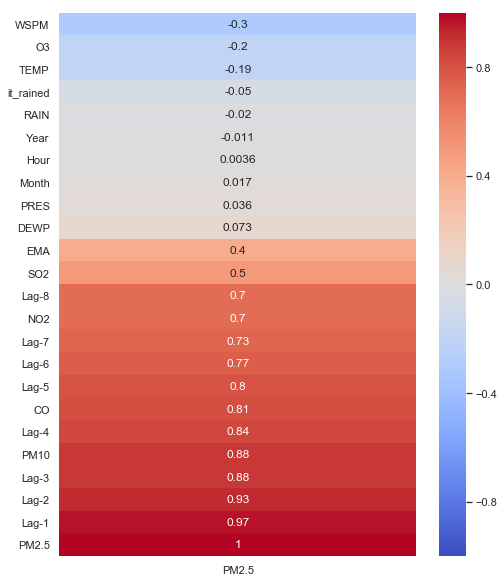

In [173]:
d = data.reset_index(drop=True).drop(columns = ['Weekday', 'Season', 'wd'])
sns.set(font_scale=1)
plt.figure(figsize = (8, 10))
g = sns.heatmap(d.corr()[['PM2.5']].sort_values(by = 'PM2.5'),
               annot = True,
               cmap = 'coolwarm',
               vmin = -1,
               vmax = 1,        
               )

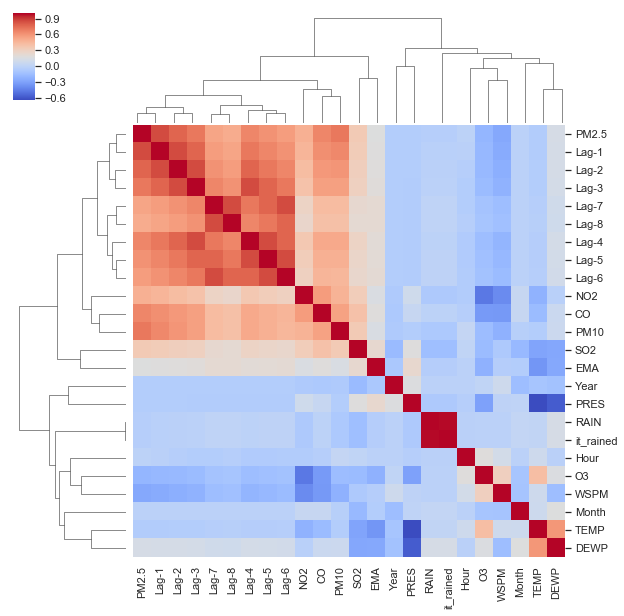

In [174]:
sns.clustermap(d.corr(method = 'kendall'),square=True, cmap = 'coolwarm');

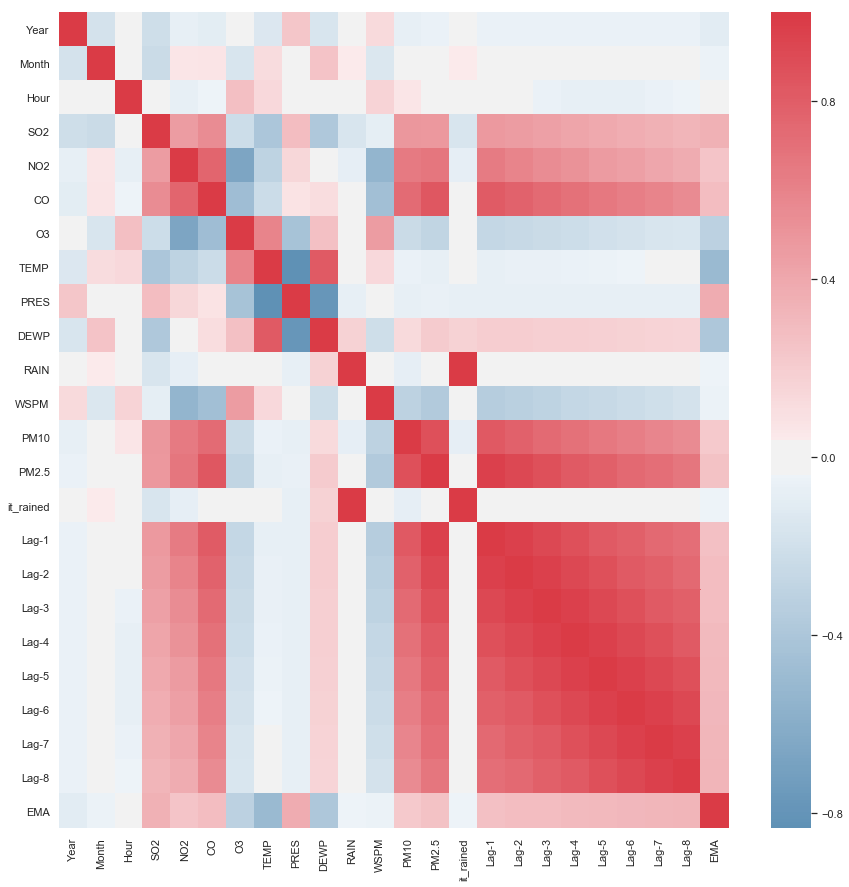

In [175]:
fig, ax = plt.subplots( nrows = 1 , ncols = 1,  figsize=(15, 15))
ax = sns.heatmap(d.corr(method = 'spearman'), annot =False, 
                 cmap=sns.diverging_palette(240, 10, n = 10, as_cmap=True), center = 0, square = False)

The features 'RAIN' and the binary feature 'it_rained' are colinear and can cause ill-conditioning. This is because  'it_rained' was introduced to deal with the the absence of rain. Ill conditioning can cause numerical instability and will be handled with regularization (Ridge regression). For the moment I keep both features because I do not want to loose information from the feature 'RAIN' which corresponds to the amount of rain.

Finally  I save the dataframe

In [176]:
data.to_pickle('tidy_dataframe_capstone.csv')
# df = pd.read_pickle(file_name)

This is the part of the project proposal
### (b) How does the EDA inform your project plan?

The EDA informs my project in several aspects. First of all, the data are stationary in mean and variance. there is a yearly seasonality which weakens the further in the past we go and the target variable is strongly autocorrelated with the previous hourly data. 

I explored further the feature space with heatmaps. I tried missing value imputation of wd feature (wind direction) with MissForest Imputation algorithm. Also I explored linear correlations between the features, checked for collinearity. Furthermore I explore data (for feature/target) transformations to approach a normal distribution. I extended the feature engineering including the Moving average and lags.

## 4) Machine learning 

### (a) Phrase your project goal as a clear machine learning question

I reframed the above mentioned goal of predicting the PM2.5 concentration levels for a window of nine months in a supervised manner i.e. choosing the appropriate lag-features, MAE (from EDA) as features.

### (b) What models did you use and why?

First I used the average and the first lag as two Baselines in order to compare against the ML algorithms. The ML algorithms I tried are the following:

1. KNeighborsRegressor because it is an intuitve method 
2. ElasticNet, because of its simplicity
3. RandomForestRegressor which is an ensemble method that mitigates overfitting/underfitting issues and performs better than decision trees in general
4. Support vector machines - SVM The main advantage of SVM stems from the specific formulation of a (convex) objective function with constraints thus a global optimal solution exists 
5. (deep) convolution neural networks (multilayer) because of their ability to learn nonlinear and complex realtions

the step 4. although tried (both with linear and RBF kernel) are not included in the submission because they were computationaly very expensive and the time needed was of great amount.

### (c) Please tell us your detailed machine learning strategy 

After splitting the data set in train and test set, I will define a pipeline (Preprocessing, Crossvalidation and GridSearch for hyperparameter tuning and model fitting)
I preprocess the data accordingly. I will scale the features, encoding the categorical variables, perform the quantile transformation to certain features and to the target variable.
In the end I benchmark the results of the model fitting and compare the performance of the forecast based on two metrics (MAE and R2).


## 5) Additional information

In all the models I observe that the MAE errors of Cross validation were significantly smaller compared to the MAE of test set. I am not sure why this happens and I cannot explain but it is a general observation that holds for all the ML algorithms that I tried. For the case of ElasticNet which is the one that runs faster I increased the number of k-folds to 10 (implementation not included in the submission) but the result was the same so it looks that increasing the number of folds does not remedy this effect.